# <center> Grupo 4</center>  
### Alunos: Enok Januário da Rocha e Orlando Enrico Liz Silvério Silva
###  [Acessar vídeo explicativo](https://www.youtube.com/watch?v=Aj-Hb-3sHDc&feature=youtu.be) 

In [1]:
from IPython.display import Image
from IPython.display import display, HTML
%matplotlib inline
import io
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as ss
import datetime as dt

In [2]:
plt.rcParams['figure.figsize']  = (18, 10)
plt.rcParams['axes.labelsize']  = 45
plt.rcParams['axes.titlesize']  = 45
plt.rcParams['legend.fontsize'] = 35
plt.rcParams['xtick.labelsize'] = 35
plt.rcParams['ytick.labelsize'] = 35
plt.rcParams['lines.linewidth'] = 4

plt.ion()

plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (50, 33)

In [3]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

# Introdução

<p>O Universo Marvel é um universo compartilhado onde ocorrem as histórias de boa parte dos quadrinhos da Marvel Entertainment. Esse universo é composto por super-equipes (Vingadores, X-Men, Quarteto Fantástico, Guardiões da Galáxia, Defensores, Inumanos) e outros super-heróis e vilões Marvel.</p>

<p>É retratado como existente dentro de um chamado "multiverso" em que há milhares de universos separados. A partir desse conceito e da contextualização, definimos "Universo Marvel" como uma referência à continuidade mainstream da Marvel, conhecida por Terra-616 ou Terra Primal.</p>

![title](https://conteudo.imguol.com.br/c/entretenimento/e2/2017/07/07/marvel-logo-1499441146328_v2_900x506.jpg)

# Motivação

O presente tema foi escolhido pelo grupo a partir do interesse próprio e prévio no assunto. Acreditamos que é um assunto que pode ser explorado das mais diversas formas a fim de produzir dados e trabalhar conceitos aprendidos durante o semestre na disciplina de Introdução a Ciência dos Dados.
A partir da definição do tema, procuramos alguns datasets em busca de possíveis ideias sobre o que especificamente pesquisar e estudar e, a partir dos encontrados, verificamos que a quantidade de informação seria algo favorável ao desenvolvimento de nosso projeto e assim sendo, acabamos oficializando a escolha.

# Objetivos

Caracterizar o universo marvel e responder perguntas como:

Quais as características mais comuns nos personagens de quadrinhos do universo Marvel?

• Personagens não humanos (qualquer raça que não seja a humana) tendem a ter uma índole questionável?

• Há mais heróis do sexo feminino ou masculino?

• Filmes com avaliação positiva tendem a ter uma bilheteria maior?

Dentre outras que são descutidas a seguir.


# Metodologia

O presente trabalho foi implementado totalmente em Python 3, usando o Jupyter e todos os recursos mostrados em sala de aula da disciplina durante o semestre.

Os dados foram filtrados a fim de atenderem nossos requisitos (como editora) sem modificar os valores em si encontrados nos arquivos em questão.

Este relatório acompanha um vídeo explicativo.

# Conjunto de dados

Trabalhamos em 4 datasets diferentes coletados de diferentes locais (o link para acesso de cada um encontra-se disponível ao fim do presente relatório) que são detalhados a seguir:

### Dataset 1 (Personagens):
De forma geral, constitui as características dos personagens.
Possui identificador, nome, gênero, cor dos olhos, raça, cor do cabelo, altura, cor da pele,
índole(do bem, do mal, etc.) e peso

Disponível em: [character.csv](https://github.com/enokjrocha/-ICD-Marvel/blob/master/character.csv) 

In [4]:
dfchars = pd.read_csv('character.csv')
dfchars.head()

id           Name gender eye_color               race hair_color  height  \
0   1         A-Bomb   Male    yellow              Human    No Hair   203.0   
1   4    Abomination   Male     green  Human / Radiation    No Hair   203.0   
2   5        Abraxas   Male      blue      Cosmic Entity      Black   -99.0   
3   6  Absorbing Man   Male      blue              Human    No Hair   193.0   
4   9      Agent Bob   Male     brown              Human      Brown   178.0   

  skin_color alignment  weight  
0          -      good     441  
1          -       bad     441  
2          -       bad     -99  
3          -       bad     122  
4          -      good      81

In [5]:
dfchars[dfchars.weight!= -99].head()


id           Name gender eye_color               race hair_color  height  \
0   1         A-Bomb   Male    yellow              Human    No Hair   203.0   
1   4    Abomination   Male     green  Human / Radiation    No Hair   203.0   
3   6  Absorbing Man   Male      blue              Human    No Hair   193.0   
4   9      Agent Bob   Male     brown              Human      Brown   178.0   
5  10     Agent Zero   Male         -                  -          -   191.0   

  skin_color alignment  weight  
0          -      good     441  
1          -       bad     441  
3          -       bad     122  
4          -      good      81  
5          -      good     104

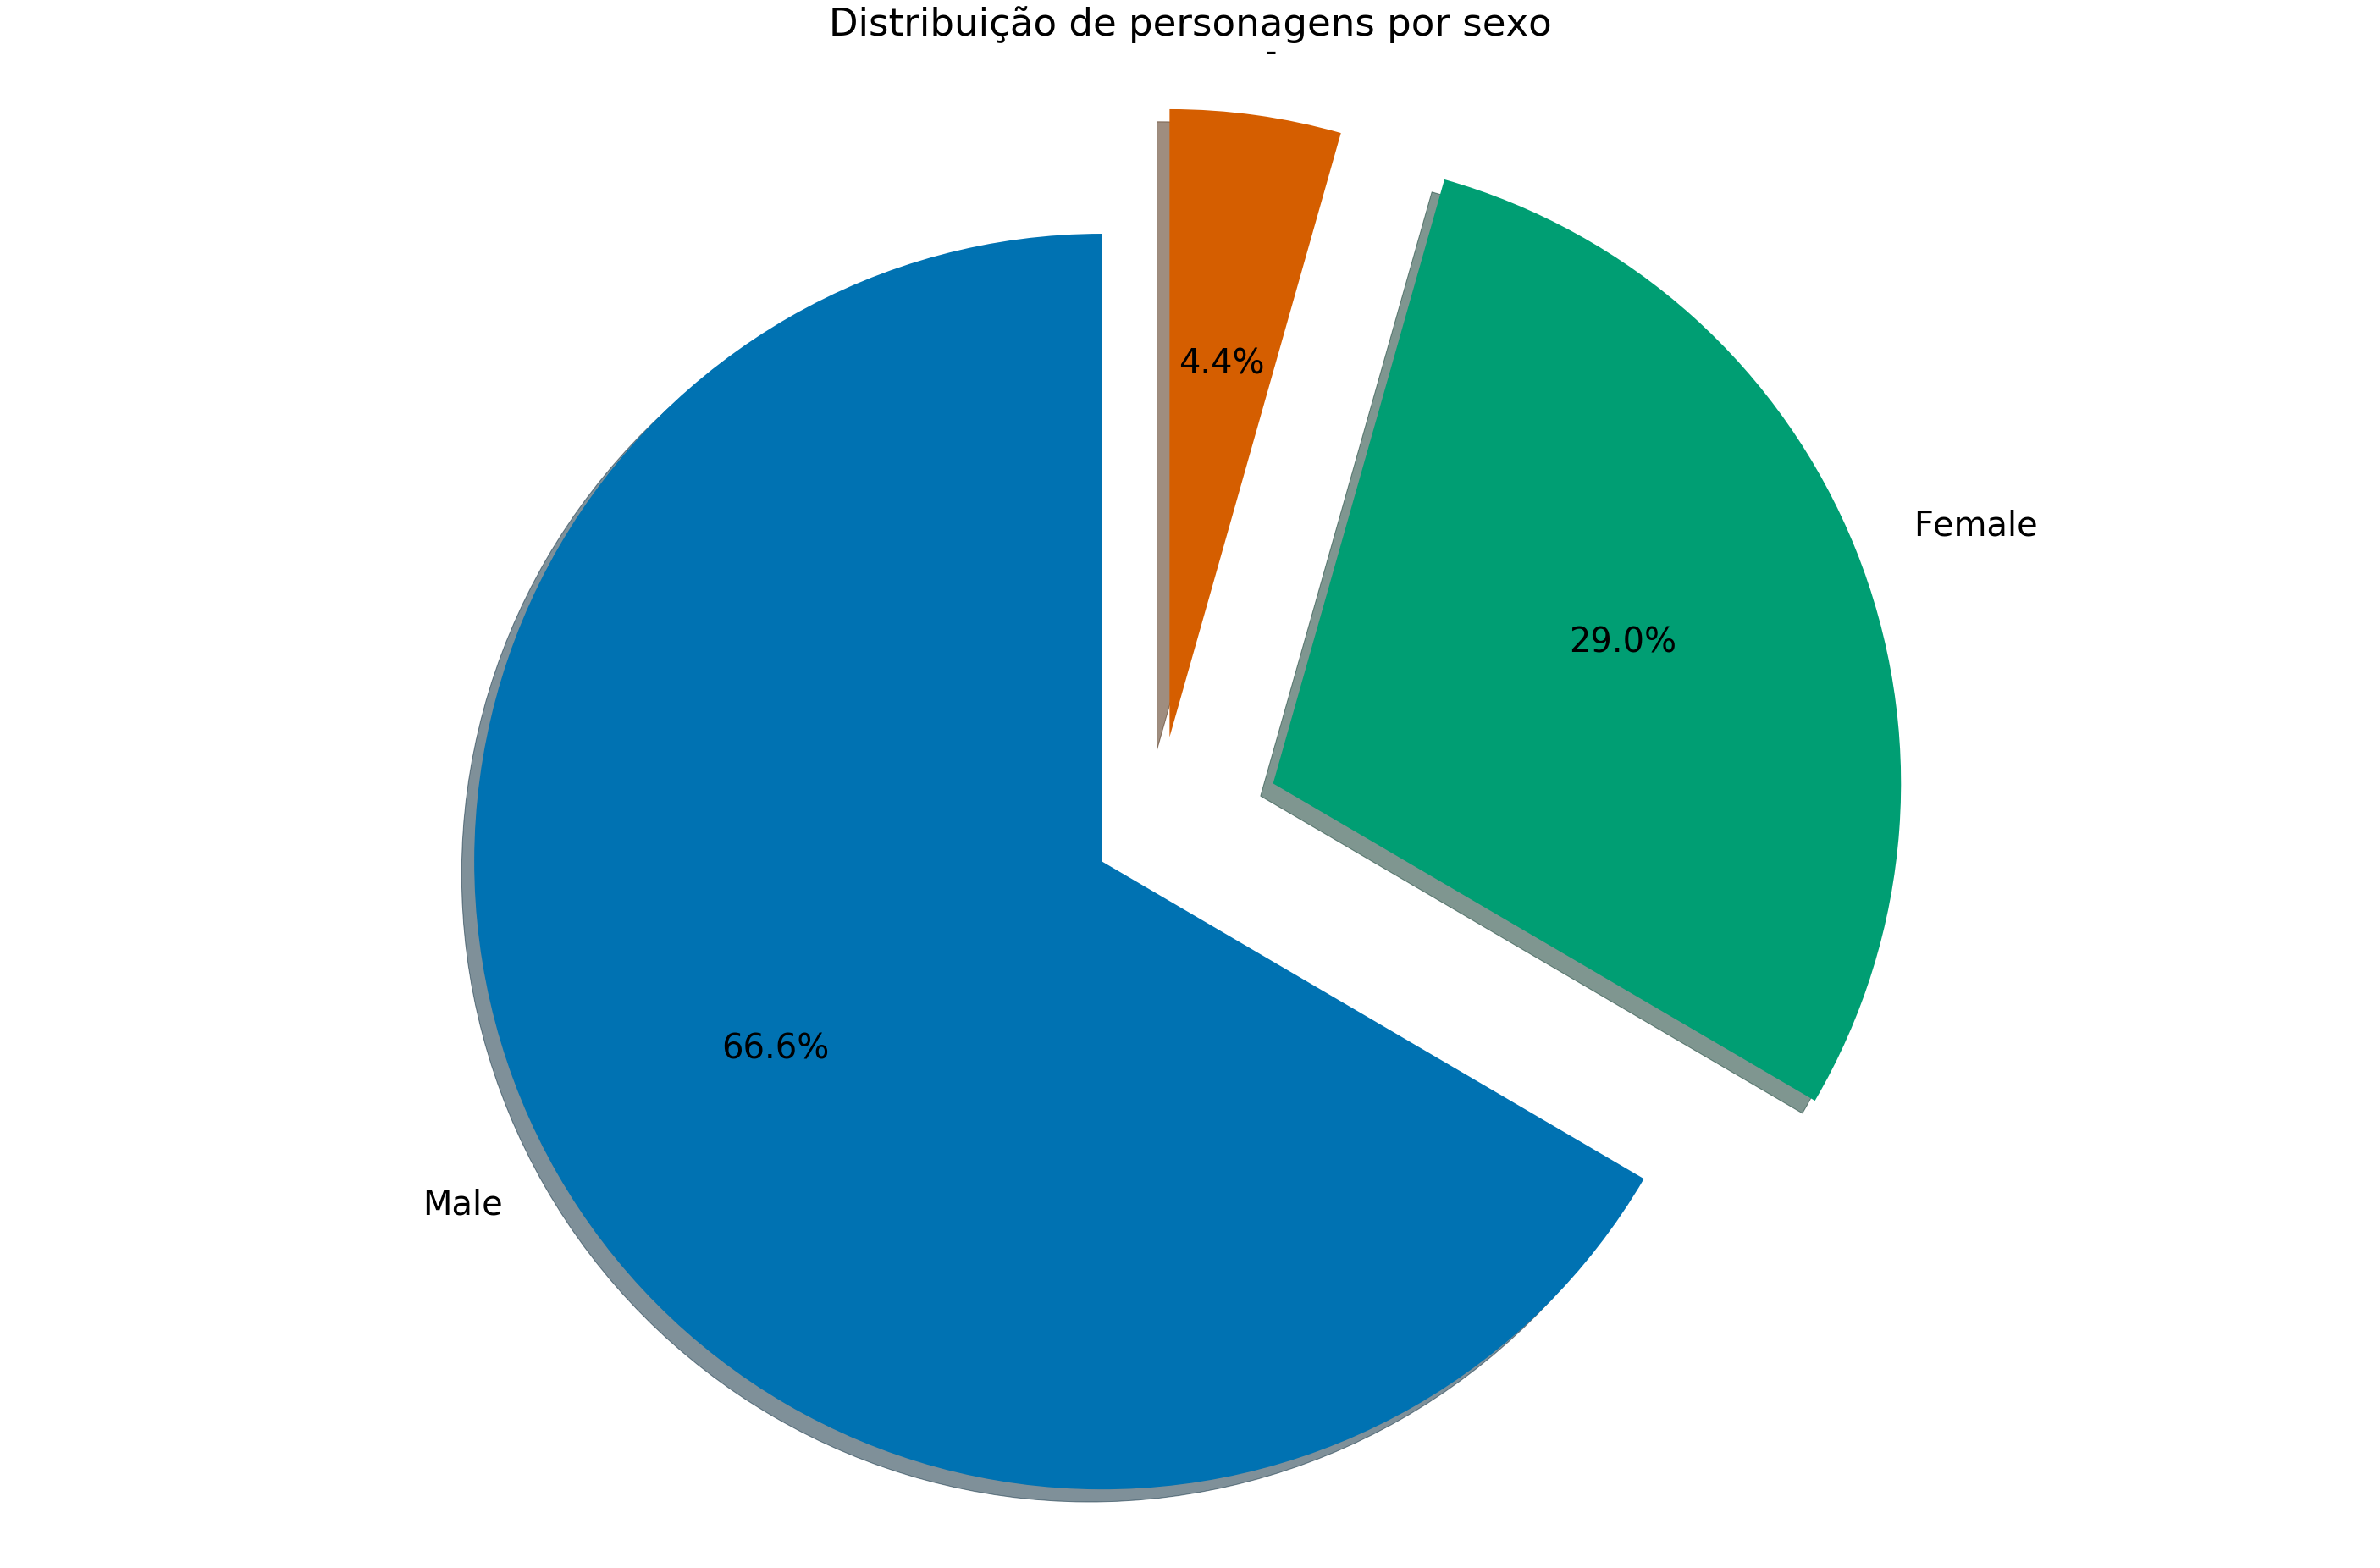

In [6]:
labels = ['Male', 'Female', '-']
sizes = dfchars['gender'].value_counts()
explode = (0.1, 0.2, 0.15)

fig, ax = plt.subplots()
ax.pie(sizes,
       explode=explode,
       labels=labels,
       autopct='%1.1f%%',
       shadow=True,
       startangle=90, textprops={'fontsize': 40})
ax.axis('equal')  
ax.set_title('Distribuição de personagens por sexo')

plt.show()

In [7]:
dh = dfchars[dfchars.race == 'Human']
dh.head()
nh = dh['Name'].count()

In [8]:
dhg = dh[dh.alignment == 'good']
n_hg = dhg['Name'].count()
dhb = dh[dh.alignment != 'good']
n_hb = dhb['Name'].count()

print("Humanos bons: ", int(n_hg))
print("Humanos ruins: ", int(n_hb))
print("Total de humanos: ", int(nh))

Humanos bons:  52
Humanos ruins:  27
Total de humanos:  79


In [9]:
dnh = dfchars[dfchars.race != 'Human']
dh.head()
nnh = dnh['Name'].count()

In [10]:
dnhg = dnh[dnh.alignment == 'good']
n_nhg = dnhg['Name'].count()
dnhb = dnh[dnh.alignment != 'good']
n_nhb = dhb['Name'].count()

print("Personagens de outras raças que são bons: ", int(n_nhg))
print("Personagens de outras raças de índole ruim: ", int(n_nhb))
print("Total de personagens de outras raças: ", int(nnh))

Personagens de outras raças que são bons:  168
Personagens de outras raças de índole ruim:  27
Total de personagens de outras raças:  262


### Dataset 2 (Poderes):
Neste, os atributos são os poderes mais comuns manifestados pelos
personagens (super força, agilidade, fator de cura, durabilidade, capacidade de voar,
pontaria, longevidade, inteligência, super velocidade, dentre outros).

Disponível em: [powers.csv](https://github.com/enokjrocha/-ICD-Marvel/blob/master/powers.csv) 

In [11]:
dfpower = pd.read_csv('powers.csv')
dfpower.head()

id           Name  Agility  Accelerated_Healing  Durability  Stealth  \
0   1         A-Bomb        0                    1           1        0   
1   4    Abomination        0                    1           0        0   
2   5        Abraxas        0                    0           0        0   
3   6  Absorbing Man        0                    0           1        0   
4   9      Agent Bob        0                    0           0        1   

   Flight  Marksmanship  Weapons_Master  Longevity  Intelligence  \
0       0             0               0          1             0   
1       0             0               0          0             1   
2       1             0               0          0             1   
3       0             0               0          0             0   
4       0             0               0          0             0   

   Super_Strength  Energy_Blasts  Stamina  Super_Speed  Reflexes  \
0               1              0        1            0         0   
1               1              0        1            1         0   
2               1              0        0            1         0   
3               1              0        0            0         0   
4               0              0        0            0         0   

   Invulnerability  
0                0  
1                1  
2                1  
3                1  
4                0

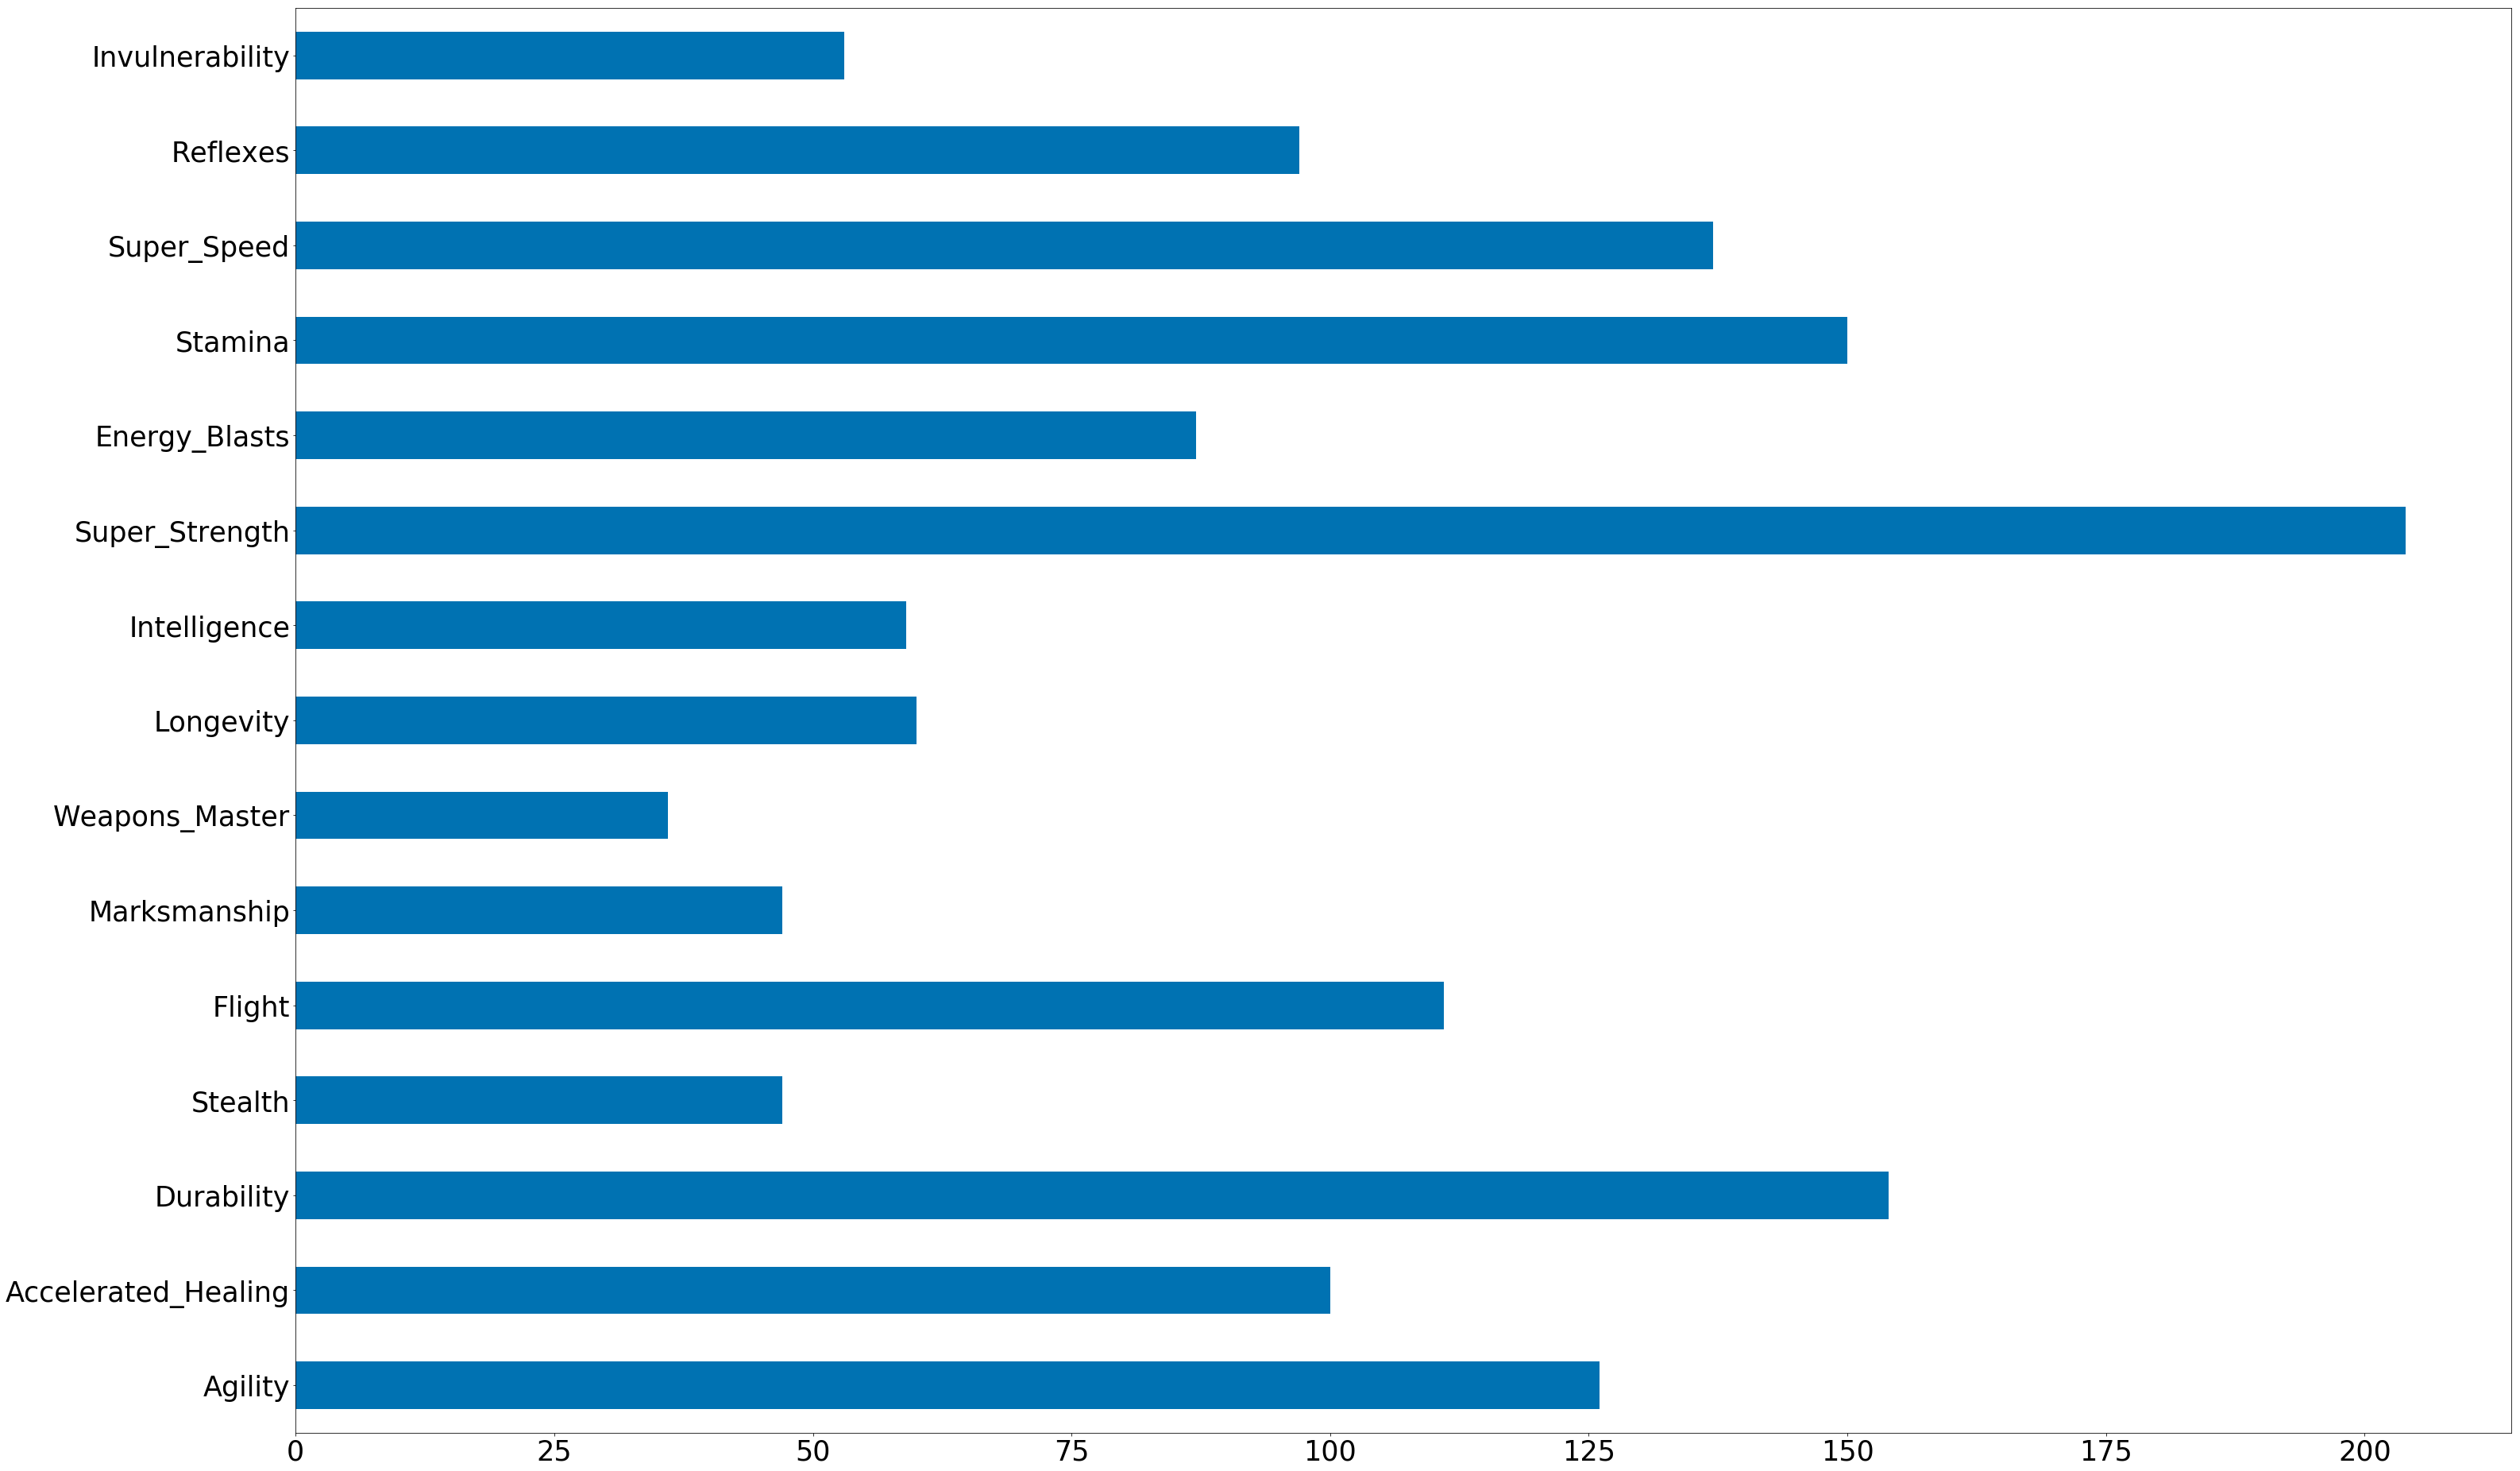

In [12]:
df1 = dfpower.iloc[:,2:17]
df1 = pd.DataFrame(df1.sum())

df1.plot(kind = 'barh', legend=False)

### Dataset 3 (Filmes):
Esse dataset contém dados sobre o universo cinematográfico Marvel
como nome do filme, ano de lançamento, bilheteria, fase e tempo de tela de cada
personagem em cada filme.

Disponível em: [Versão 1 movie.csv](https://github.com/enokjrocha/-ICD-Marvel/blob/master/movie.csv)


In [13]:
dfmovie = pd.read_csv('movie.csv')
dfmovie.head()

name      year  gross_Worldwide  phase  id
0                            Iron Man  02/05/08            585.2      1   1
1                 The Incredible Hulk  13/06/08            263.4      1   2
2                          Iron Man 2  07/05/10            623.9      1   3
3                                Thor  06/05/11            449.3      1   4
4  Captain America: The First Avenger  22/07/11            370.6      1   5

### Dataset 4 (Avaliações):
Além do identificador, os atributos são as notas de cada filme de
dois portais renomados de crítica (IMDB e Rotten Tomatoes).

Disponível em: [rating.csv](https://github.com/enokjrocha/-ICD-Marvel/blob/master/rating.csv)


In [14]:
dfrating = pd.read_csv('rating.csv')
dfrating.head()

Rotten_Tomatoes  IMDb  id
0               93   7.9   1
1               67   6.7   2
2               73   7.0   3
3               77   7.0   4
4               80   6.9   5

## Intervalo de Confiança

Vimos ao longo do semestre a definição de um Intervalo de Confiança (IC) e suas aplicações. O mesmo é um tipo de estimativa por intervalo de um parâmetro populacional. Abaixo iremos construir dois IC's para os parâmetros de pesso e altura para nossa população de personagens da Marvel.

### Distribuição da população por índole

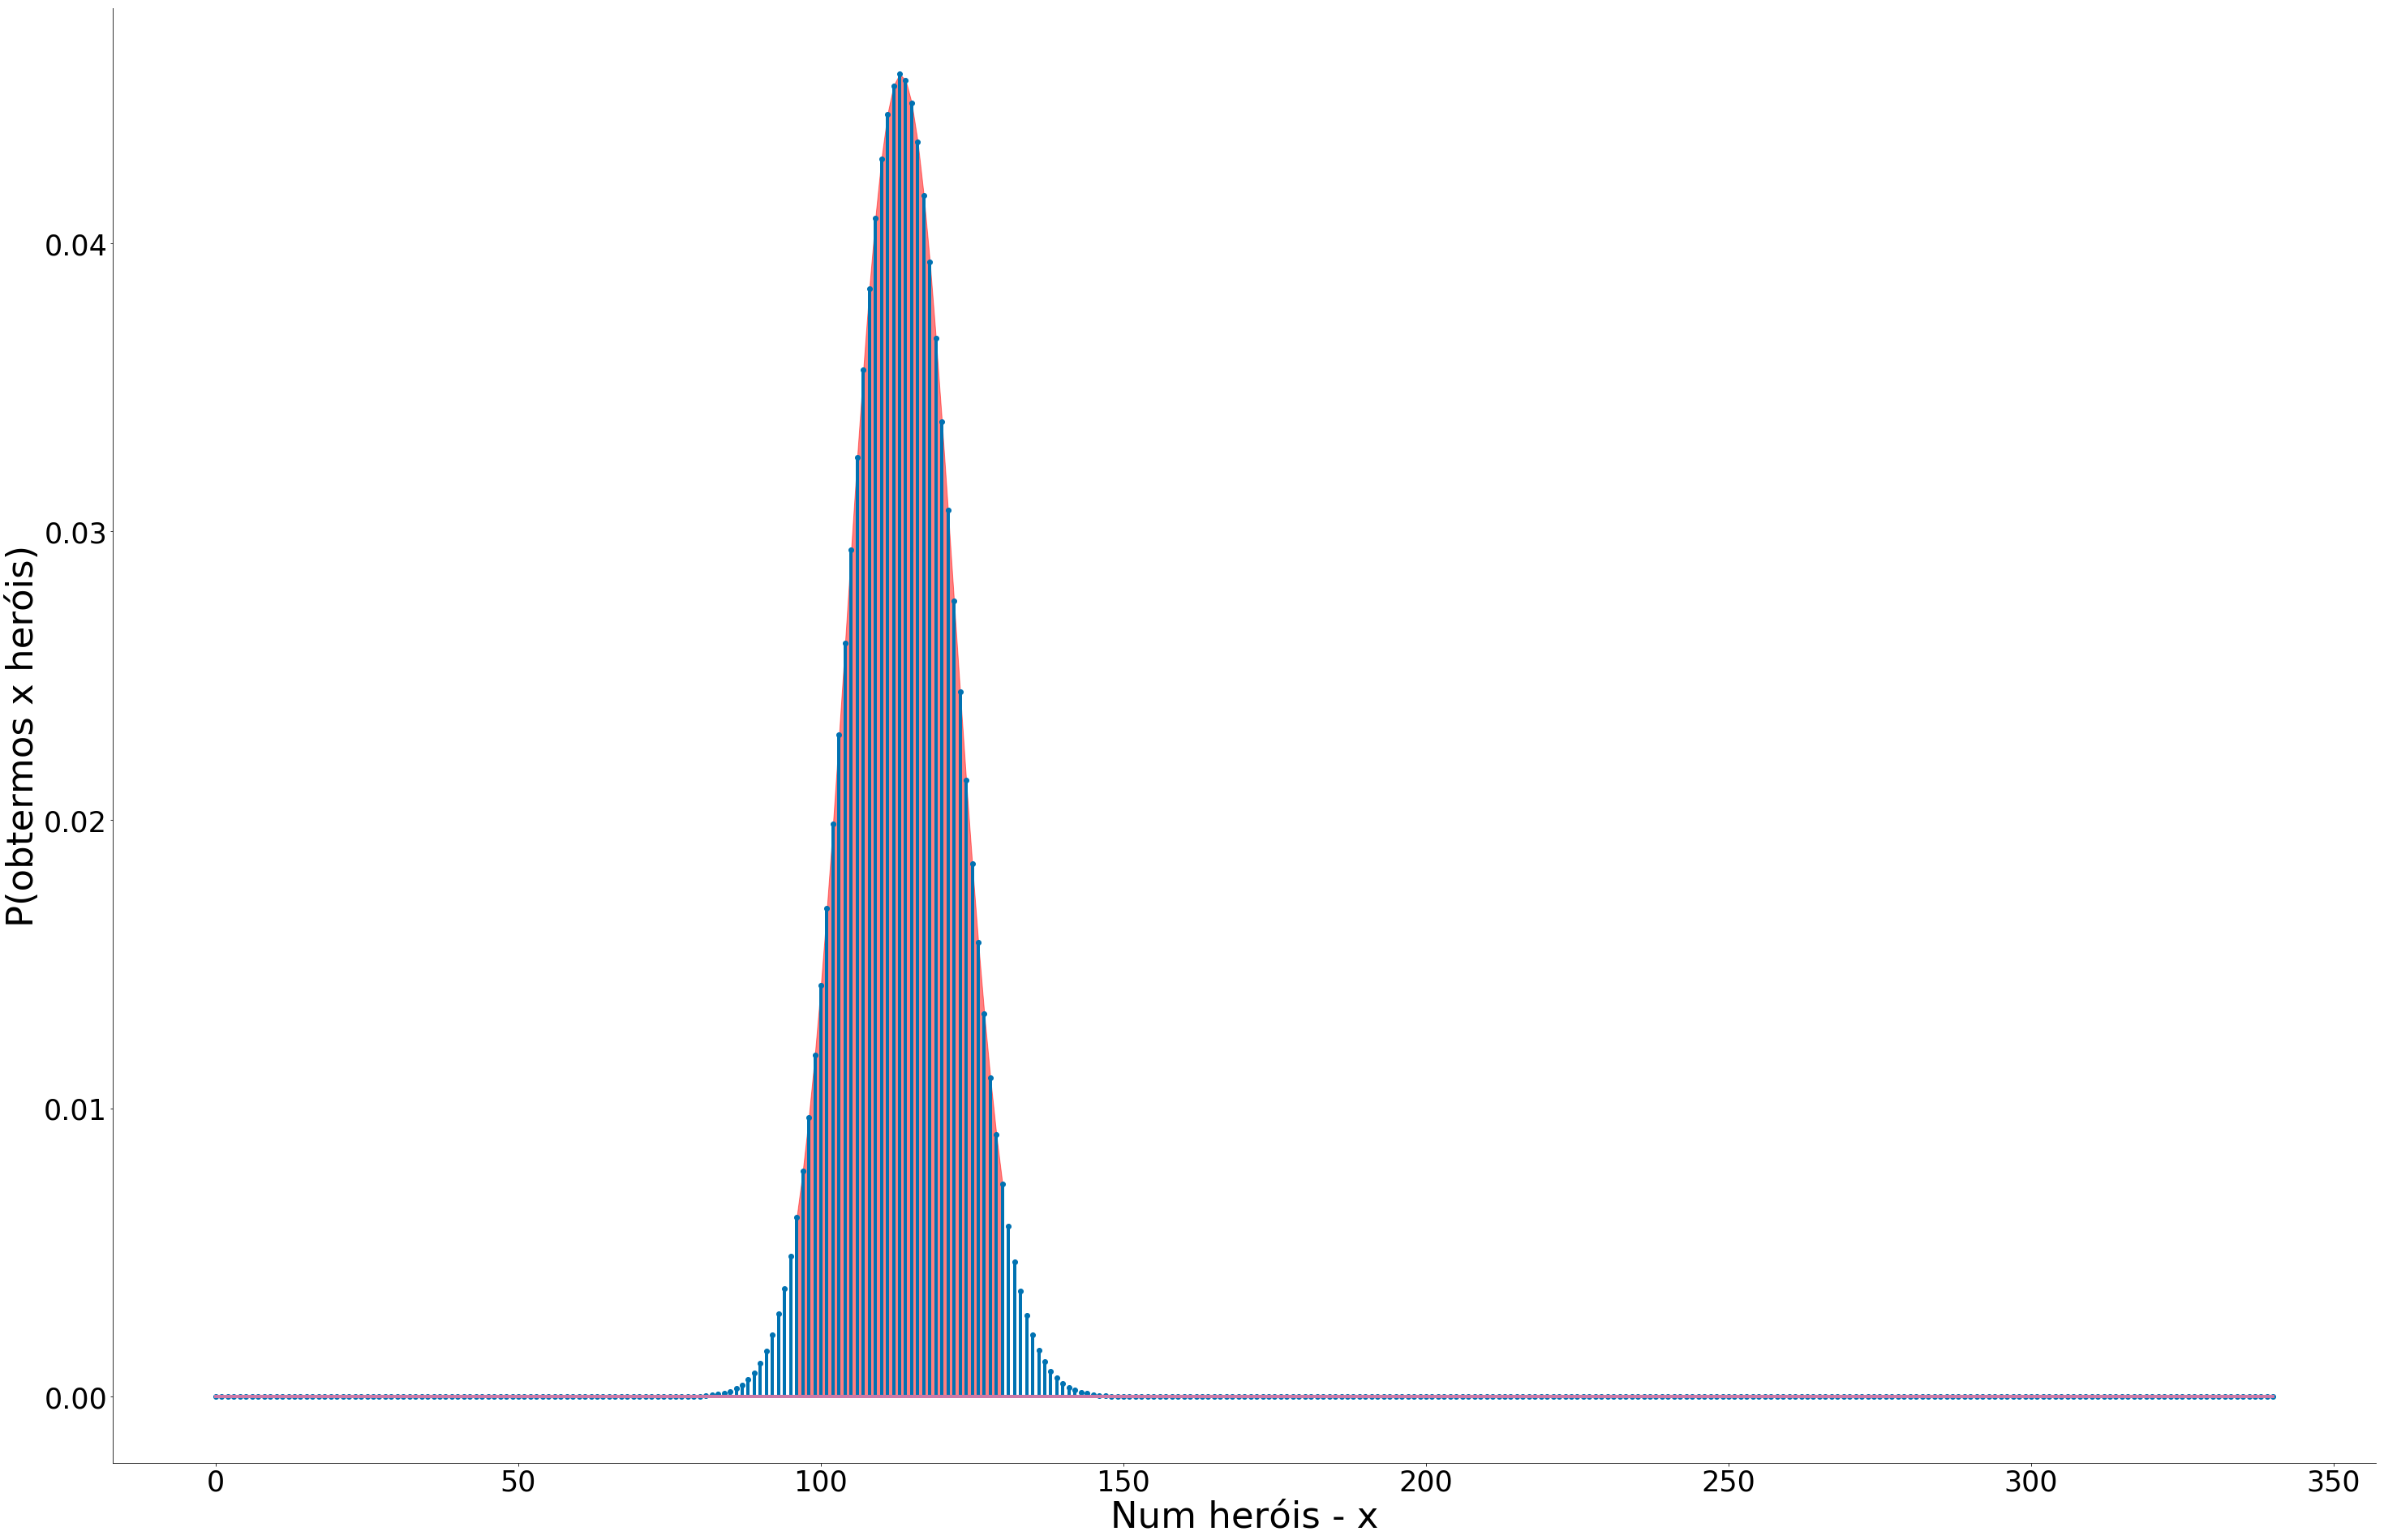

In [15]:
p = (1/3) # probabilidade de heroi/vilão/(N/A)
k = 340  # temos 340 personagens
x = np.arange(0, 341) # Valores no eixo x
prob_binom = ss.distributions.binom.pmf(x, k, p)
plt.stem(x, prob_binom)
plt.xlabel('Num heróis - x')
plt.ylabel('P(obtermos x heróis)')
despine()


init_interval = ss.distributions.binom.ppf(0.025, k, p)
end_interval = ss.distributions.binom.ppf(1-0.025, k, p)

x2 = np.arange(init_interval, end_interval) # Valores no eixo x
prob_binom = ss.distributions.binom.pmf(x2, k, p)
plt.fill_between(x2, prob_binom, color='r', alpha=0.5)

In [16]:
print(init_interval,end_interval)

96.0 131.0


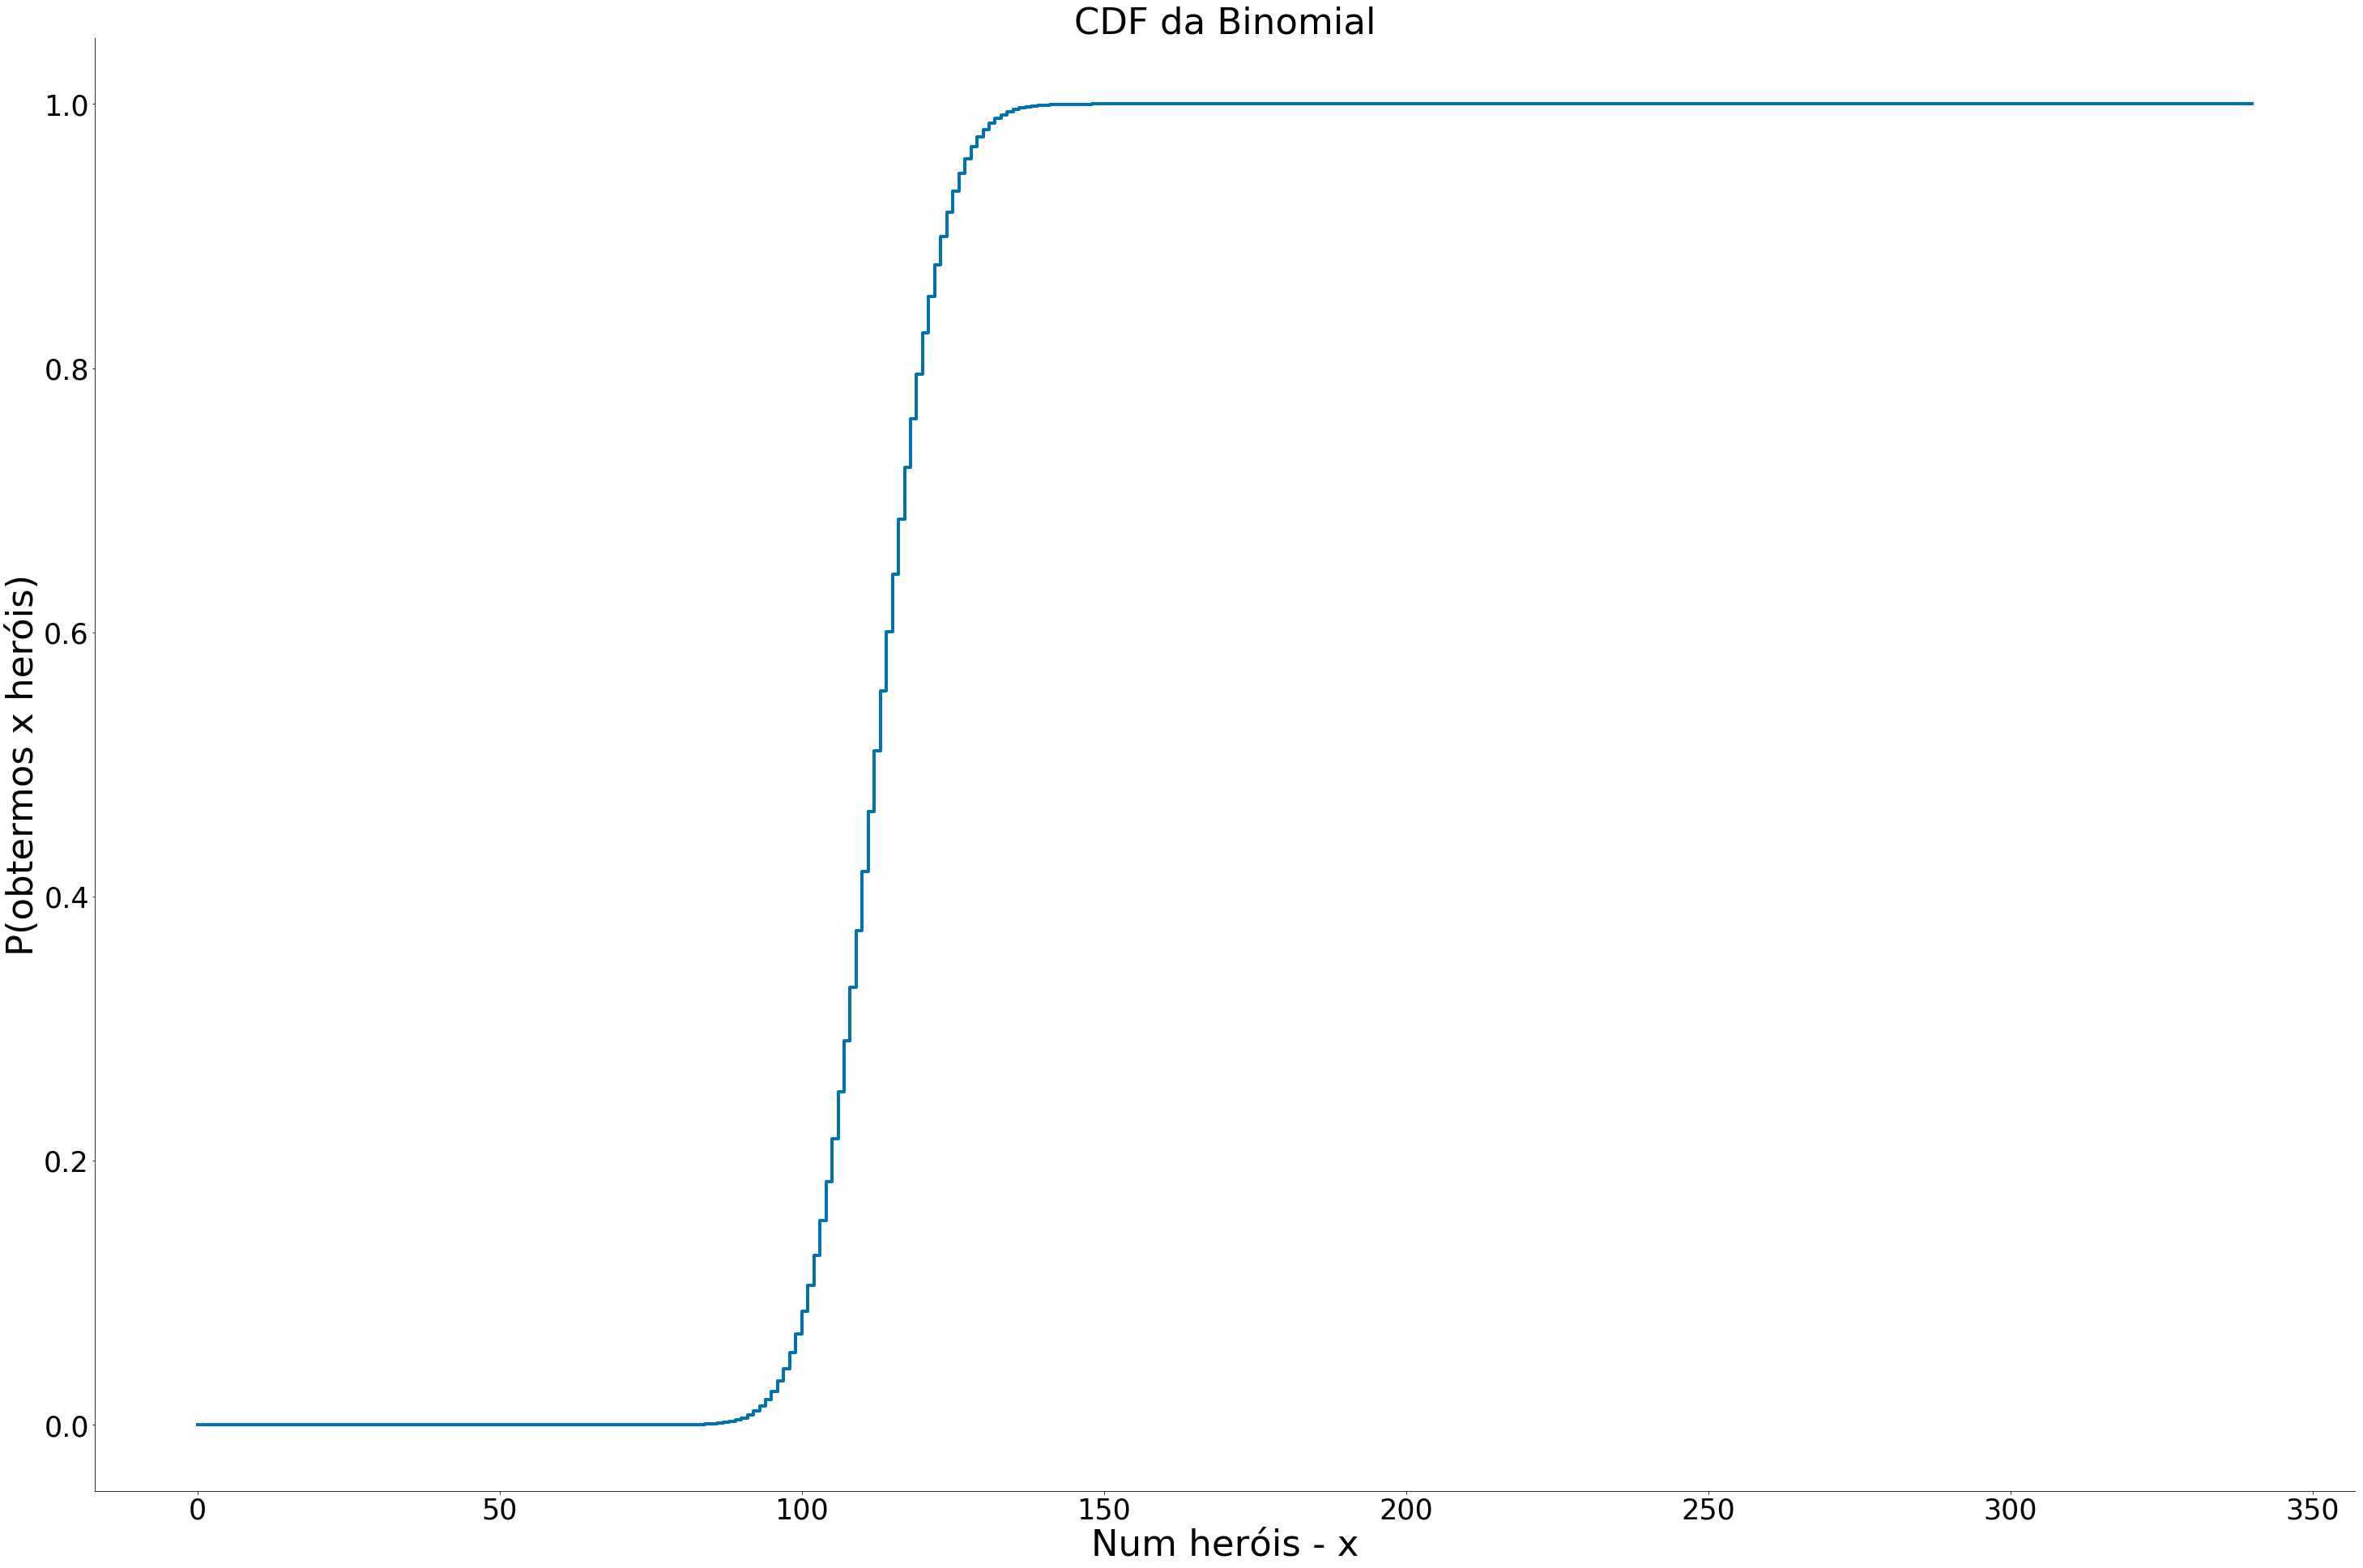

In [17]:
p = 1/3 
k = 340  
x = np.arange(0, 341) 
prob_binom = ss.distributions.binom.cdf(x, k, p)
plt.step(x, prob_binom)
plt.xlabel('Num heróis - x')
plt.ylabel('P(obtermos x heróis)')
plt.title('CDF da Binomial')
despine()

Quando conhecemos a população, fica um pouco mais fácil de determinar um intervalo que contenha 95% dos valores para nosso parâmetro.

#### Mediana dos pesos:

In [18]:
dfchars_f = dfchars[dfchars.weight!= -99]
dfchars_f = dfchars.sample(200)
dfchars[dfchars.weight!= -99]['weight'].median()

83.0

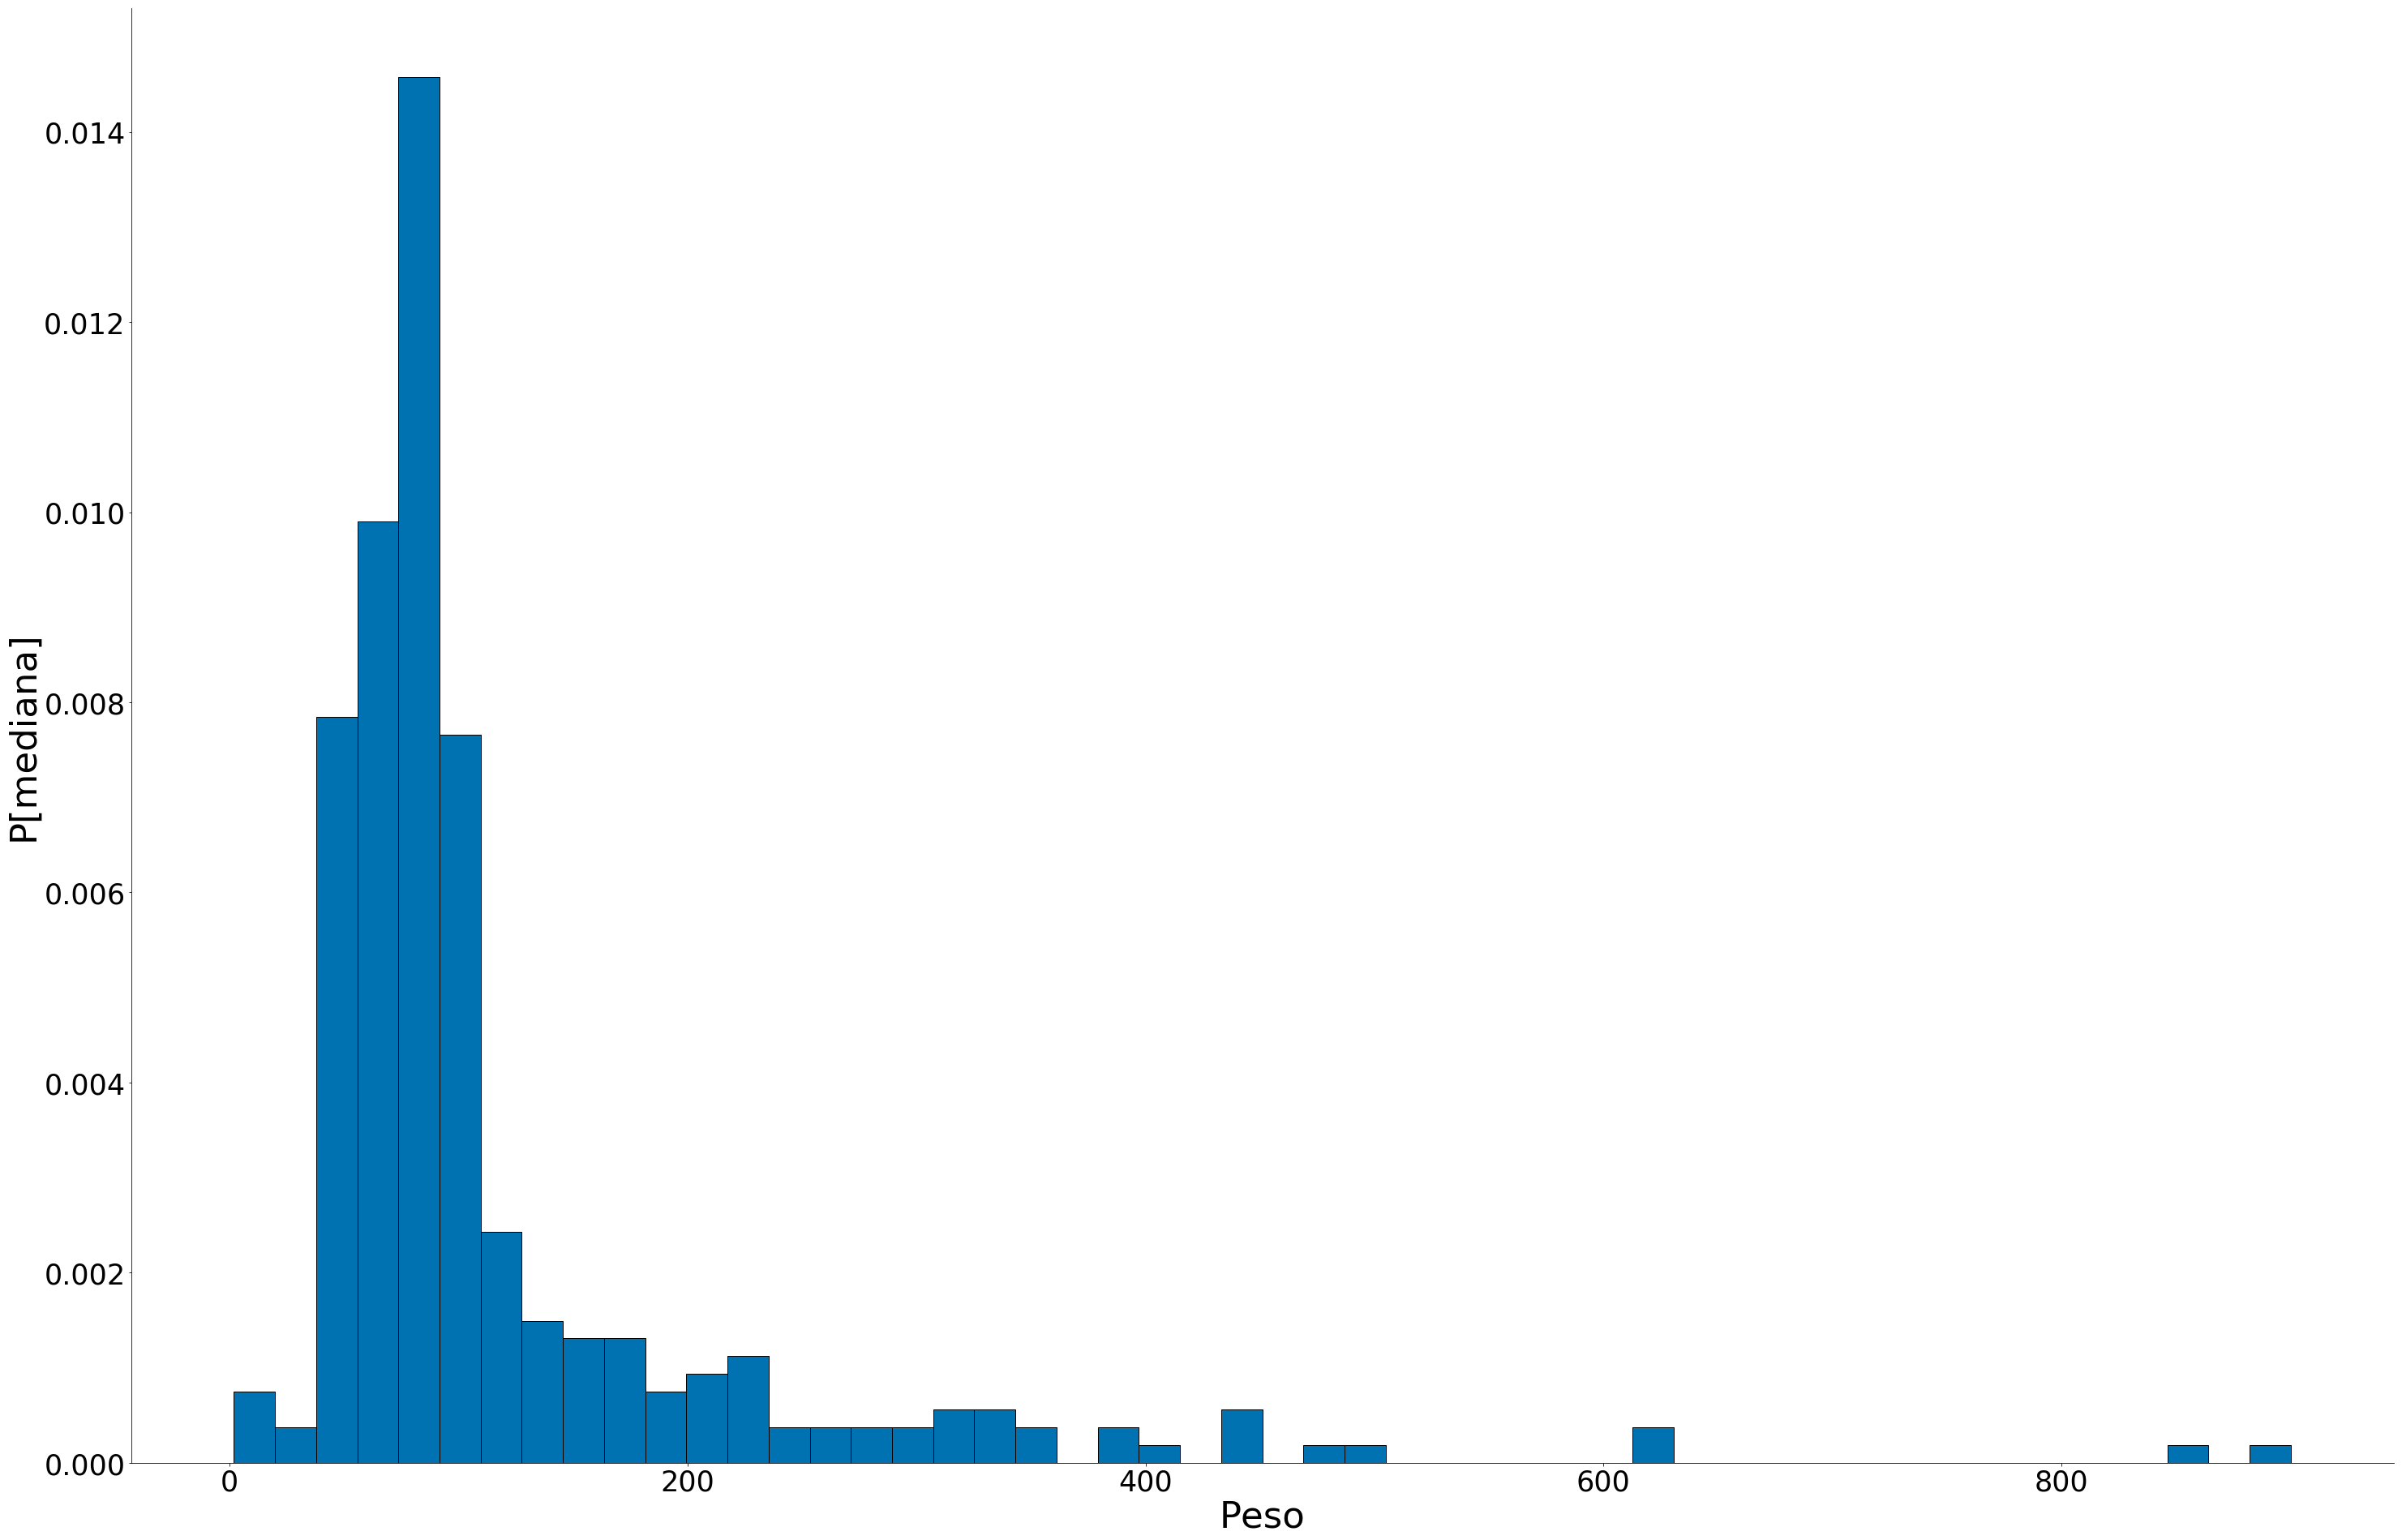

In [19]:
plt.hist(dfchars[dfchars.weight!= -99]['weight'], 50, edgecolor='k', density=True)
plt.xlabel('Peso')
plt.ylabel('P[mediana]')
despine()

In [20]:
S = len(dfchars_f)
N = 5000
values = np.zeros(N)
for i in range(N):
    sample = dfchars_f.sample(S, replace=True)
    values[i] = sample['weight'].median()
print(values)

[79. 74. 79. ... 79. 79. 79.]


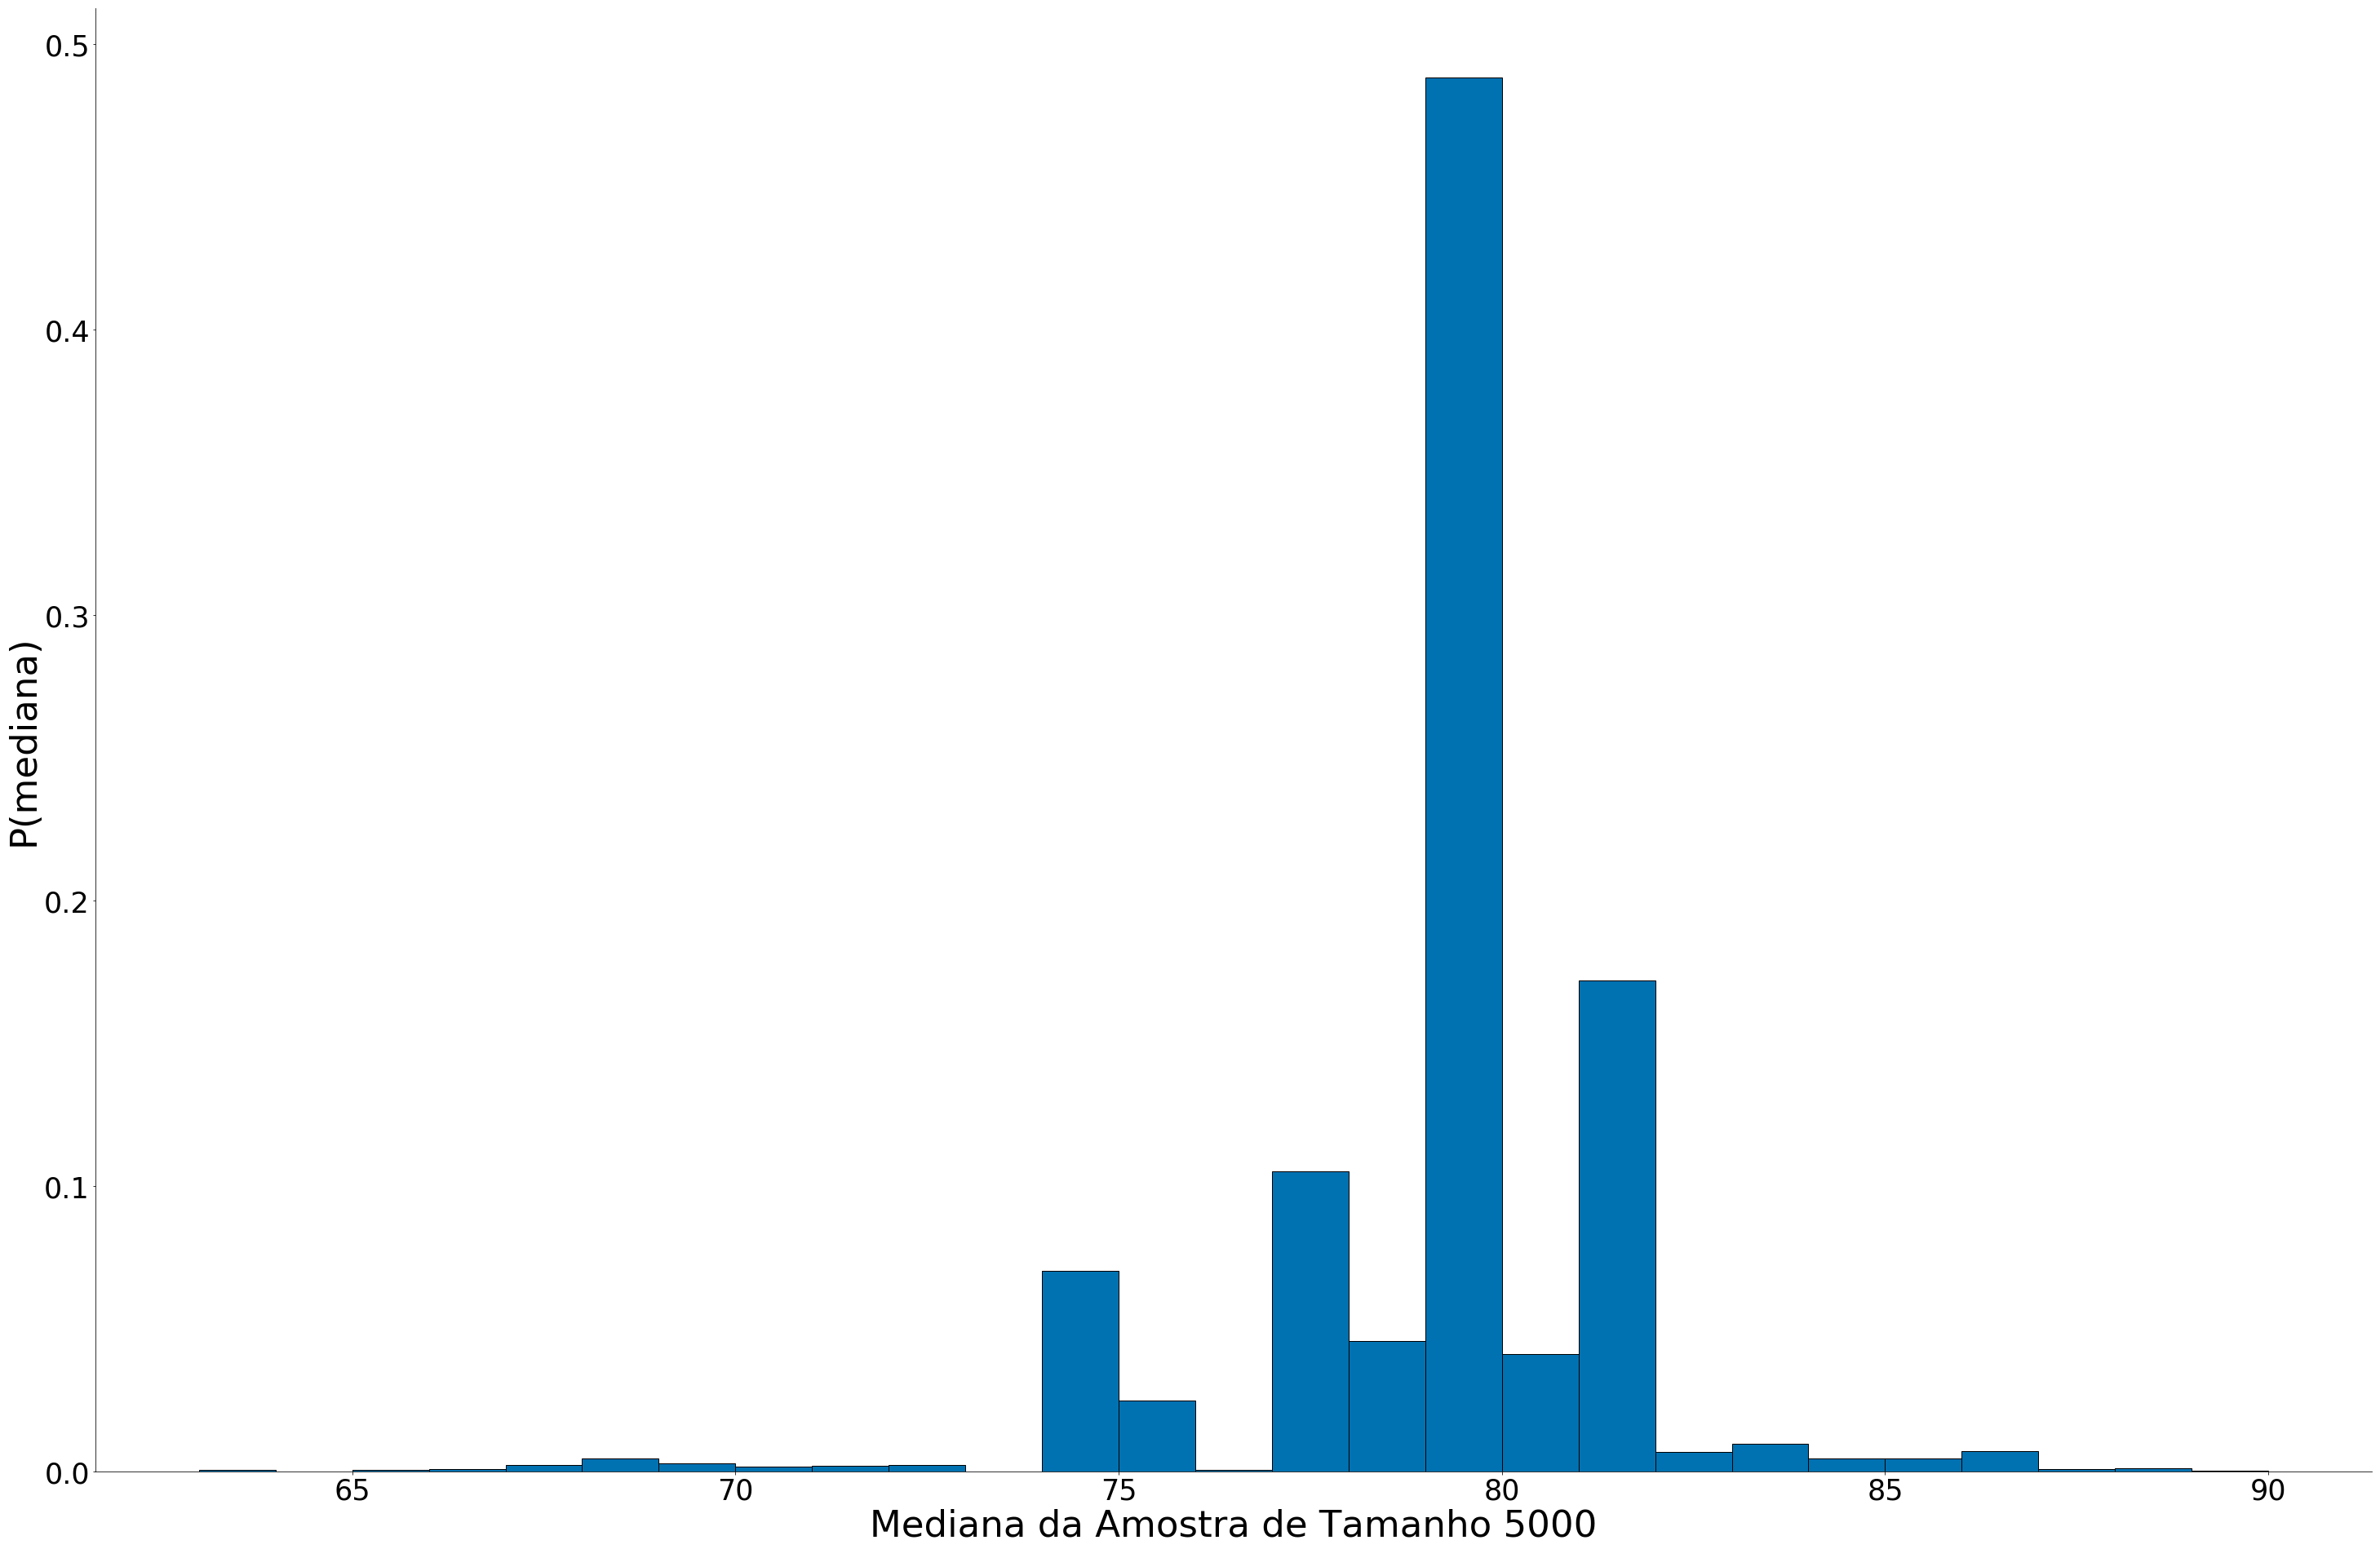

In [21]:
plt.hist(values, bins= int(max(values) - min(values)), edgecolor='k', density=True)
plt.xlabel('Mediana da Amostra de Tamanho 5000')
plt.ylabel('P(mediana)')
despine()

In [22]:
np.percentile(values, 2.5)


74.0

In [23]:
np.percentile(values, 97.5)


83.0

### Mediana das alturas

In [24]:
dfchars_f = dfchars.sample(200)
dfchars[dfchars.weight!= -99]['height'].median()

183.0

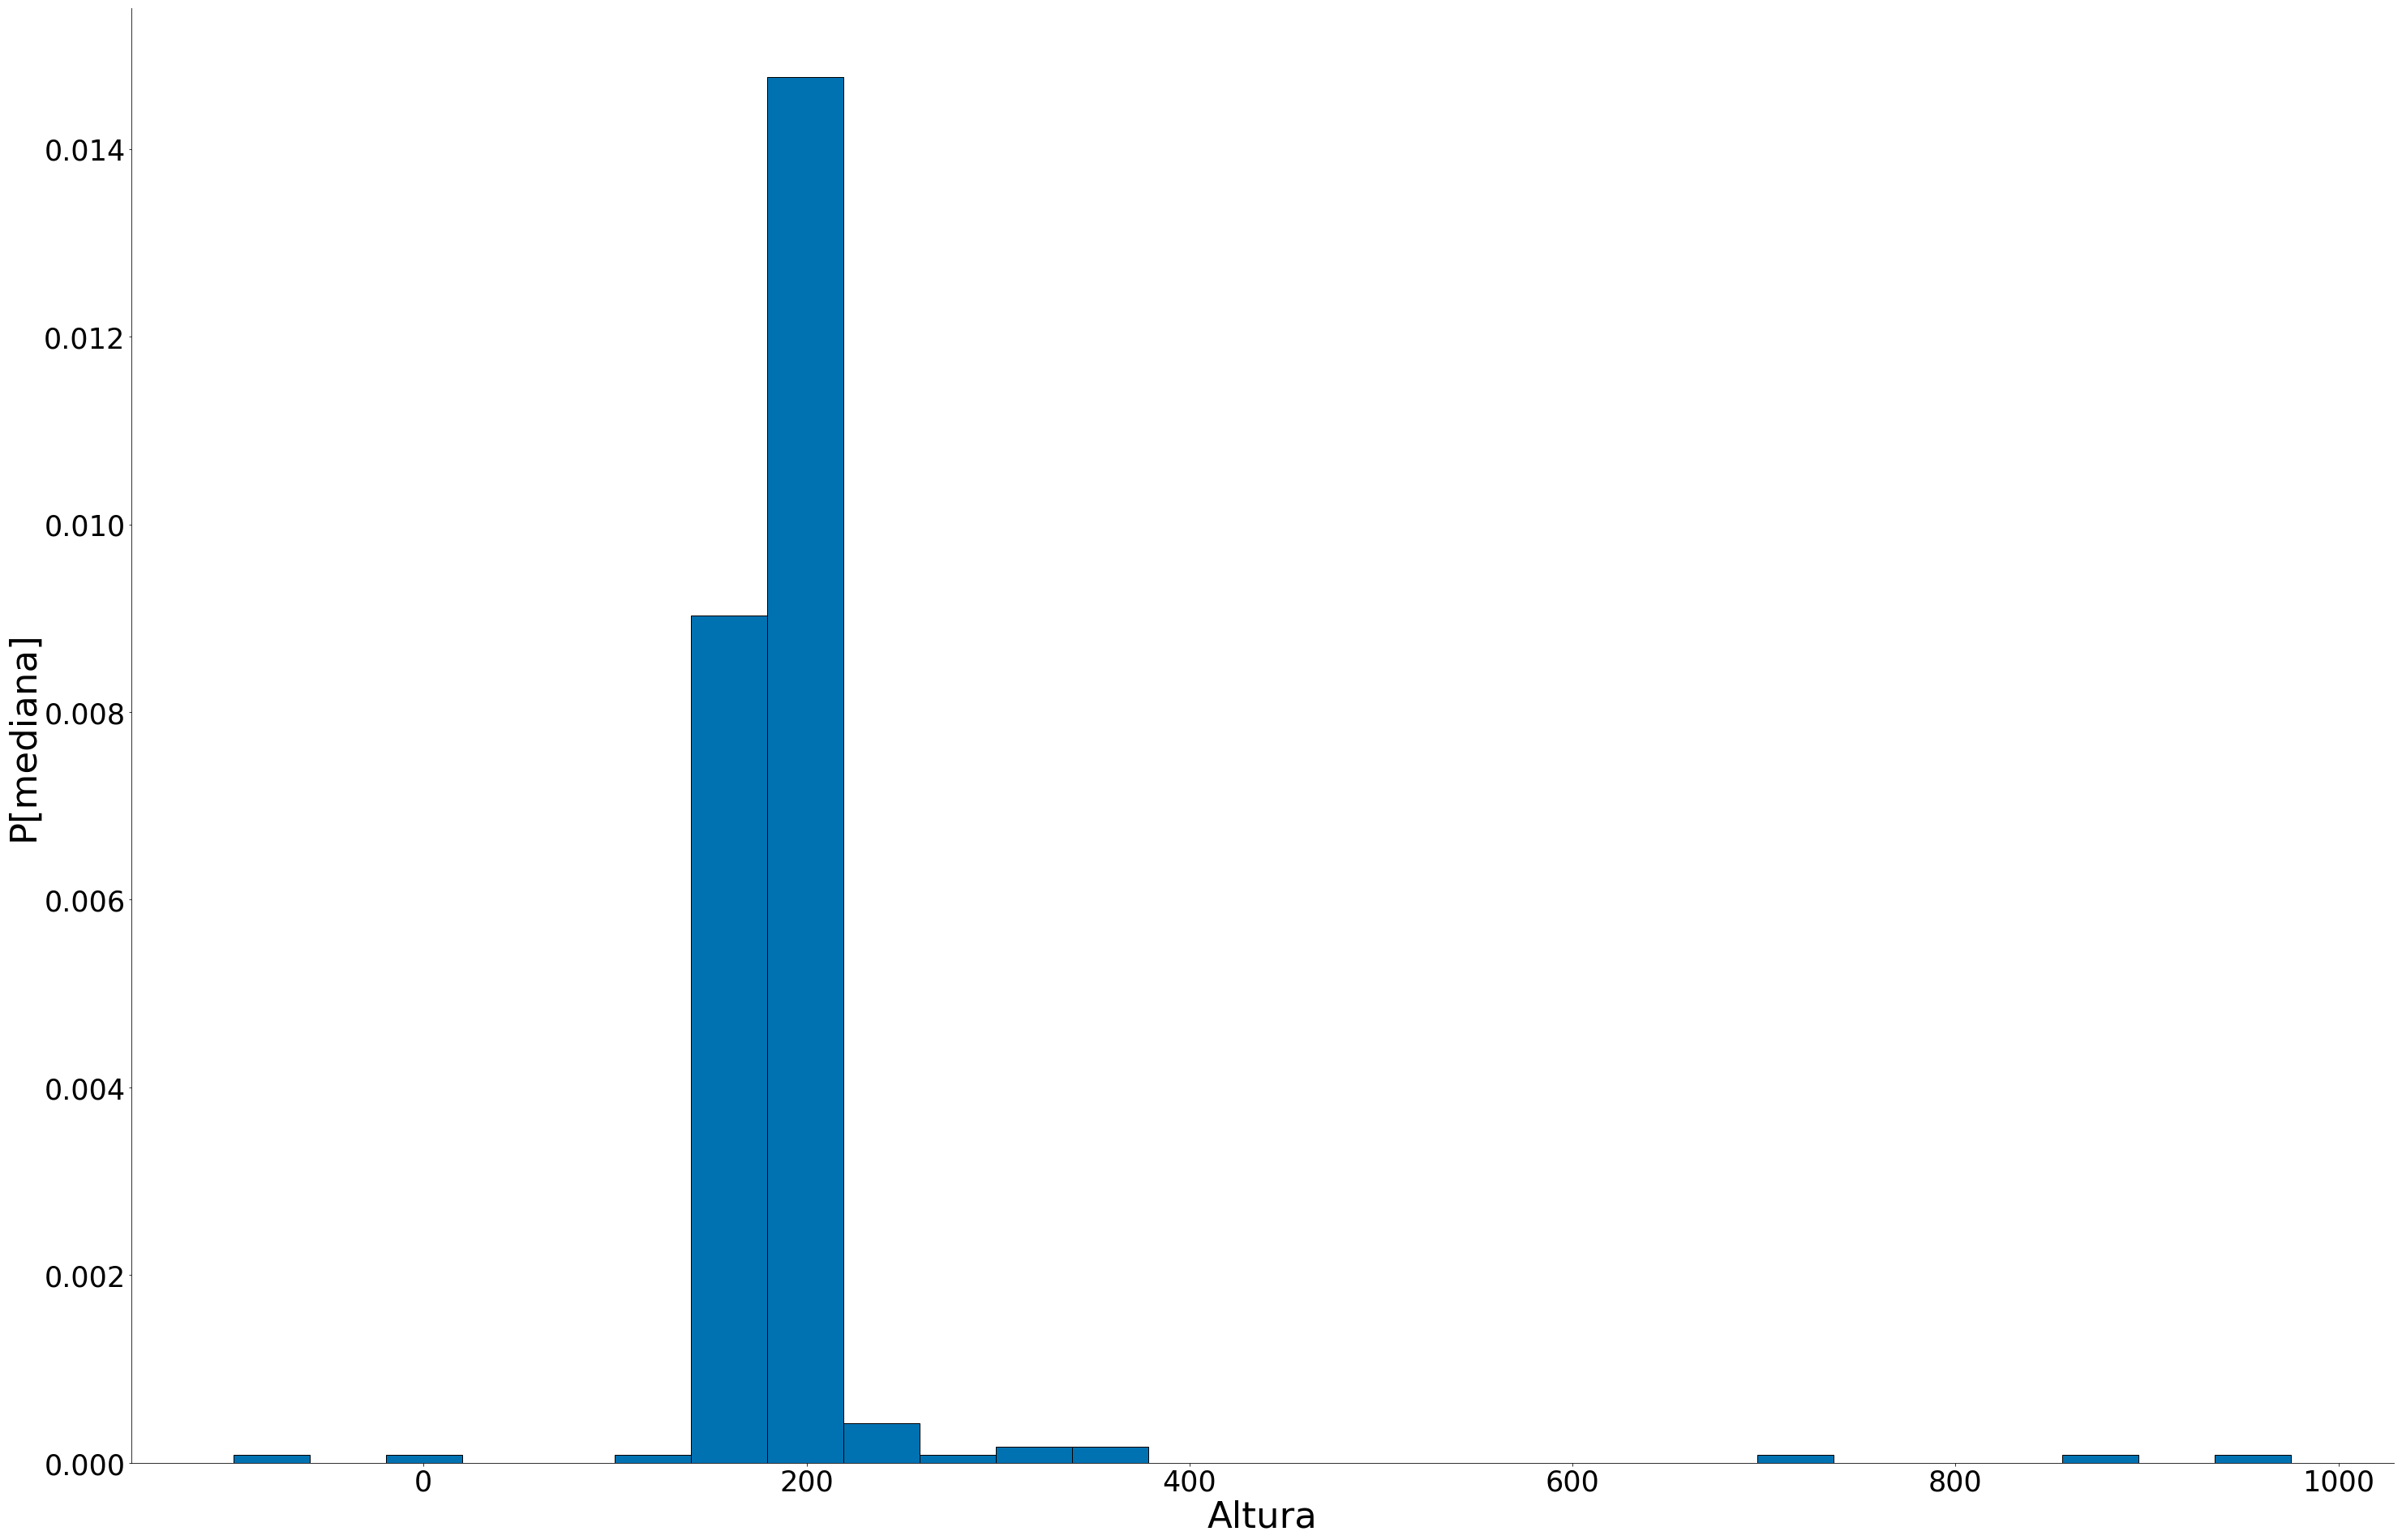

In [25]:
plt.hist(dfchars[dfchars.weight!= -99]['height'], bins= int(max(values) - min(values)), edgecolor='k', density=True)
plt.xlabel('Altura')
plt.ylabel('P[mediana]')
despine()

In [26]:
dfchars[dfchars["height"]> 500]

id           Name gender eye_color             race hair_color  height  \
117  231  Fin Fang Foom   Male       red  Kakarantharaian    No Hair   975.0   
125  246       Galactus   Male     black    Cosmic Entity      Black   876.0   
139  271          Groot   Male    yellow   Flora Colossus          -   701.0   

    skin_color alignment  weight  
117      green      good      18  
125          -   neutral      16  
139          -      good       4

#### Curiosidades

###### Fin Fang Foom	


Personagem fictício e um dragão alienígena que aparece no universo Marvel. Fin Fang Foom apareceu pela primeira vez em Strange Tales vol. 1, nº 89 (Outubro de 1961). Ele vários outros membros de sua raça originalmente abandonaram seu pacífico planeta no intuito de conquistar outros planetas. Os dragões alienígenas pousaram em terra na antiga China, e usaram sua transmutação de forma natural para imitar a forma humana, na intenção de se inserir e estudar a espécie humana antes de iniciar sua conquista. Foom entretanto estava preso em um túmulo, e adormecido graças a uma erva que lhe colocava em estado catatônico

In [27]:
Image(url= "https://images-na.ssl-images-amazon.com/images/S/cmx-images-prod/Item/645481/645481._SX360_QL80_TTD_.jpg")

###### Galactus

Entidade cósmica dentro do universo Marvel da Marvel Comics. Criado por Stan Lee e Jack Kirby, ele estreou em Quarteto Fantástico nº48, o inicio de um arco de história algumas vezes considerado como a melhor colaboração entre Lee e Kirby.

Quando Galactus ameaçou destruir a Terra, o Quarteto Fantástico (auxiliado pelo Vigia Uatu e pelo arauto rebelde de Galactus, o Surfista Prateado) o derrotou ameaçando-o com o Nulificador Total. Galactus jurou nunca mais tentar atacar a Terra.

Apresentado inicialmente como vilão, mais tarde teve sua função no Universo esclarecida em um julgamento onde várias raças tentavam decidir o destino de Reed Richards - que estava sendo julgado por ter salvo a vida de Galactus e, portanto, ser co-responsável pelas vidas que o Devorador de Mundos tirou depois disto, como no ato de consumir o mundo-sede do império skrull, por exemplo. Através de um depoimento de Odin - só aceito plenamente após a intervenção da entidade cósmica Eternidade - foi a público que sua função é a de encontrar um planeta seguro, que fosse capaz de sobreviver a próxima entropia do universo, uma vez que o próprio Galactus seria o único sobrevivente de uma entropia anterior.

Apesar de ser conhecido como Devorador de Mundos, Galactus não conseguiu se alimentar do planeta mãe dos Espectros. A corrupção da raça dos Espectros era tamanha que foi capaz de contaminar o planeta em que viviam, tornando-o inadequado.

In [28]:
Image(url= "http://www.guiadosquadrinhos.com/personagem/imagens/2012/06/105person_6424.jpg")

###### Groot

Sua primeira versão foi criada por Stan Lee, Jack Kirby e Dick Ayers, aparecendo pela primeira vez em "Tales to Astonish" #13 (Novembro de 1960). Nessa versão Groot era uma criatura com a aparência de uma árvore Humanoide, que buscava seres alienígenas para usá-las em experimentos científicos.

O personagem foi reformulado em 2006 por Keith Giffen e Timothy Green II para ser um nobre herói, aparecendo pela primeira vez no enredo Annihilation: Conquest (Setembro de 2007). Groot passou a estrelar sua série spin-off, Guardiões da Galáxia, juntando-se à equipe de mesmo nome. Groot foi destaque em uma variedade de produtos relacionados da Marvel, incluindo séries animadas de televisão, brinquedos e cards.


Vin Diesel fez a voz de Groot no filme 2014 Guardiões da Galáxia, sua sequência Guardiões da Galáxia Vol. 2 de 2017 e reprisou o papel no filme Avengers: Infinity War (2018), e em Avengers: Endgame (2019), enquanto Krystian Godlewski incorporou o personagem através da captura de movimento no primeiro filme. Desde sua estréia no cinema e estréia na série animada, Groot se tornou um ícone da cultura pop e sua frase "Eu sou o Groot" se tornou um meme da Internet.

In [29]:
Image(url= "https://2.bp.blogspot.com/-ZkgWbCxdqkw/WcVXEGTjGXI/AAAAAAAAQ4A/s9q4DT7pi5wvX-aXajI9xuU0S79_PsolQCLcBGAs/s1600/giphy.gif")

In [30]:
S = len(dfchars_f)
N = 5000
values = np.zeros(N)
for i in range(N):
    sample = dfchars_f.sample(S, replace=True)
    values[i] = sample['height'].median()
print(values)

[180.  181.5 180.  ... 180.  183.  183. ]


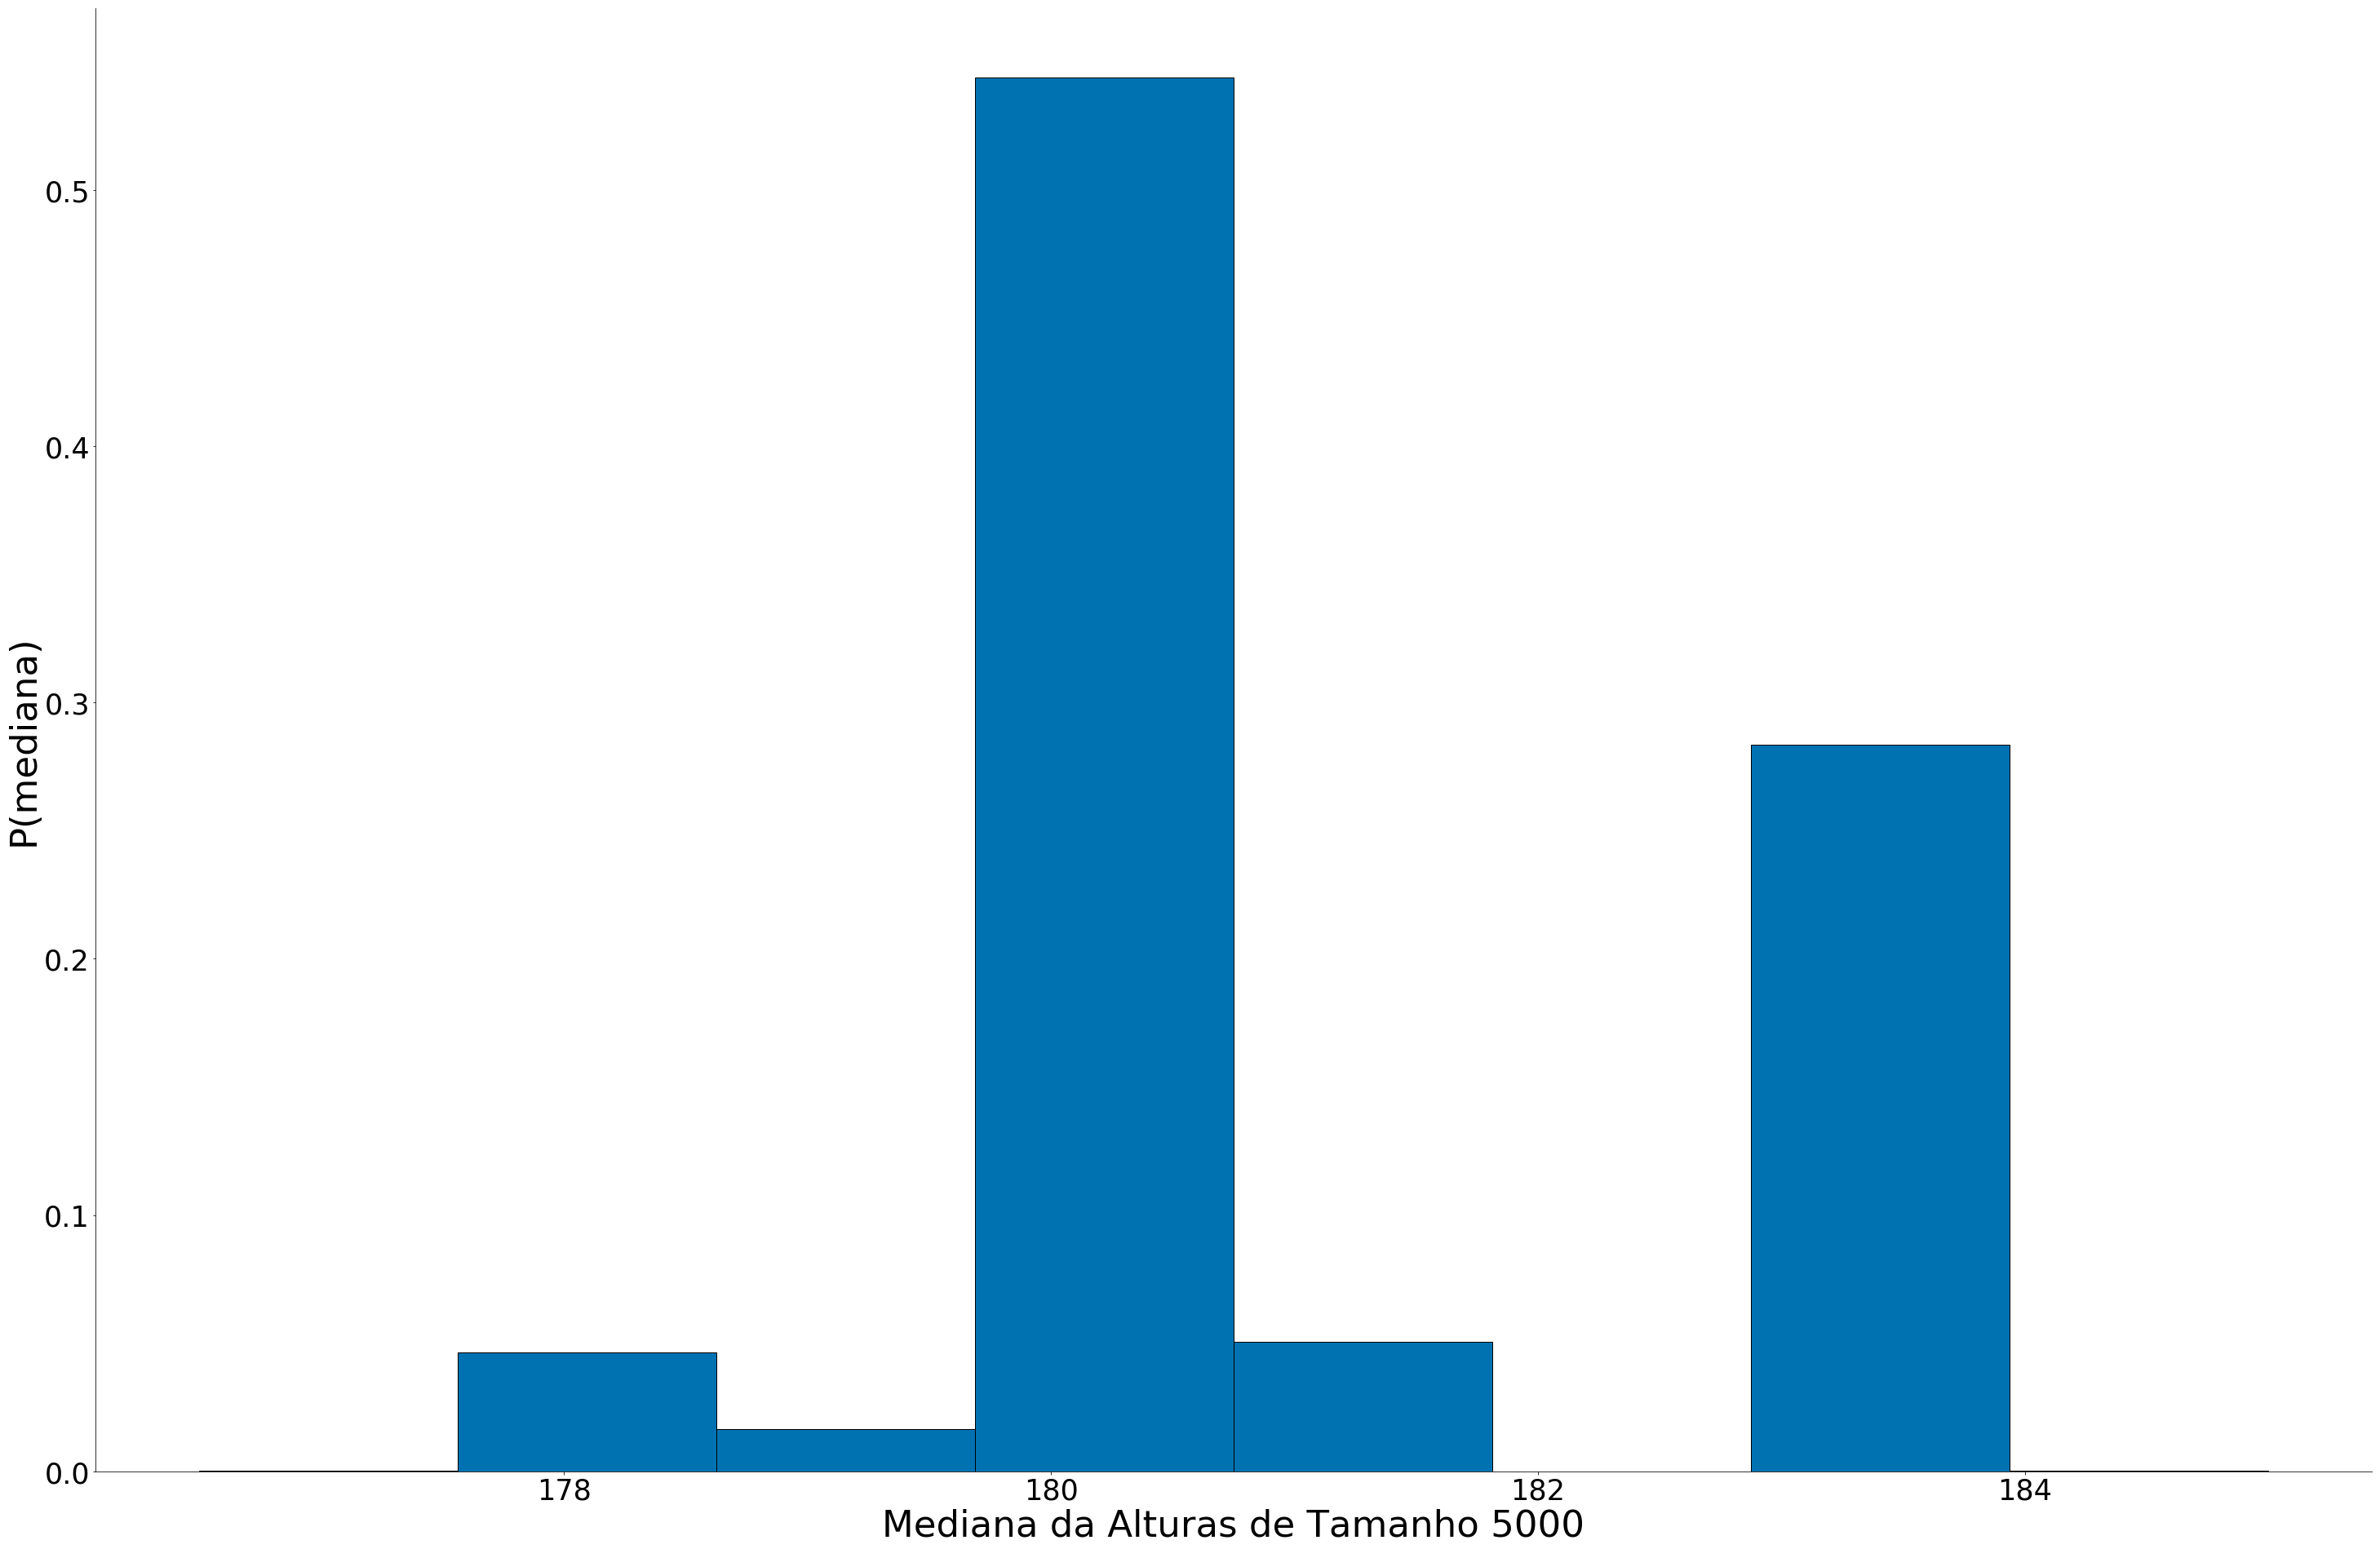

In [31]:
plt.hist(values, bins= int(max(values) - min(values)), edgecolor='k', density=True)
plt.xlabel('Mediana da Alturas de Tamanho 5000')
plt.ylabel('P(mediana)')
despine()

In [32]:
np.percentile(values, 2.5)

178.0

In [33]:
np.percentile(values, 97.5)

183.0

## Universo Cinematográfico Marvel

Uma franquia americana de sucesso e um universo compartilhado centrado em uma série de filmes de super-heróis, produzidos independentemente pela Marvel Studios e baseados em personagens que aparecem nas histórias em quadrinhos publicadas pela Marvel Comics. A franquia se expandiu para incluir histórias em quadrinhos, curtas-metragens, séries de televisão e séries digitais. O universo compartilhado, muito parecido com o Universo Marvel dos quadrinhos, foi estabelecido através do cruzamento de elementos de enredo, elenco e personagens. A franquia geralmente consiste em filmes de heróis com histórias fechadas que se entrelaçam, separados em fases que culminam em "Vingadores". Todos os filmes vão construindo uma trama envolvendo o vilão Thanos e as 5 jóias do Infinito.

In [34]:
df = pd.read_csv("MCU.csv", index_col = False)

### 22 Filmes ao longo de 11 Anos distribuídos em 3 Fases


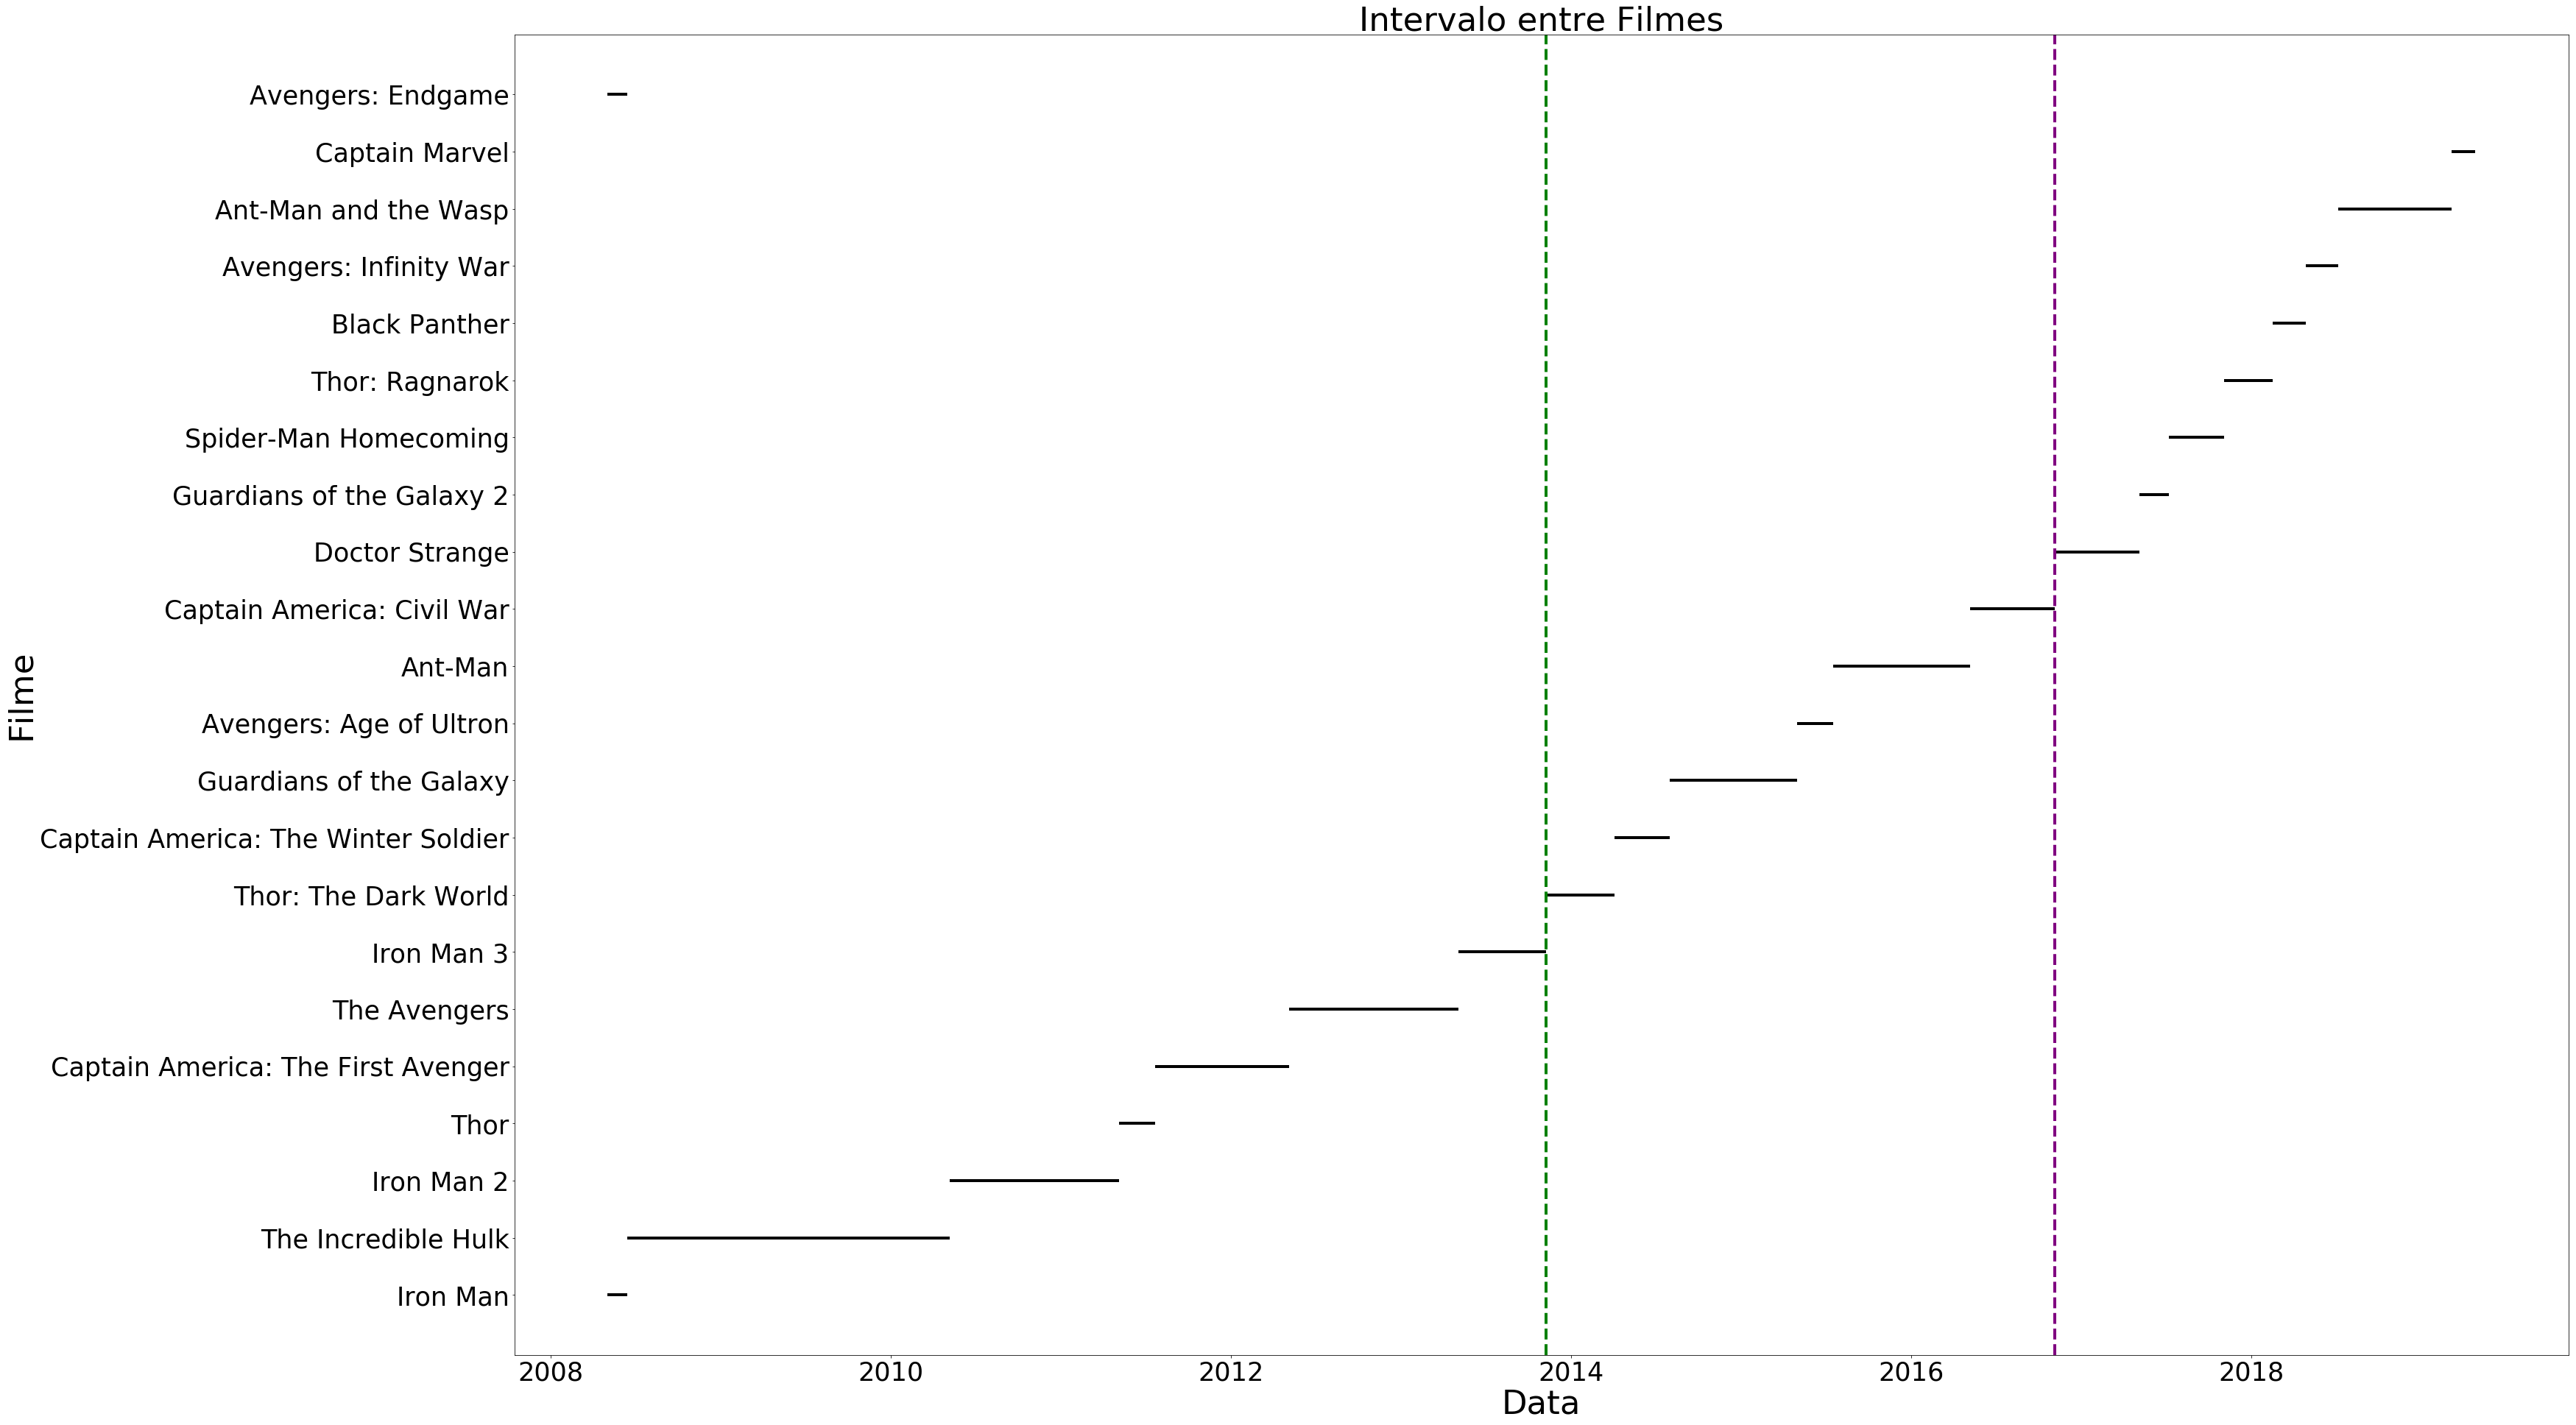

In [35]:
def diff_dates(date1, date2):
    return abs(date2-date1).days

release = df['Year']
release

x = [dt.datetime.strptime(d, '%d/%m/%Y').date() for d in release]
y = df['Movies']

inicio = x[1:]
fim = x[:-1]

# intervalo em dias entre os filmes
intervalos = [diff_dates(x, y) for x, y in zip(inicio, fim)]

plt.axvline(x[7], linestyle='--', color='green')
plt.axvline(x[13], linestyle='--', color='purple')
plt.hlines(y, inicio, fim, linestyle='solid')
plt.title('Intervalo entre Filmes')
plt.xlabel("Data")
plt.ylabel("Filme")
plt.show()

A maior lacuna entre os lançamentos (693 dias) ocorreu entre "O Incrível Hulk" e o "Homem de Ferro 2".

### Fase 1
O primeiro conjunto de filmes apresenta o universo principal no qual os filmes são ambientados, bem como os personagens principais como Homem de Ferro, Thor, Capitão América, Hulk, Viúva Negra, Gavião Arqueiro e Nick Fury, e organizações como a S.H.I.E.L.D. e HYDRA. Muitos dos filmes da Fase 1 se concentram no Tesseract, um artefato alienígena que mais tarde é estabelecido como uma das 6 jóias do Infinito. O filme final, "Os Vingadores", envolve o vilão Loki e Thanos aliando-se para roubar o Tesseract e conquistar a Terra, levando à formação do grupo.

### Bilheteria

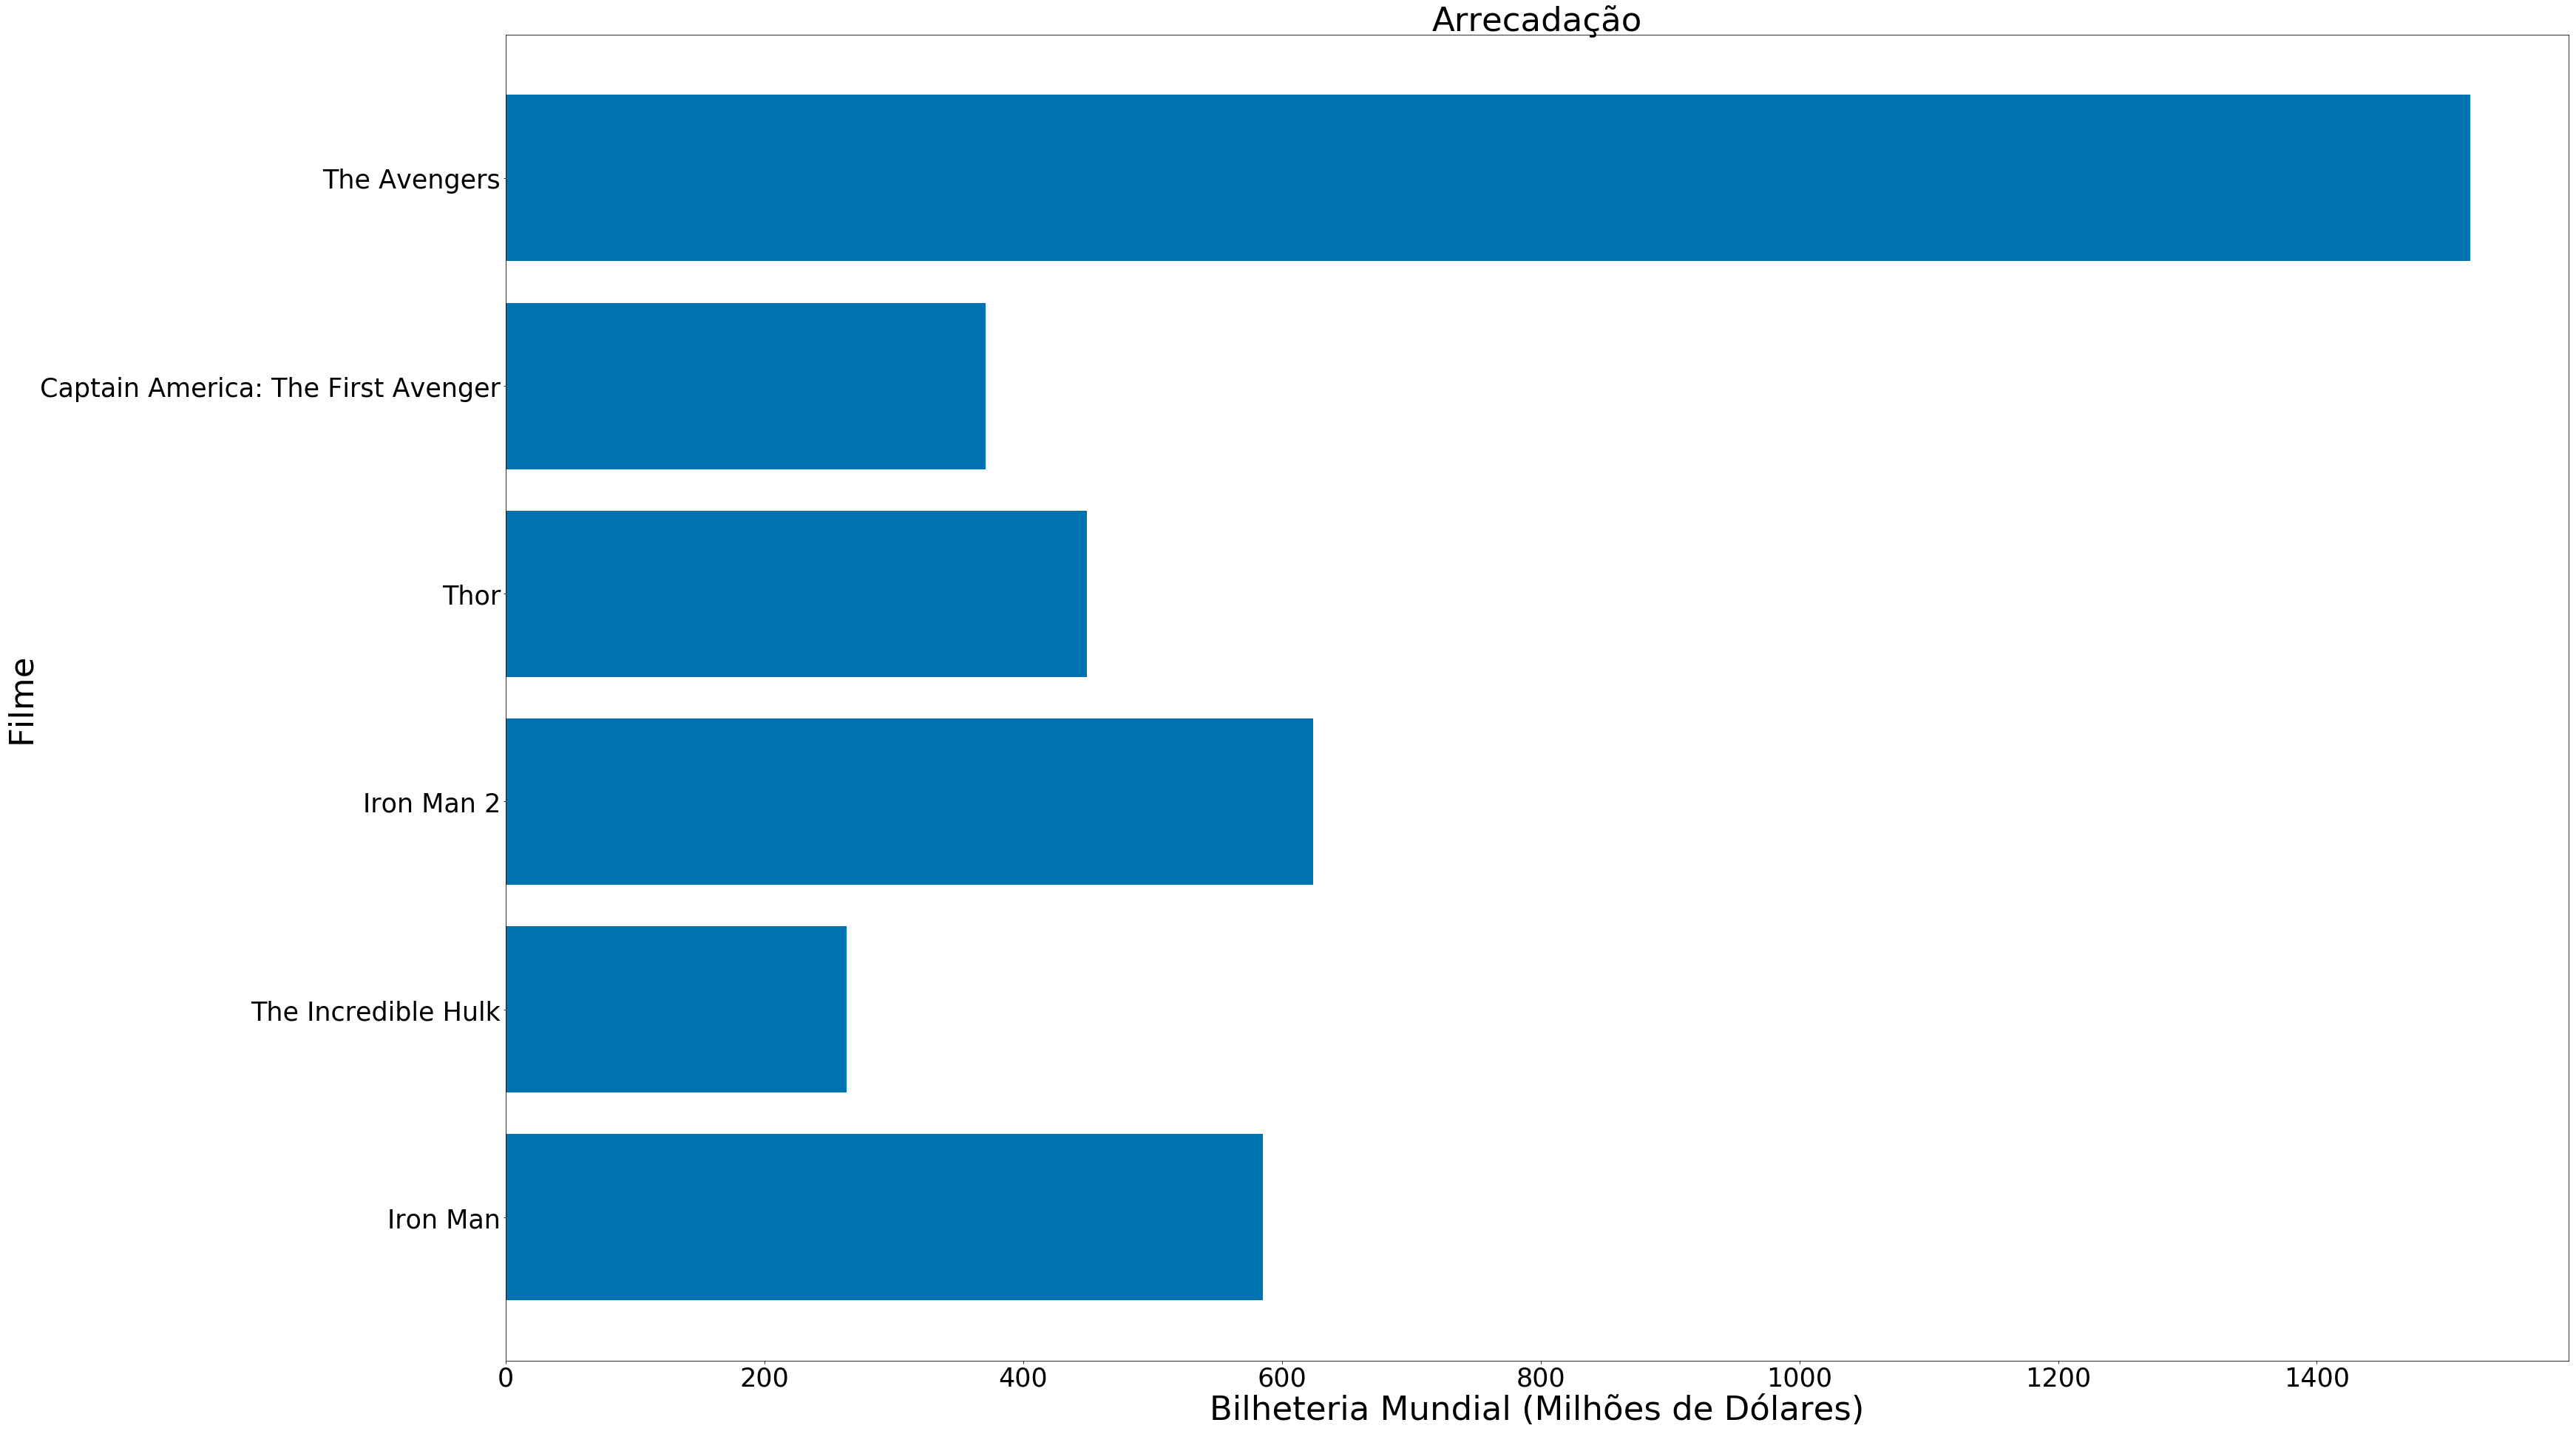

In [36]:
filmes1 = df[df['Phase']==1]['Movies']
bilheteria1 = df[df['Phase']==1]['Gross Worldwide']

plt.title('Arrecadação')
plt.xlabel("Bilheteria Mundial (Milhões de Dólares)")
plt.ylabel("Filme")
plt.barh(filmes1, bilheteria1)
plt.show()

### Crítica

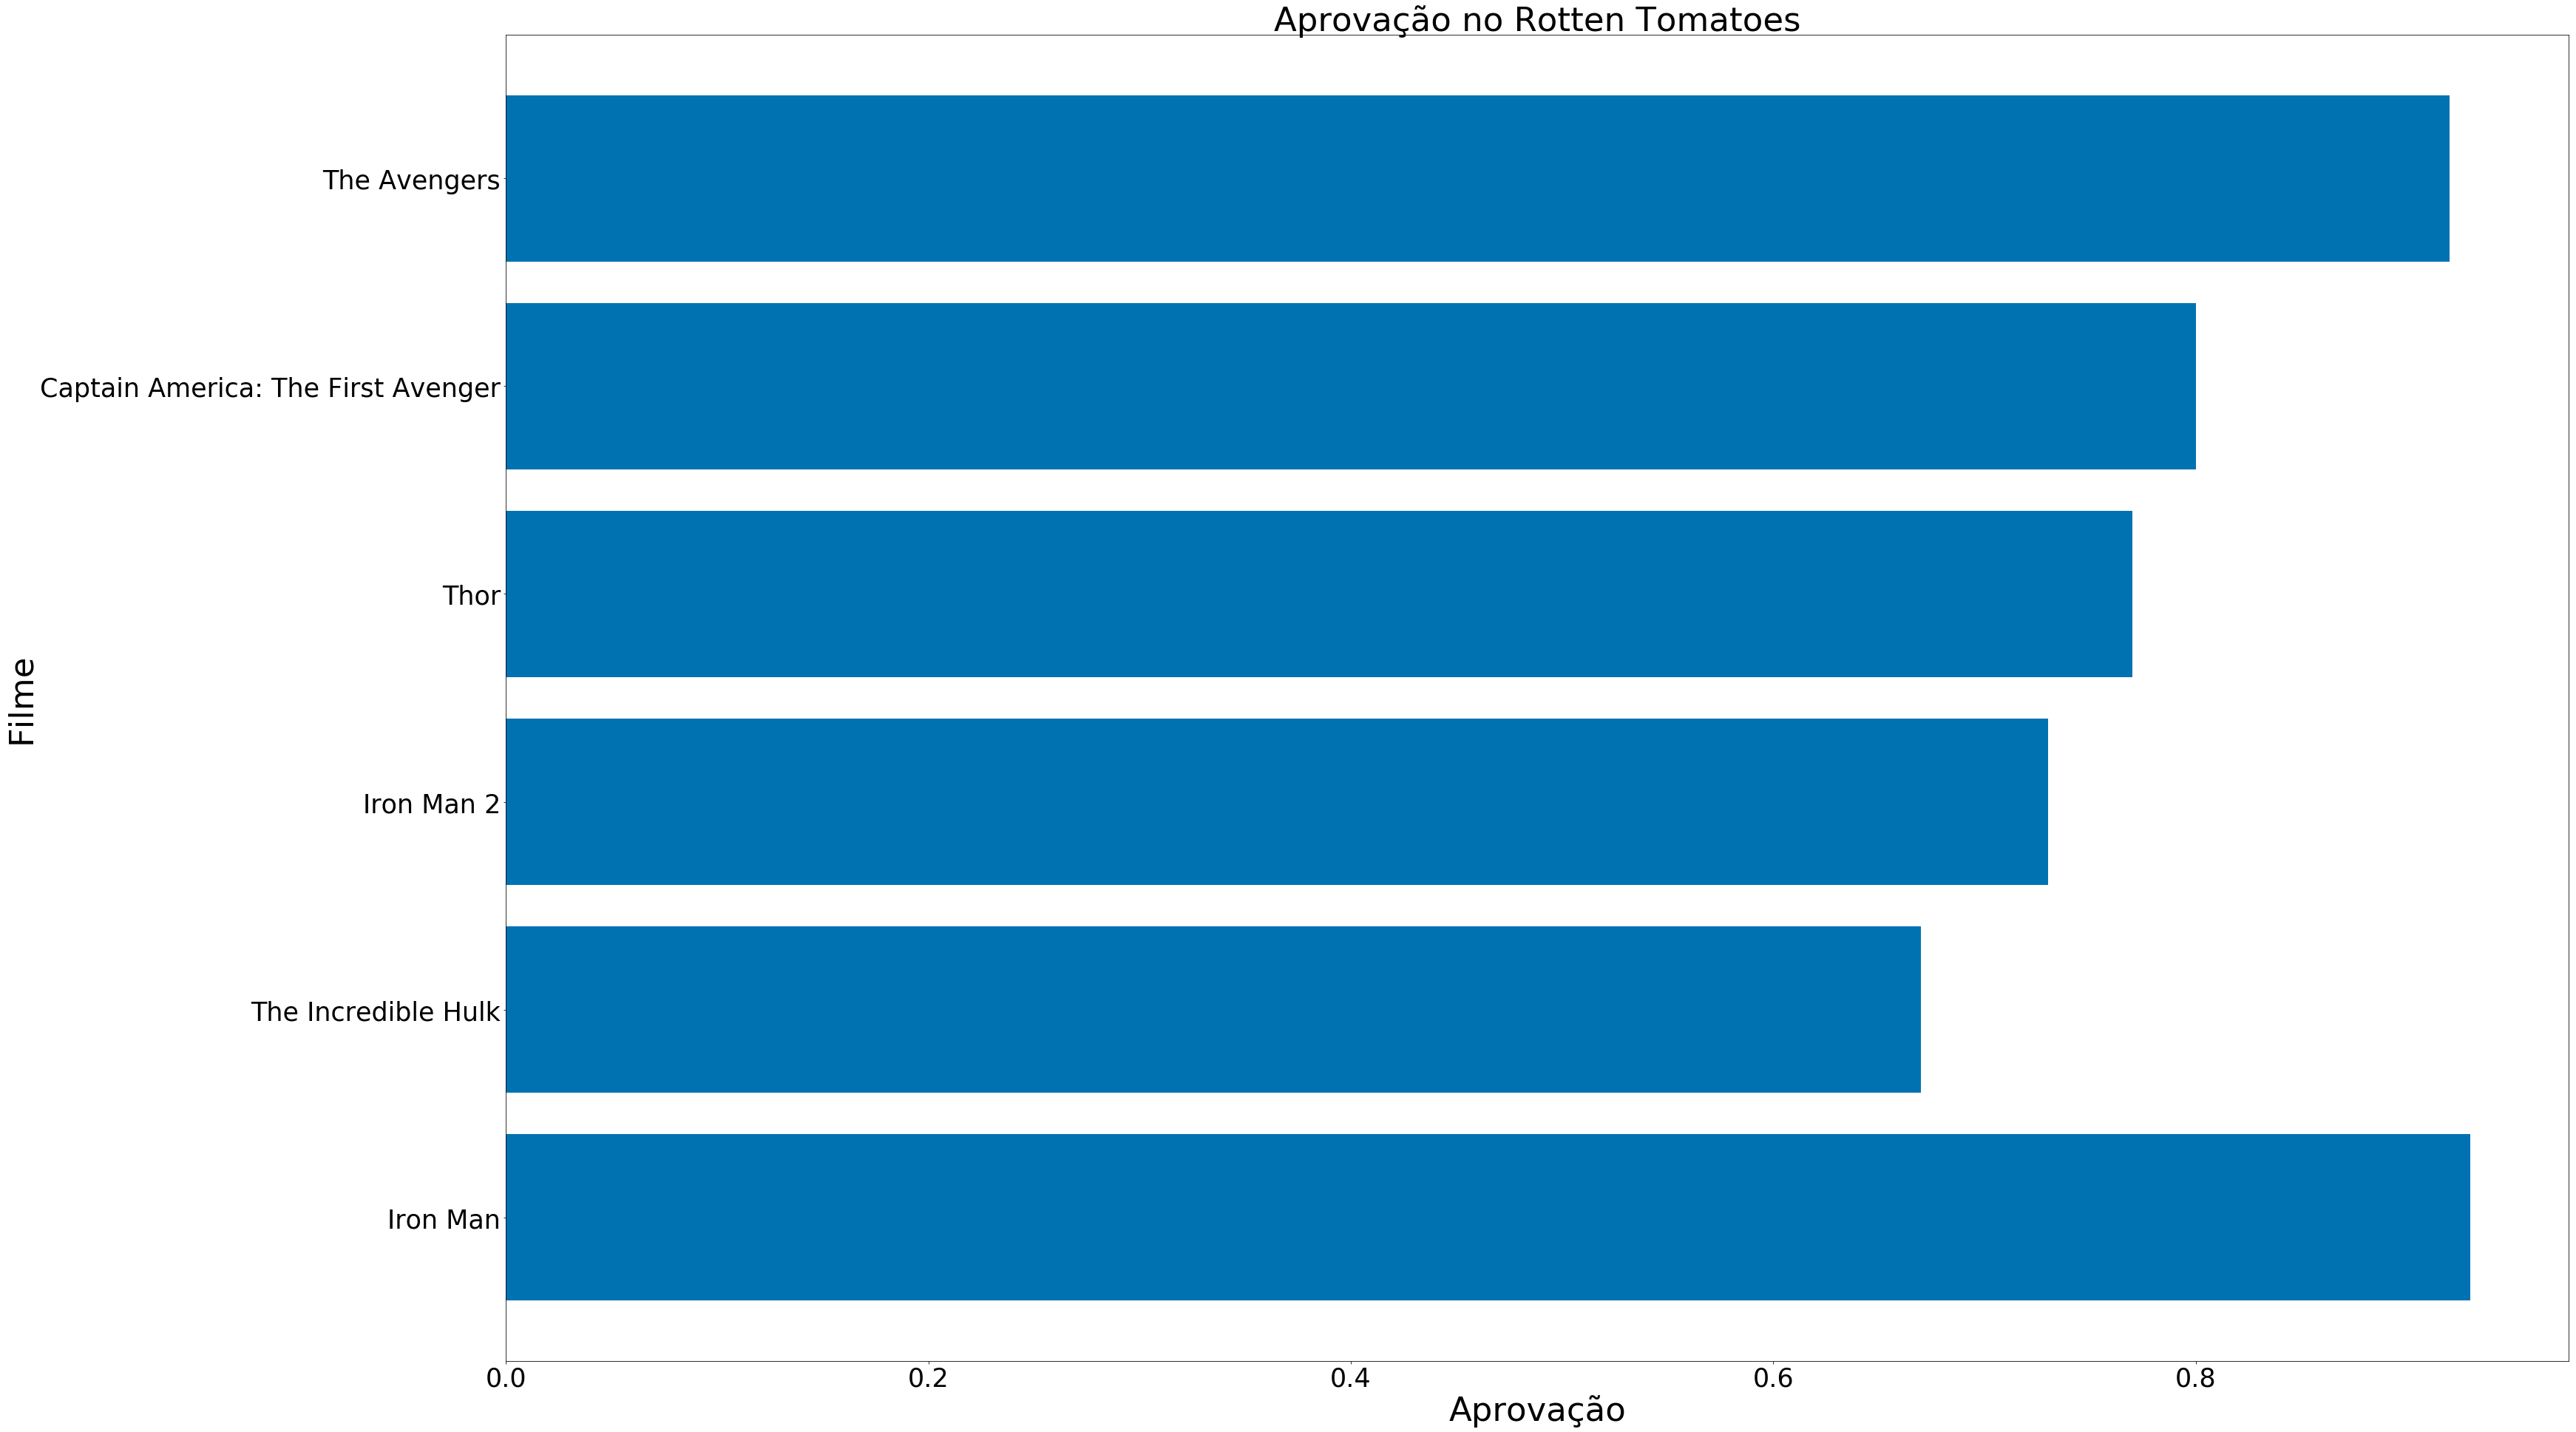

In [37]:
imdb1 = df[df['Phase']==1]['IMDb']
rotten1 = df[df['Phase']==1]['Rotten Tomatoes']

plt.barh(filmes1, rotten1)
plt.title('Aprovação no Rotten Tomatoes')
plt.xlabel("Aprovação")
plt.ylabel("Filme")
plt.show()

### Tempo de Tela dos Personagens


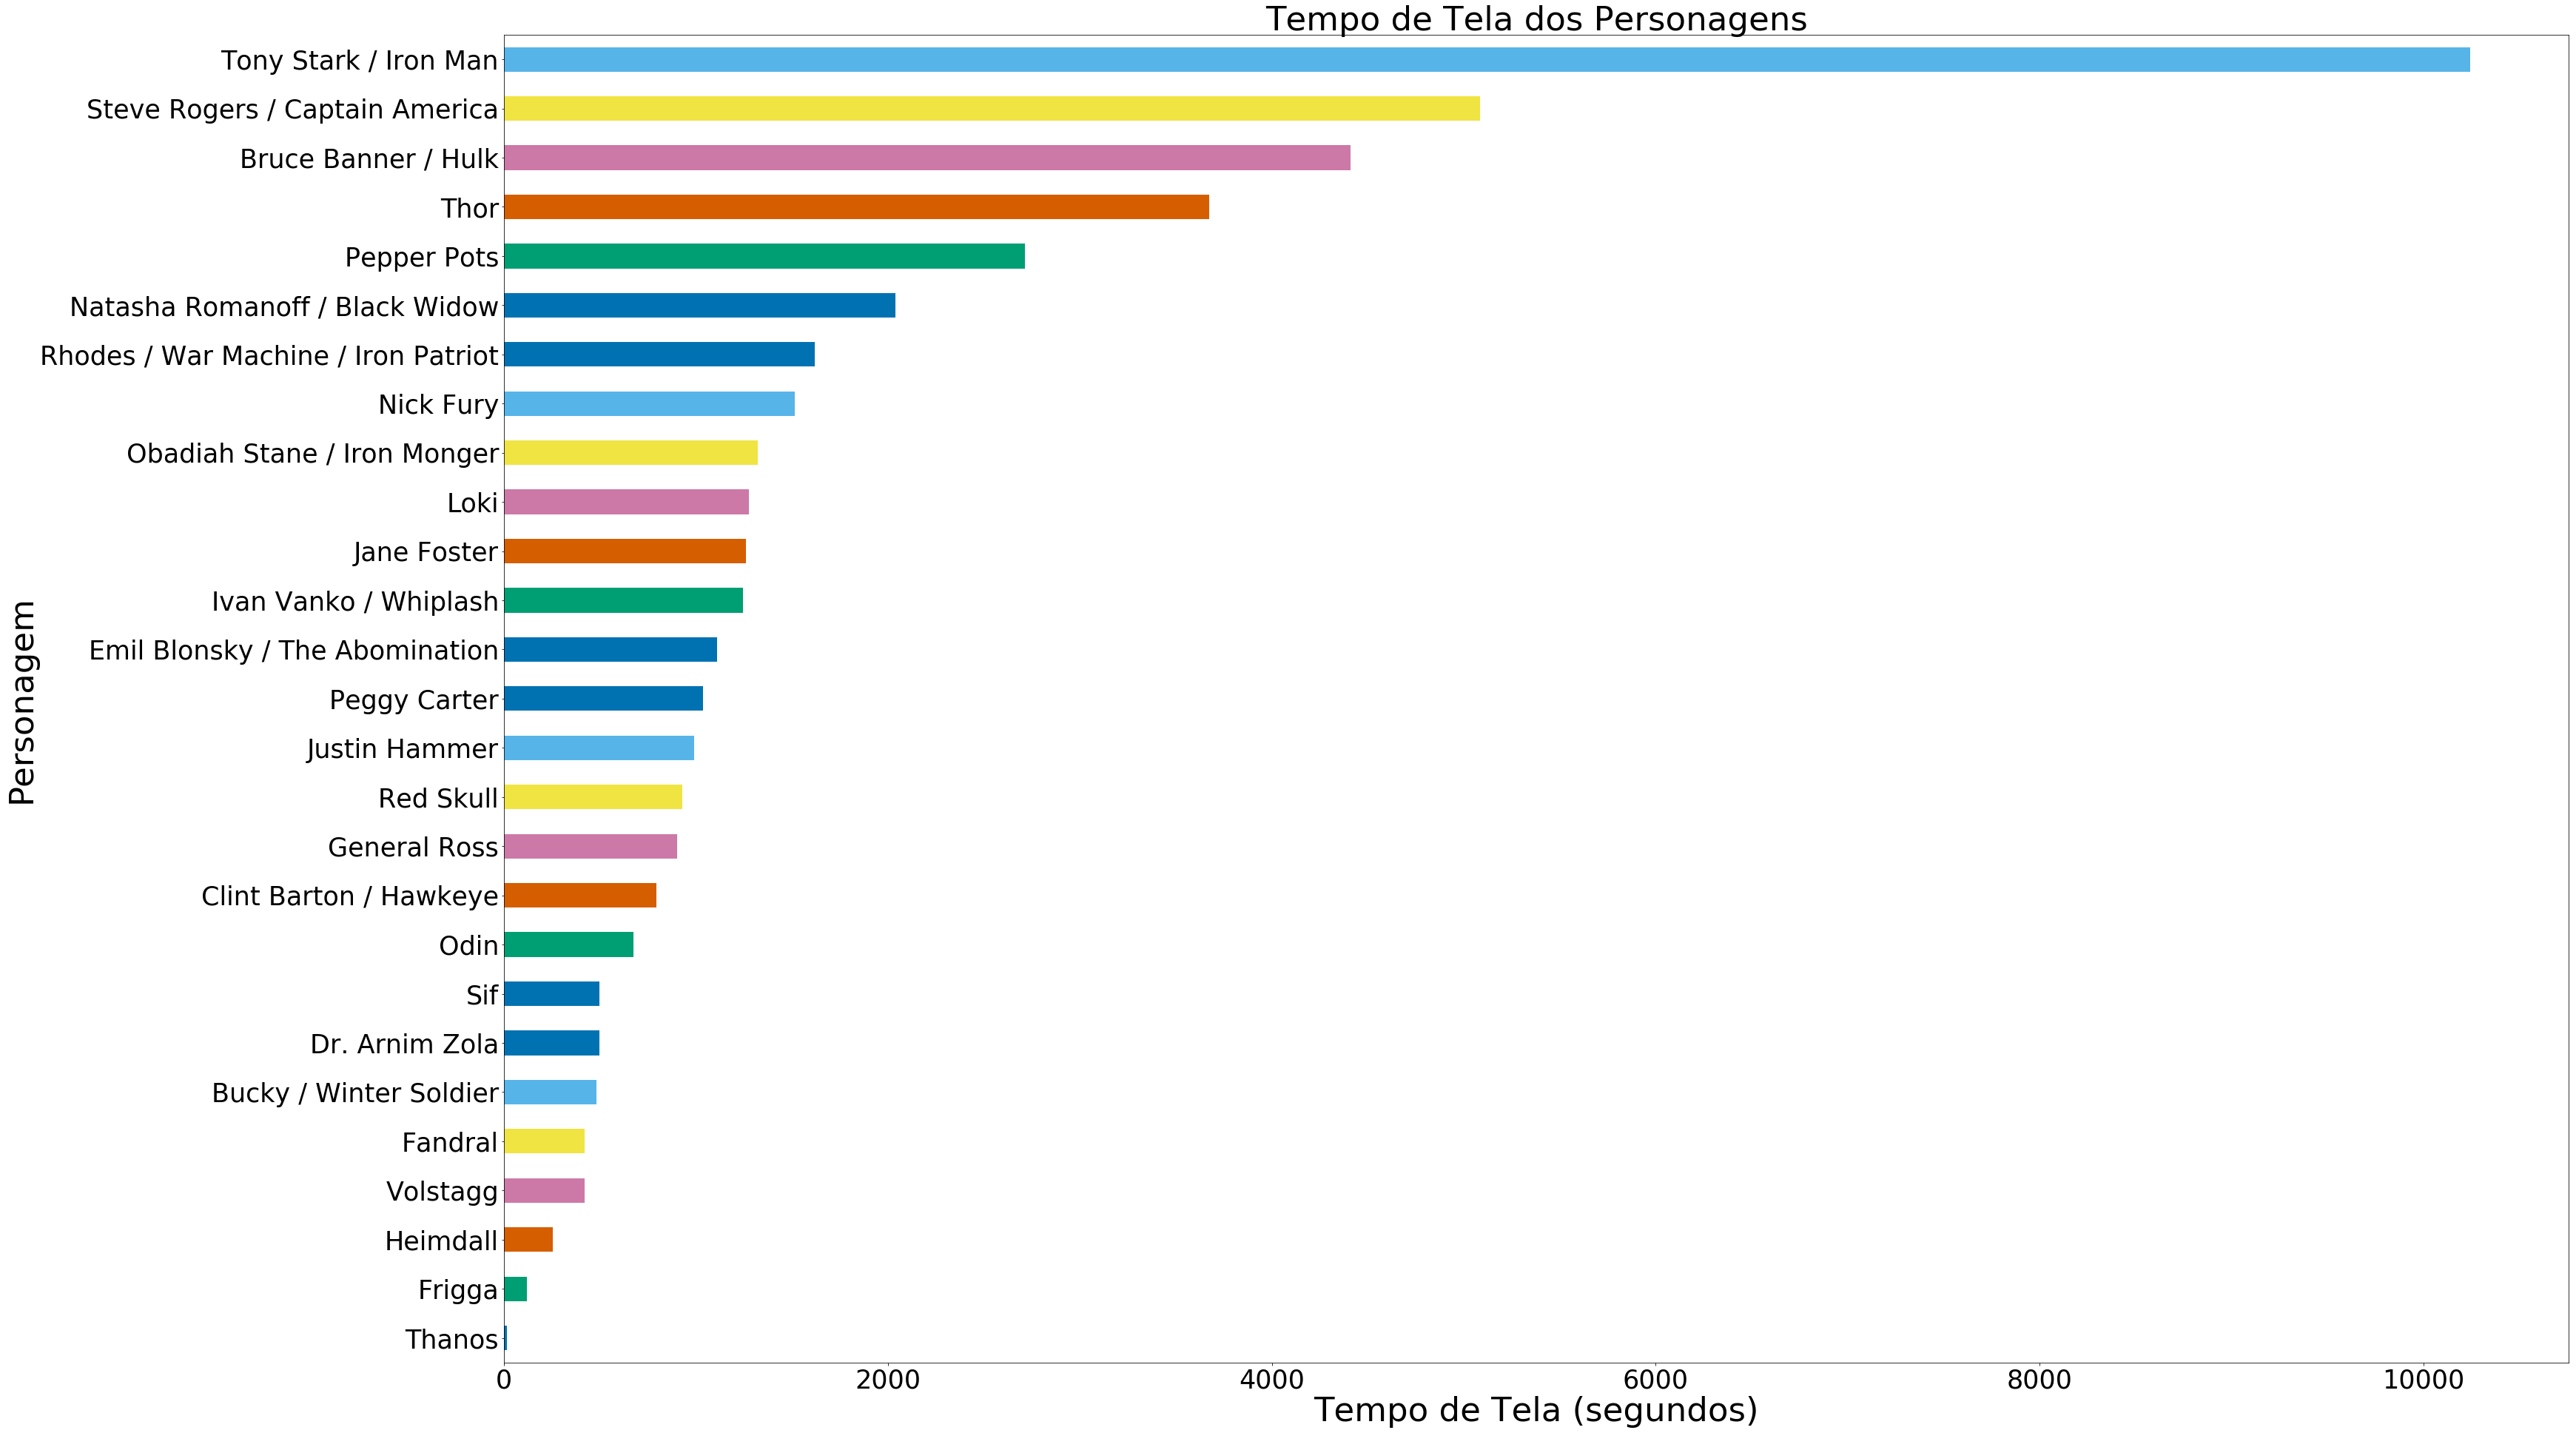

In [38]:
personagens1 = df[df['Phase']==1]
personagens1 = personagens1.loc[:, 'Tony Stark / Iron Man':'Hank Pym']

personagens1 = personagens1.loc[:, ~(personagens1 == 0).all()]

tempo = personagens1.sum().sort_values()

plt.title('Tempo de Tela dos Personagens')
plt.ylabel('Personagem')
plt.xlabel('Tempo de Tela (segundos)')
tempo.plot(kind='barh')

### Fase 2

A segunda fase concentra-se nas aventuras dos Vingadores e da S.H.I.E.L.D. após a batalha de Nova York, e também apresenta mais heróis, incluindo o Falcão, Mercúrio, Feiticeira Escarlate, Visão, Homem-Formiga e os Guardiões da Galáxia. Além disso, são mostrados mais detalhes sobre as jóias do Infinito. Em "Capitão América: O Soldado Invernal", o grupo terrorista HYDRA está operando dentro da S.H.I.E.L.D., resultando no colapso da agência. Agora atuando sem a ajuda da mesma, os Vingadores trabalham sozinhos para derrubar a organização terrorista, mas involuntariamente criam um adversário mais perigoso na forma da inteligência artificial hostil, Ultron.

### Bilheteria

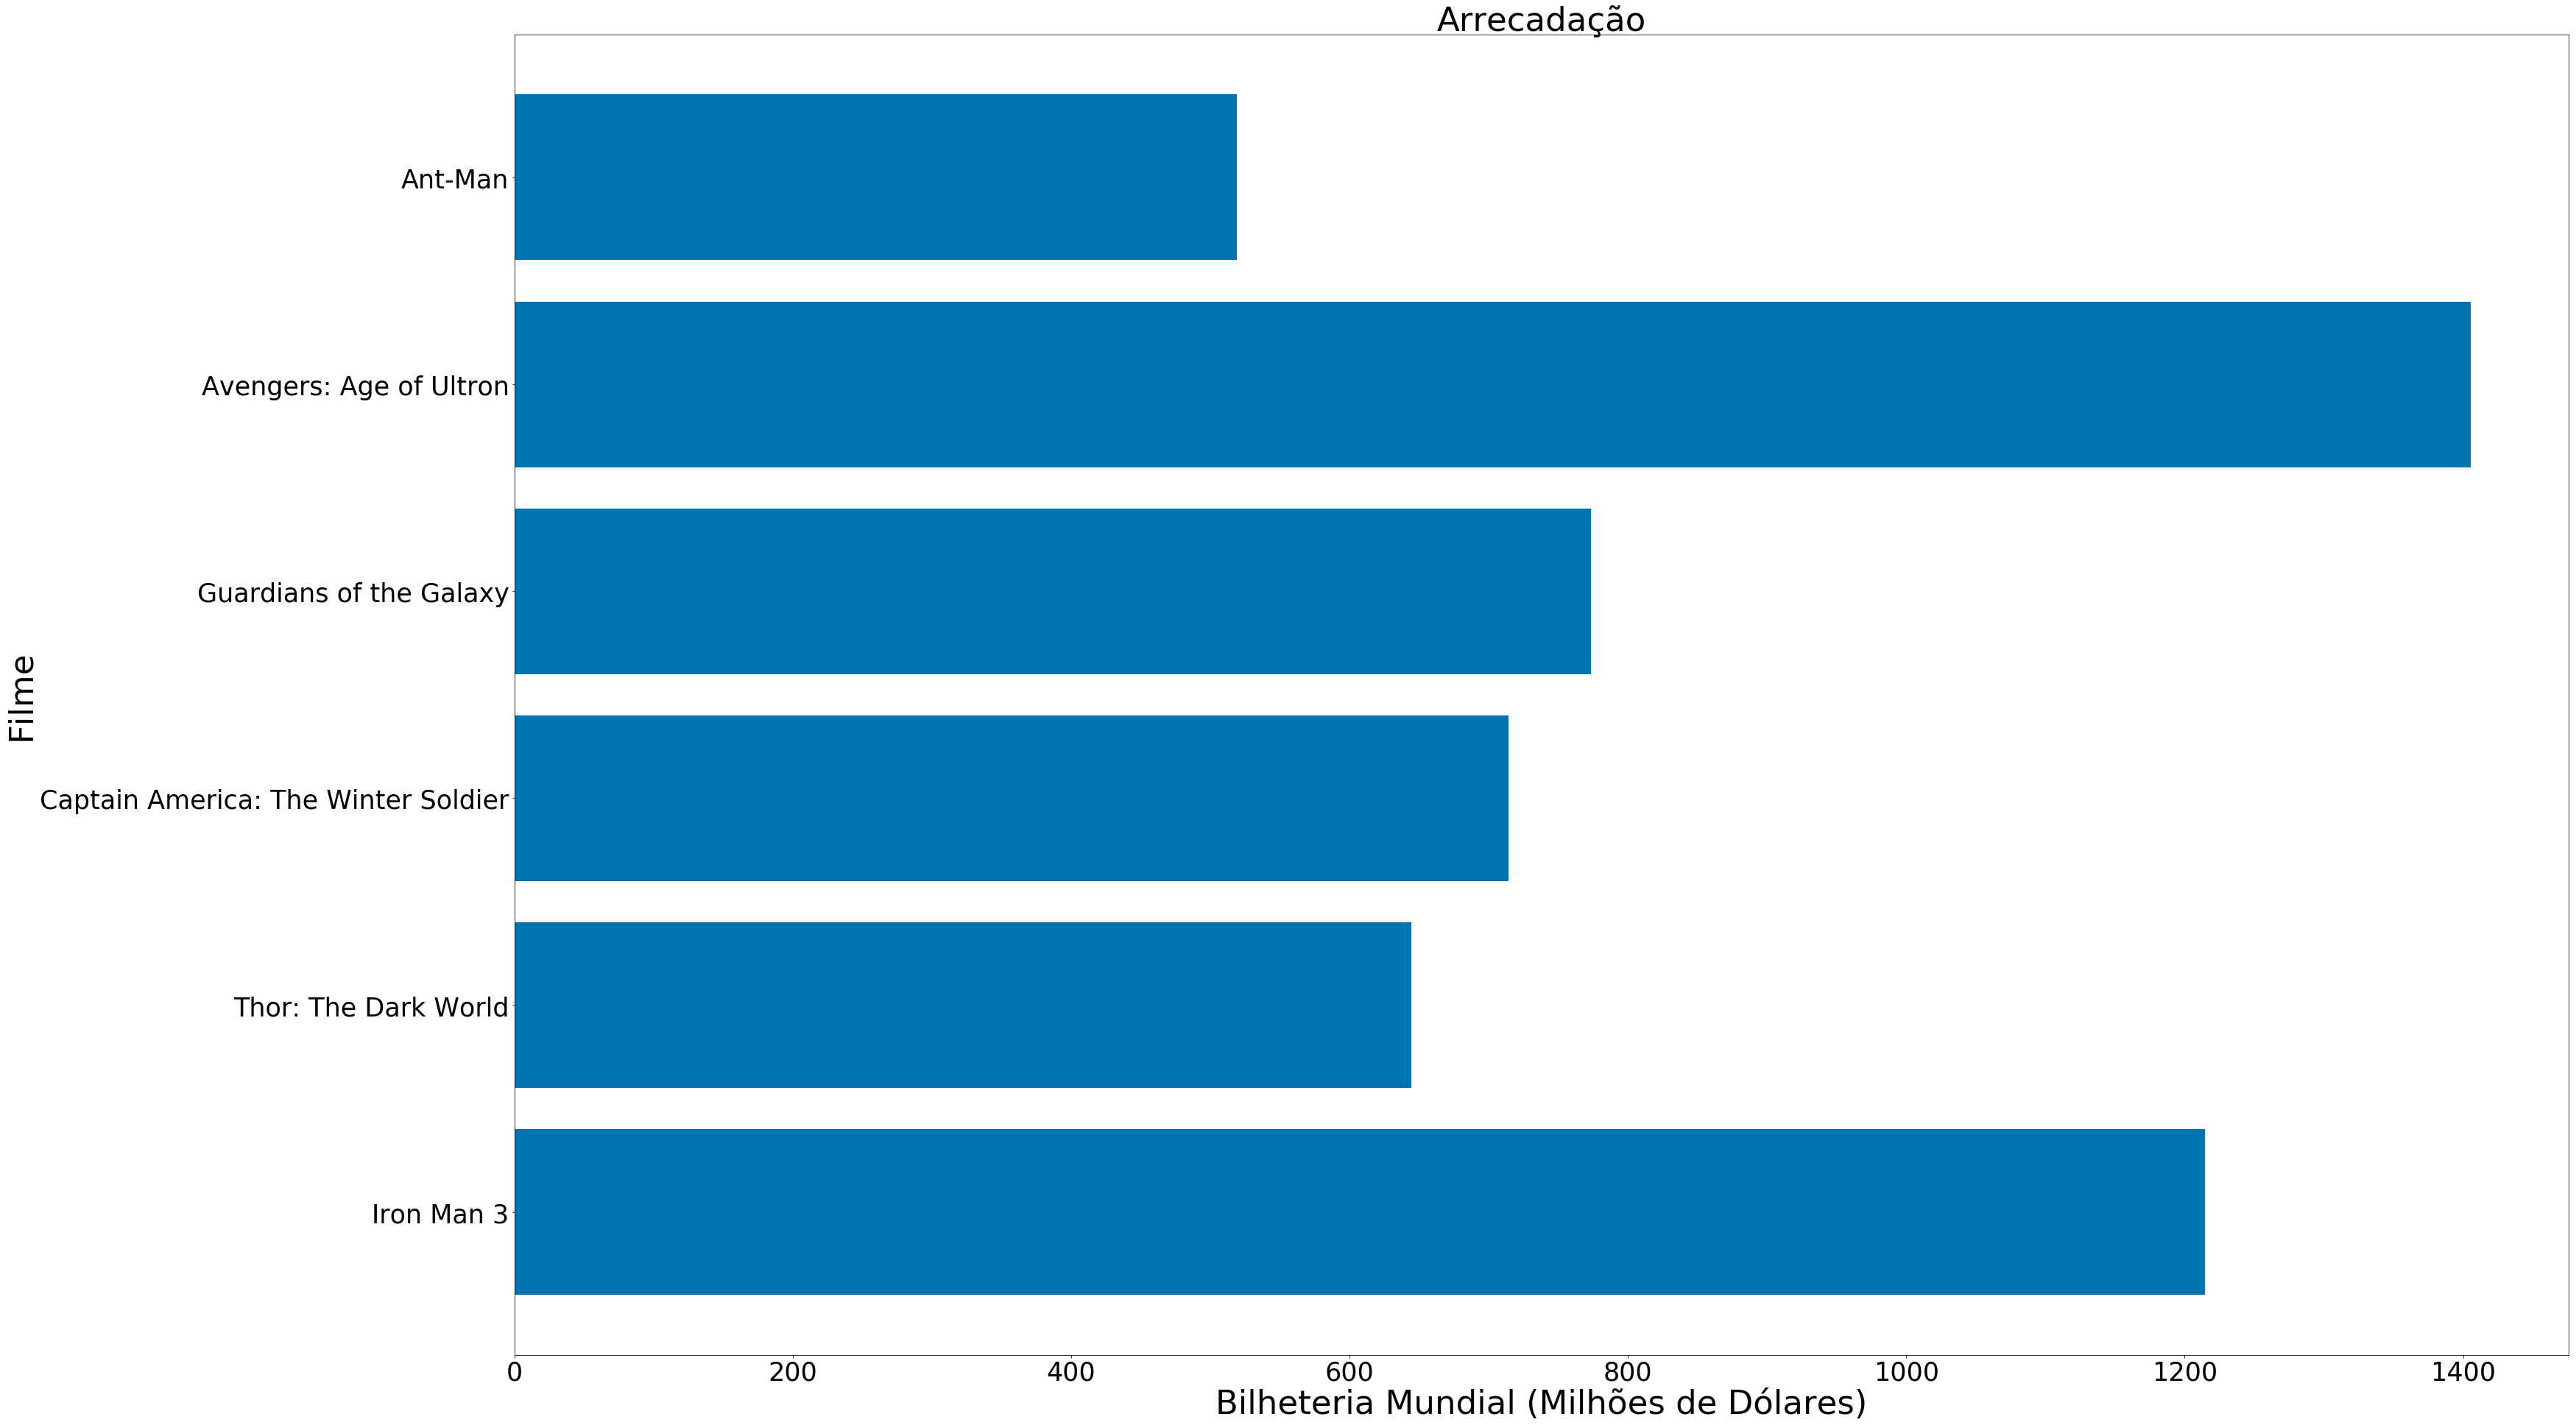

In [39]:
filmes2 = df[df['Phase']==2]['Movies']
bilheteria2 = df[df['Phase']==2]['Gross Worldwide']

plt.title('Arrecadação')
plt.xlabel("Bilheteria Mundial (Milhões de Dólares)")
plt.ylabel("Filme")
plt.barh(filmes2, bilheteria2)
plt.show()

### Crítica

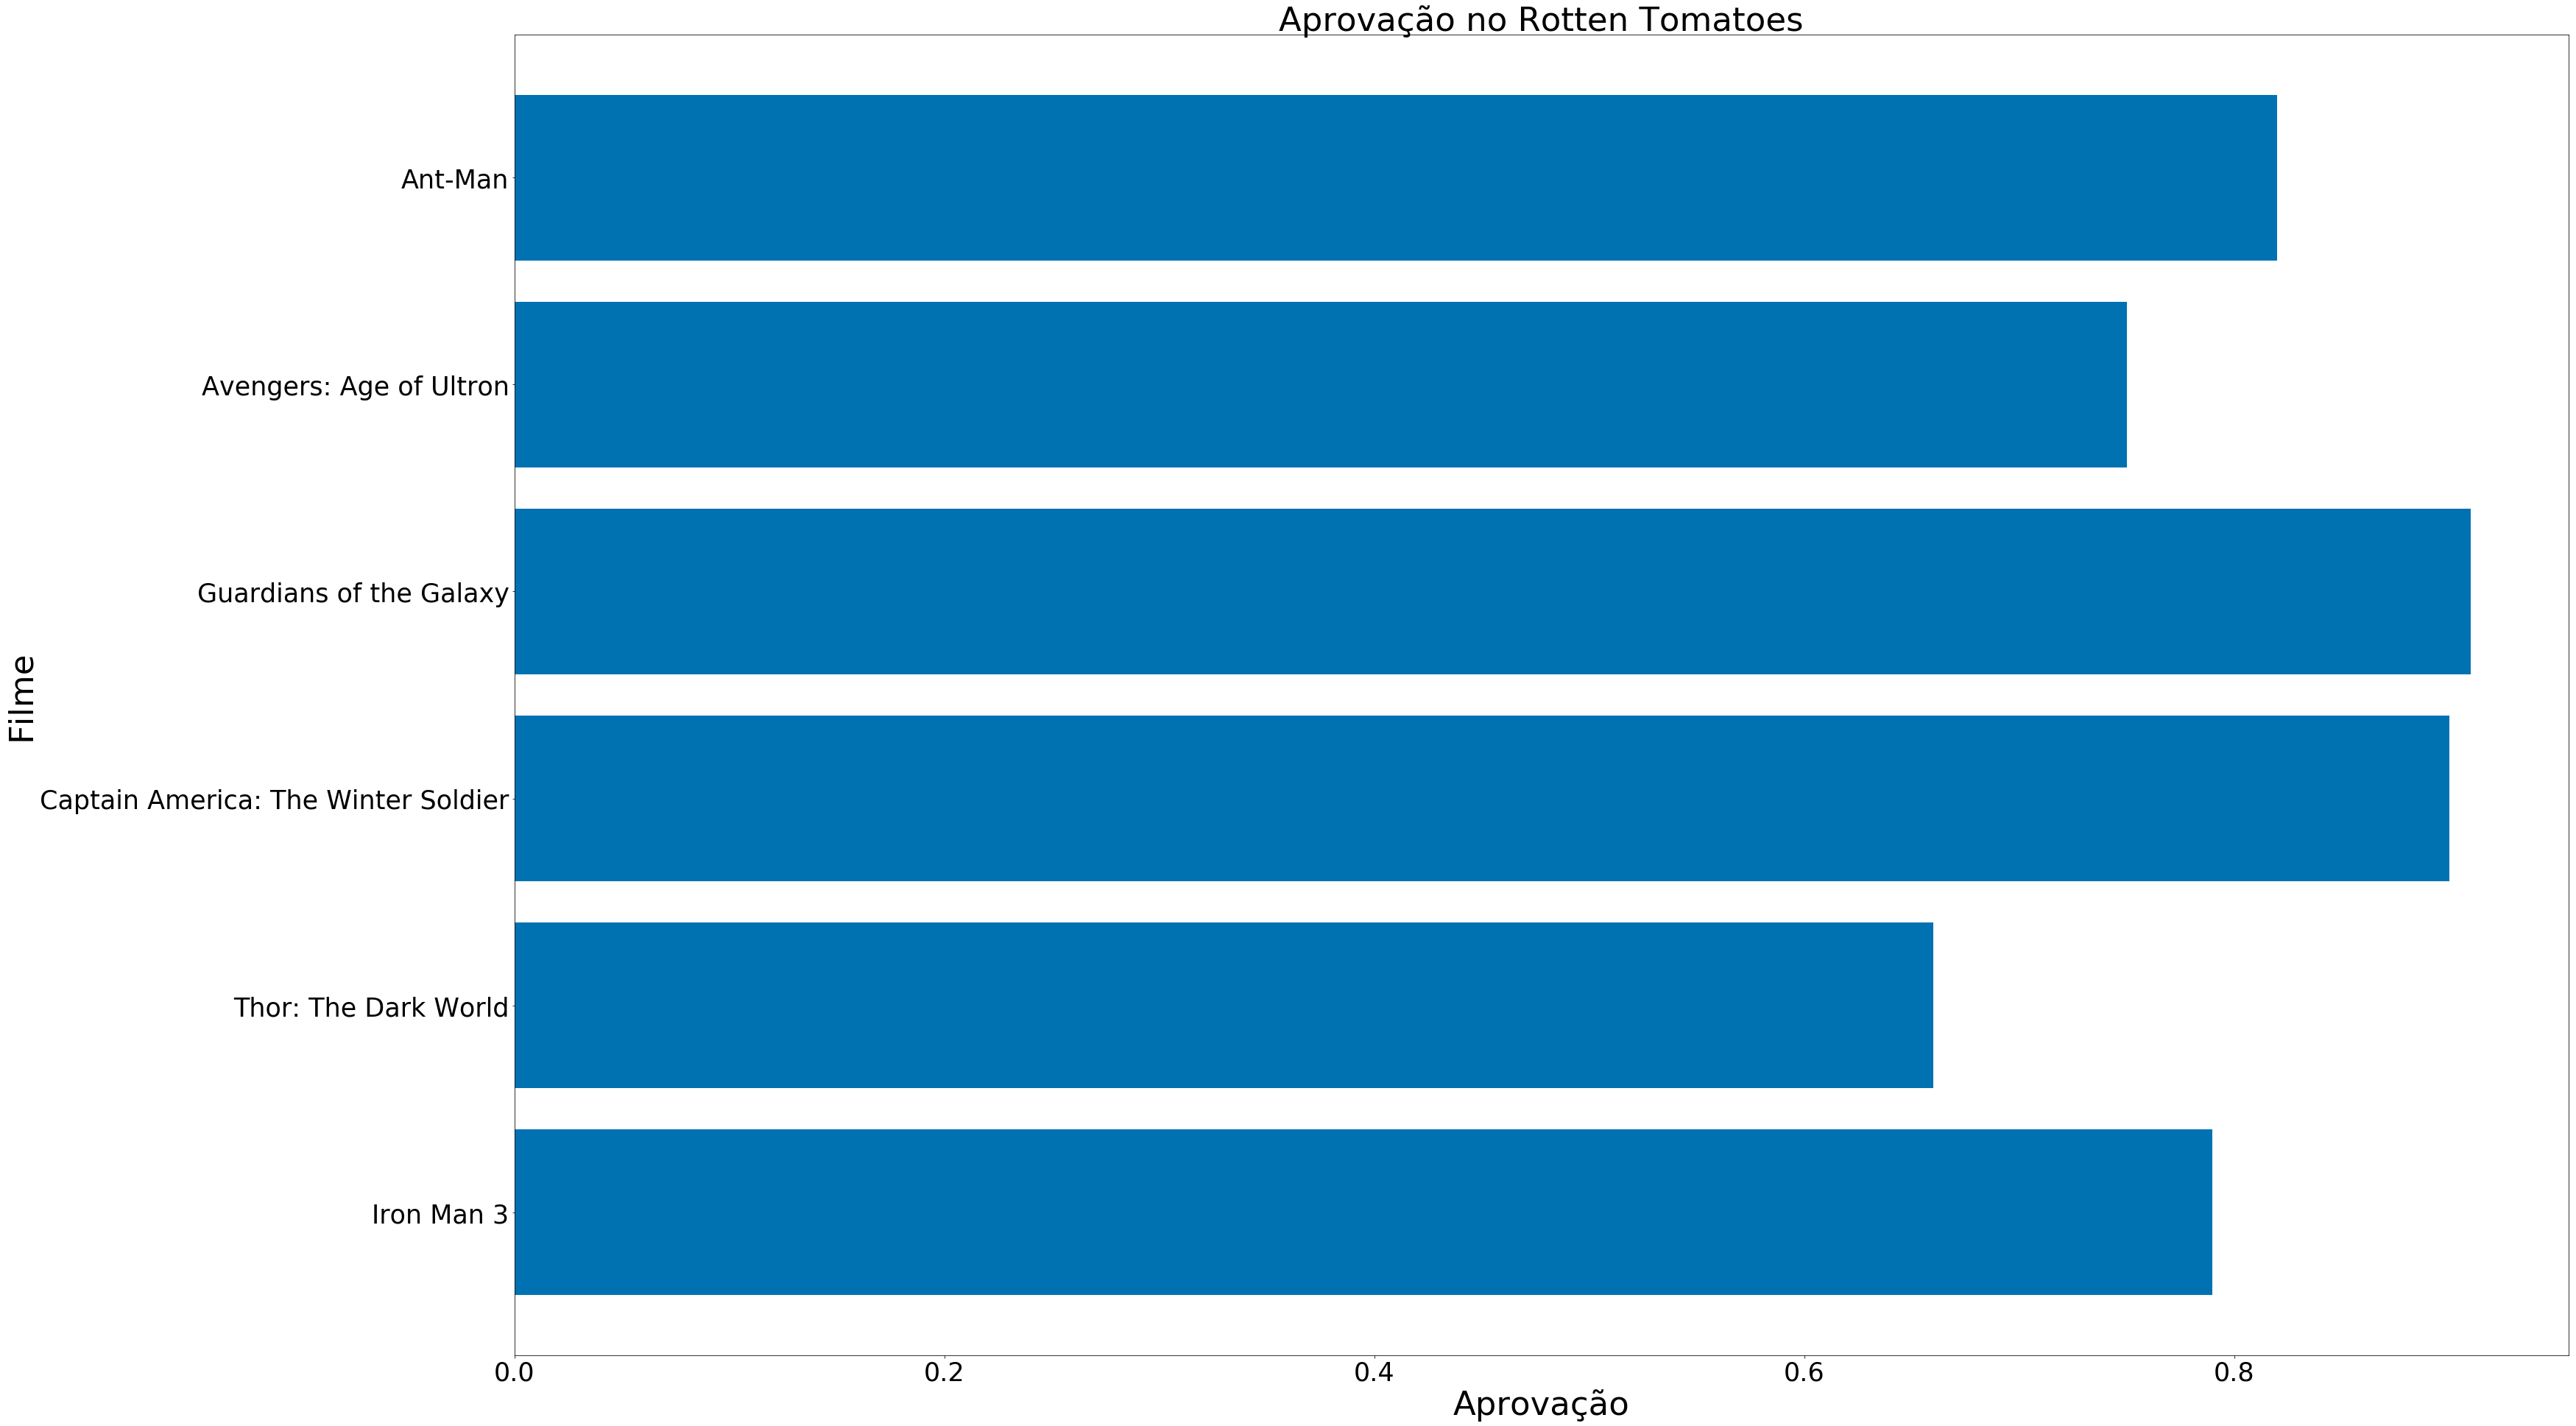

In [40]:
imdb2 = df[df['Phase']==2]['IMDb']
rotten2 = df[df['Phase']==2]['Rotten Tomatoes']

plt.barh(filmes2, rotten2)
plt.title('Aprovação no Rotten Tomatoes')
plt.xlabel("Aprovação")
plt.ylabel("Filme")
plt.show()

### Tempo de tela de cada personagem

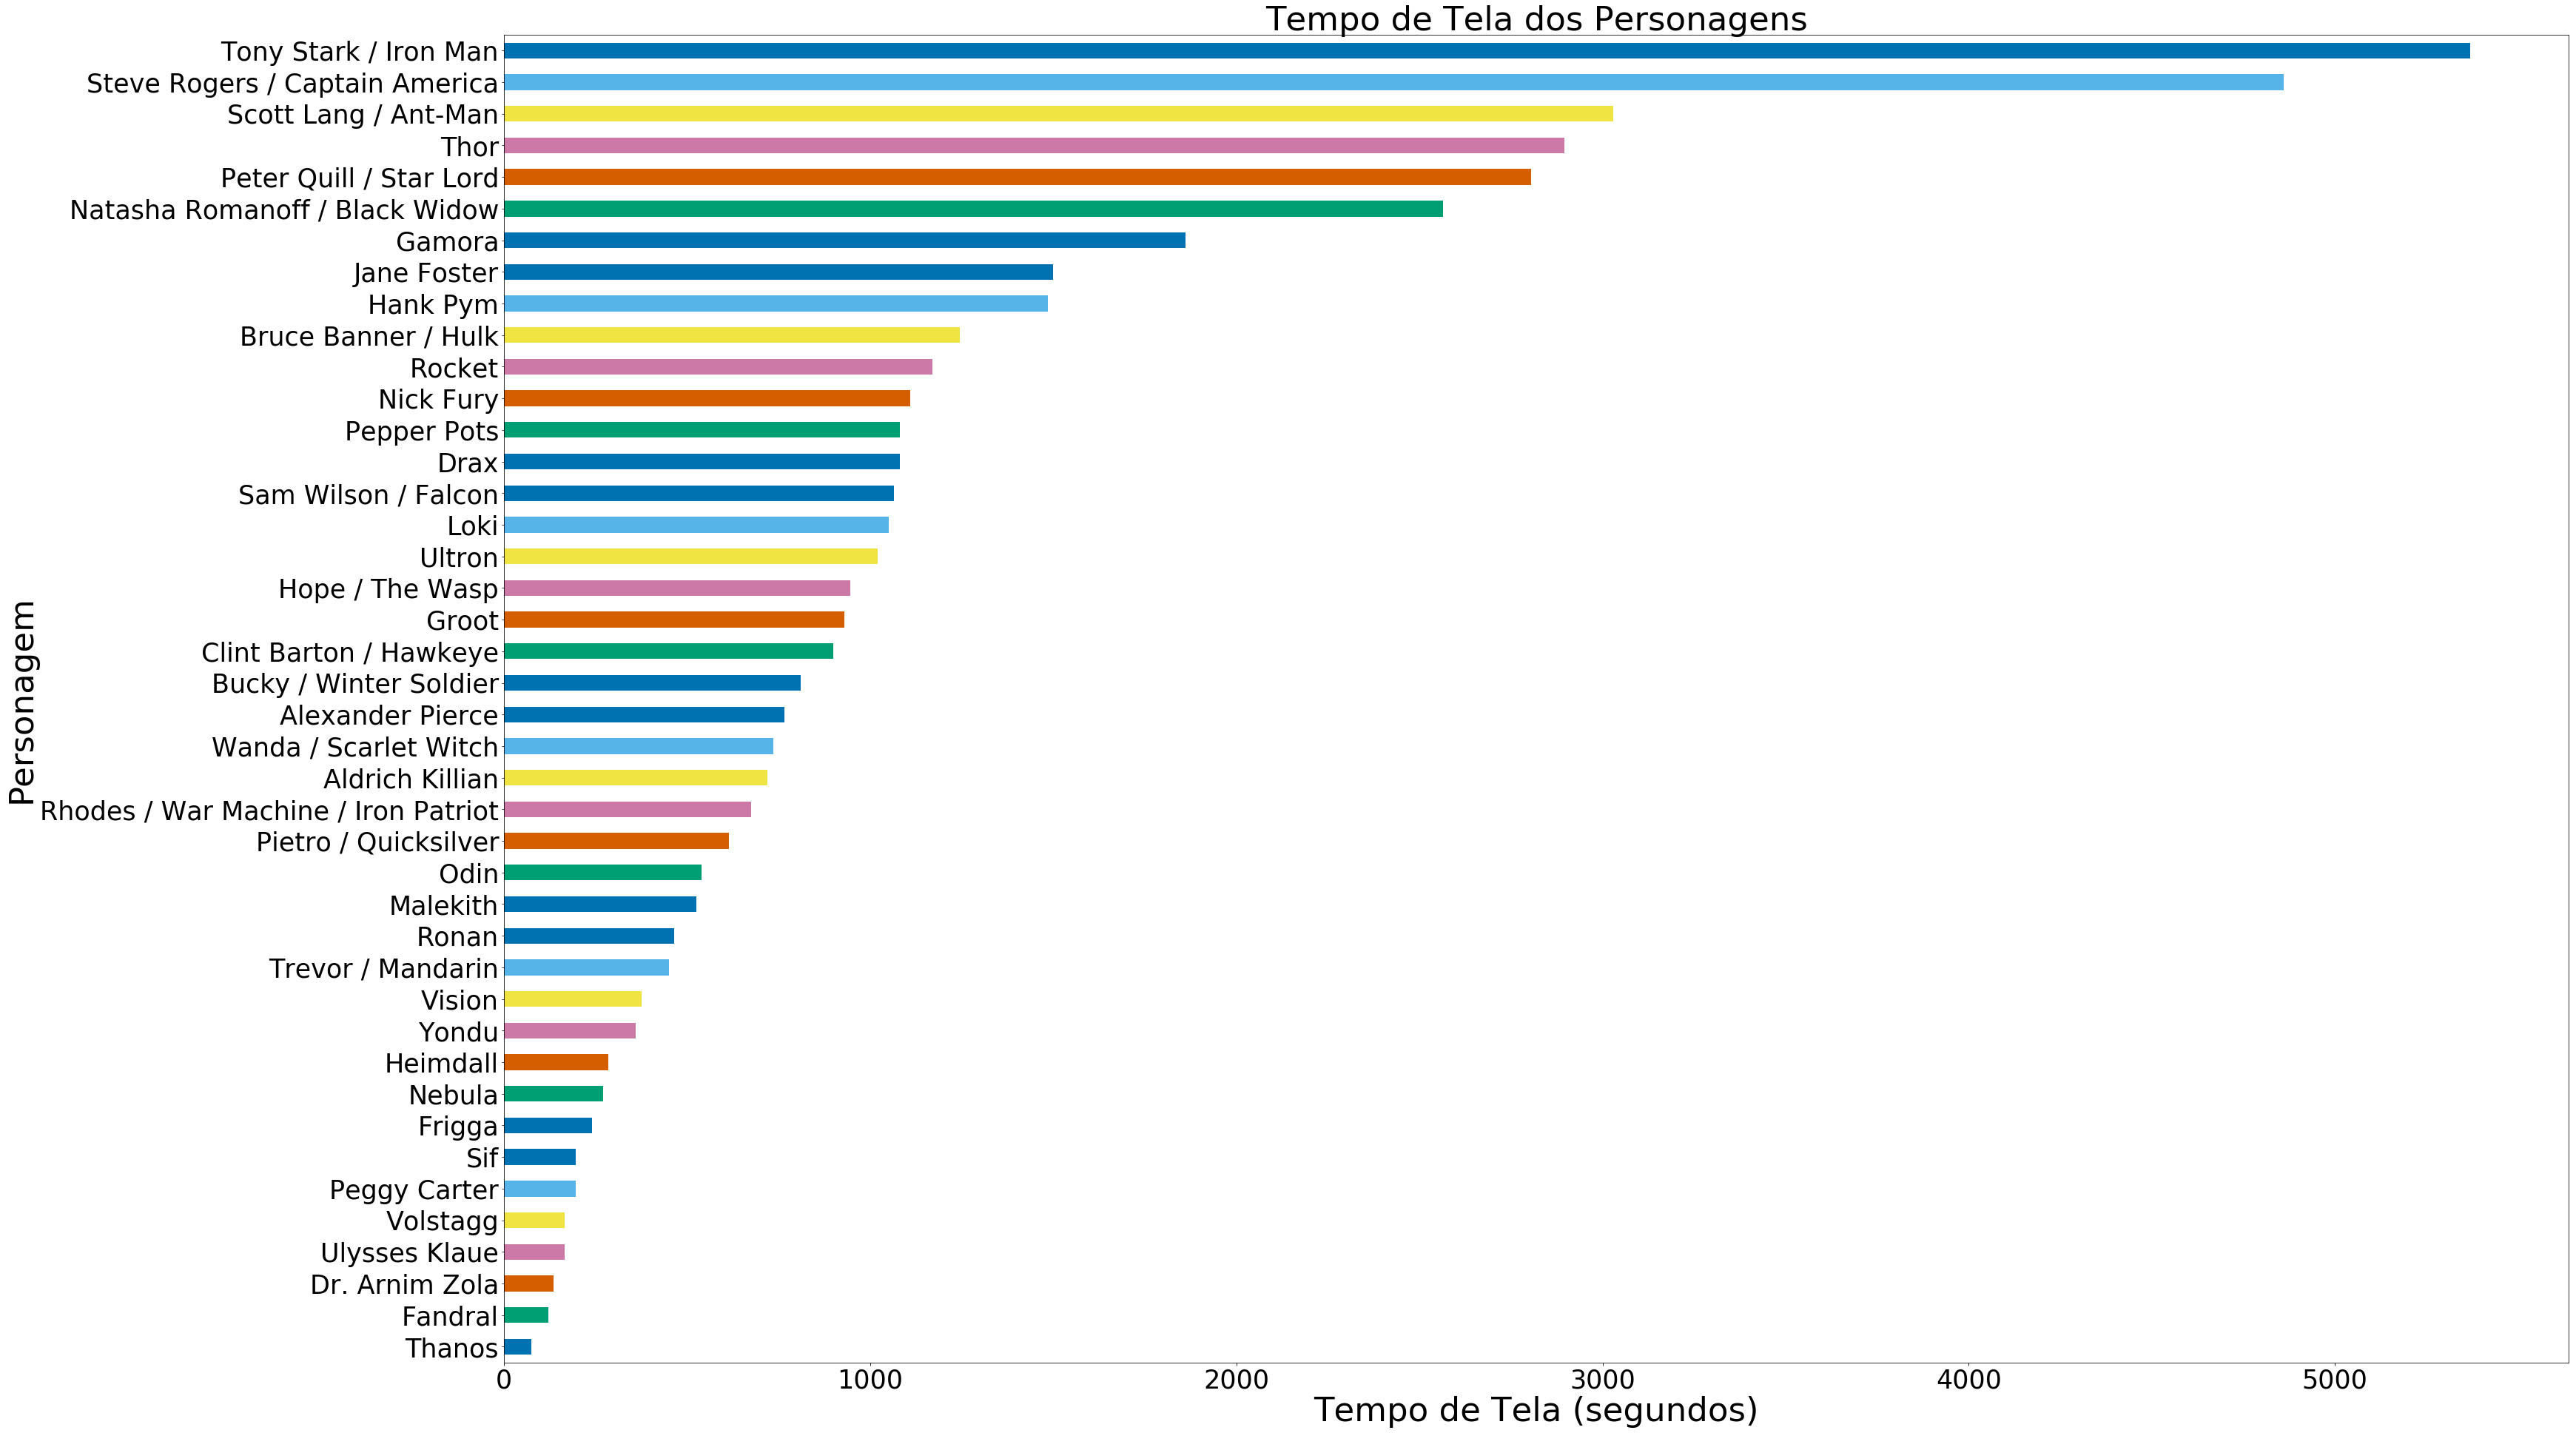

In [41]:
personagens2 = df[df['Phase']==2]
personagens2 = personagens2.loc[:, 'Tony Stark / Iron Man':'Hank Pym']

personagens2 = personagens2.loc[:, ~(personagens2 == 0).all()]

tempo = personagens2.sum().sort_values()

plt.title('Tempo de Tela dos Personagens')
plt.ylabel('Personagem')
plt.xlabel('Tempo de Tela (segundos)')
tempo.plot(kind='barh')

### Fase 3
A Fase 3 é ambientada em um clima de discórdia gerado a partir do ataque de Ultron contra a Terra. Com a opinião pública se dividindo cada vez mais sobre os super-heróis, os Vingadores se separam. No meio dos conflitos, vários personagens são introduzidos: Doutor Estranho, Pantera Negra, Mantis, Homem Aranha e Capitã Marvel. A grande trama de Thanos para coletar as jóias do Infinito, iniciada na Fase 1, é encerrada aqui

### Bilheteria 

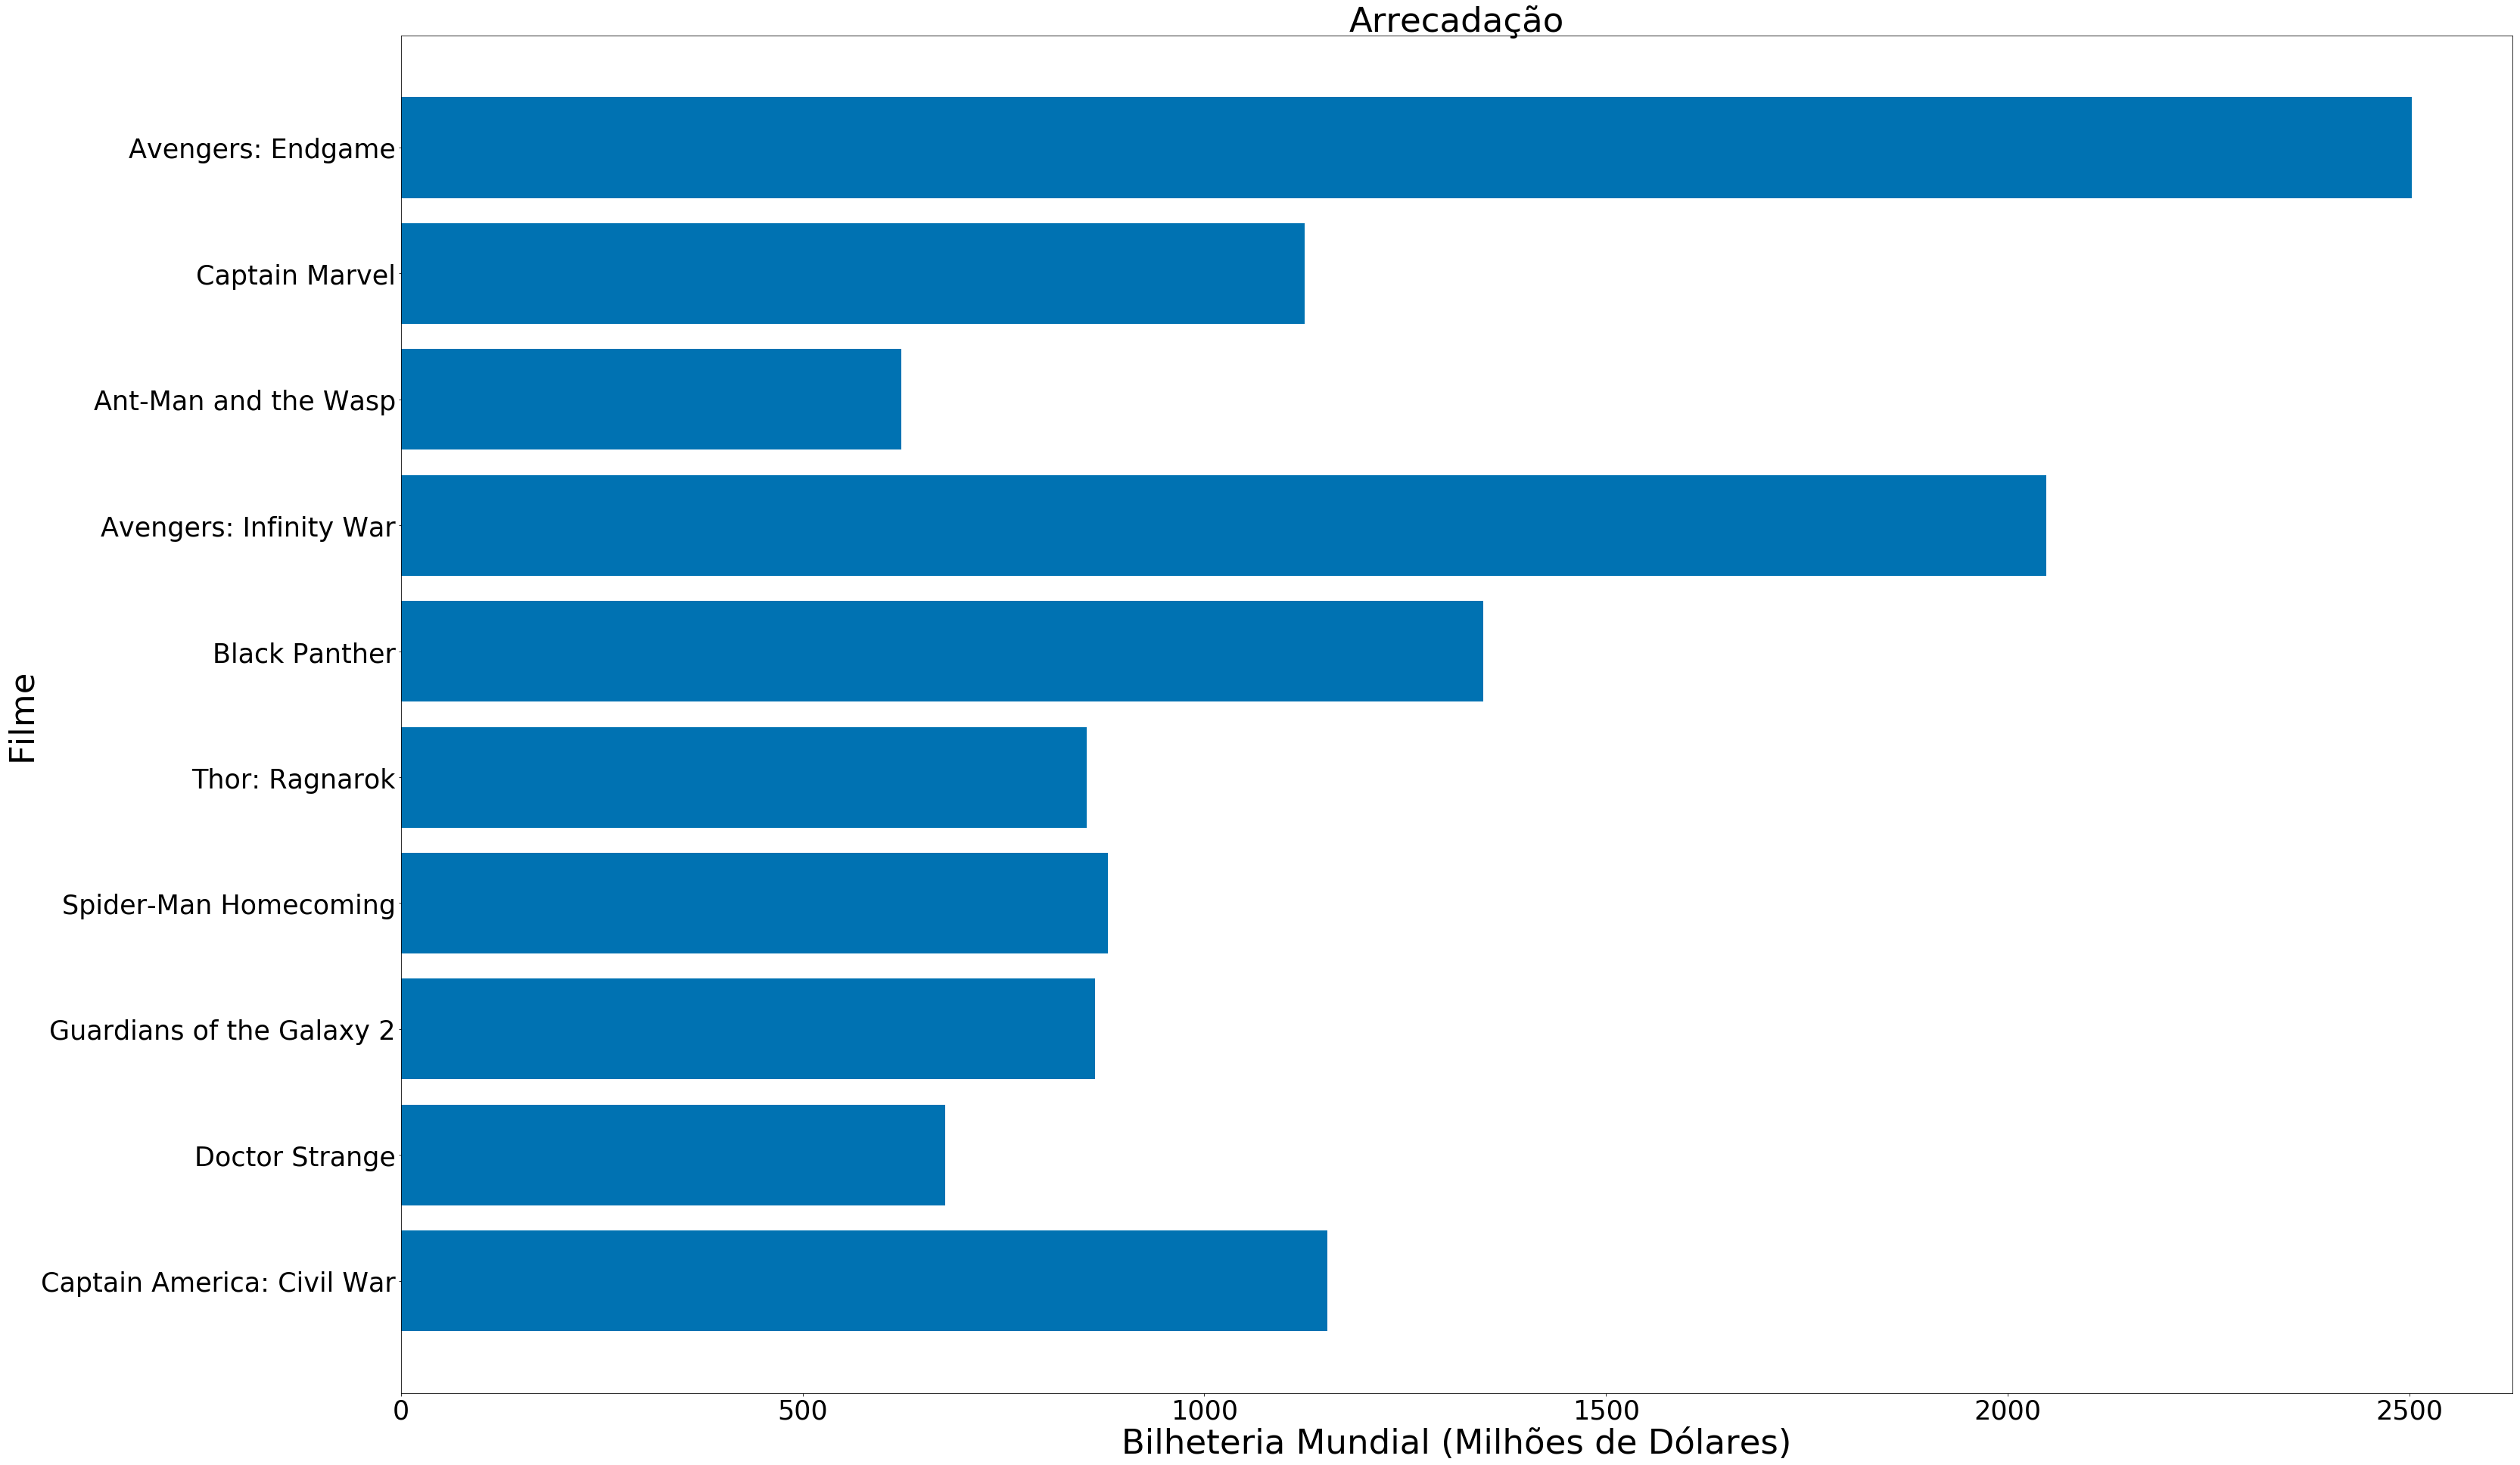

In [42]:
filmes3 = df[df['Phase']==3]['Movies']
bilheteria3 = df[df['Phase']==3]['Gross Worldwide']

plt.title('Arrecadação')
plt.xlabel("Bilheteria Mundial (Milhões de Dólares)")
plt.ylabel("Filme")
plt.barh(filmes3, bilheteria3)
plt.show()

### Crítica

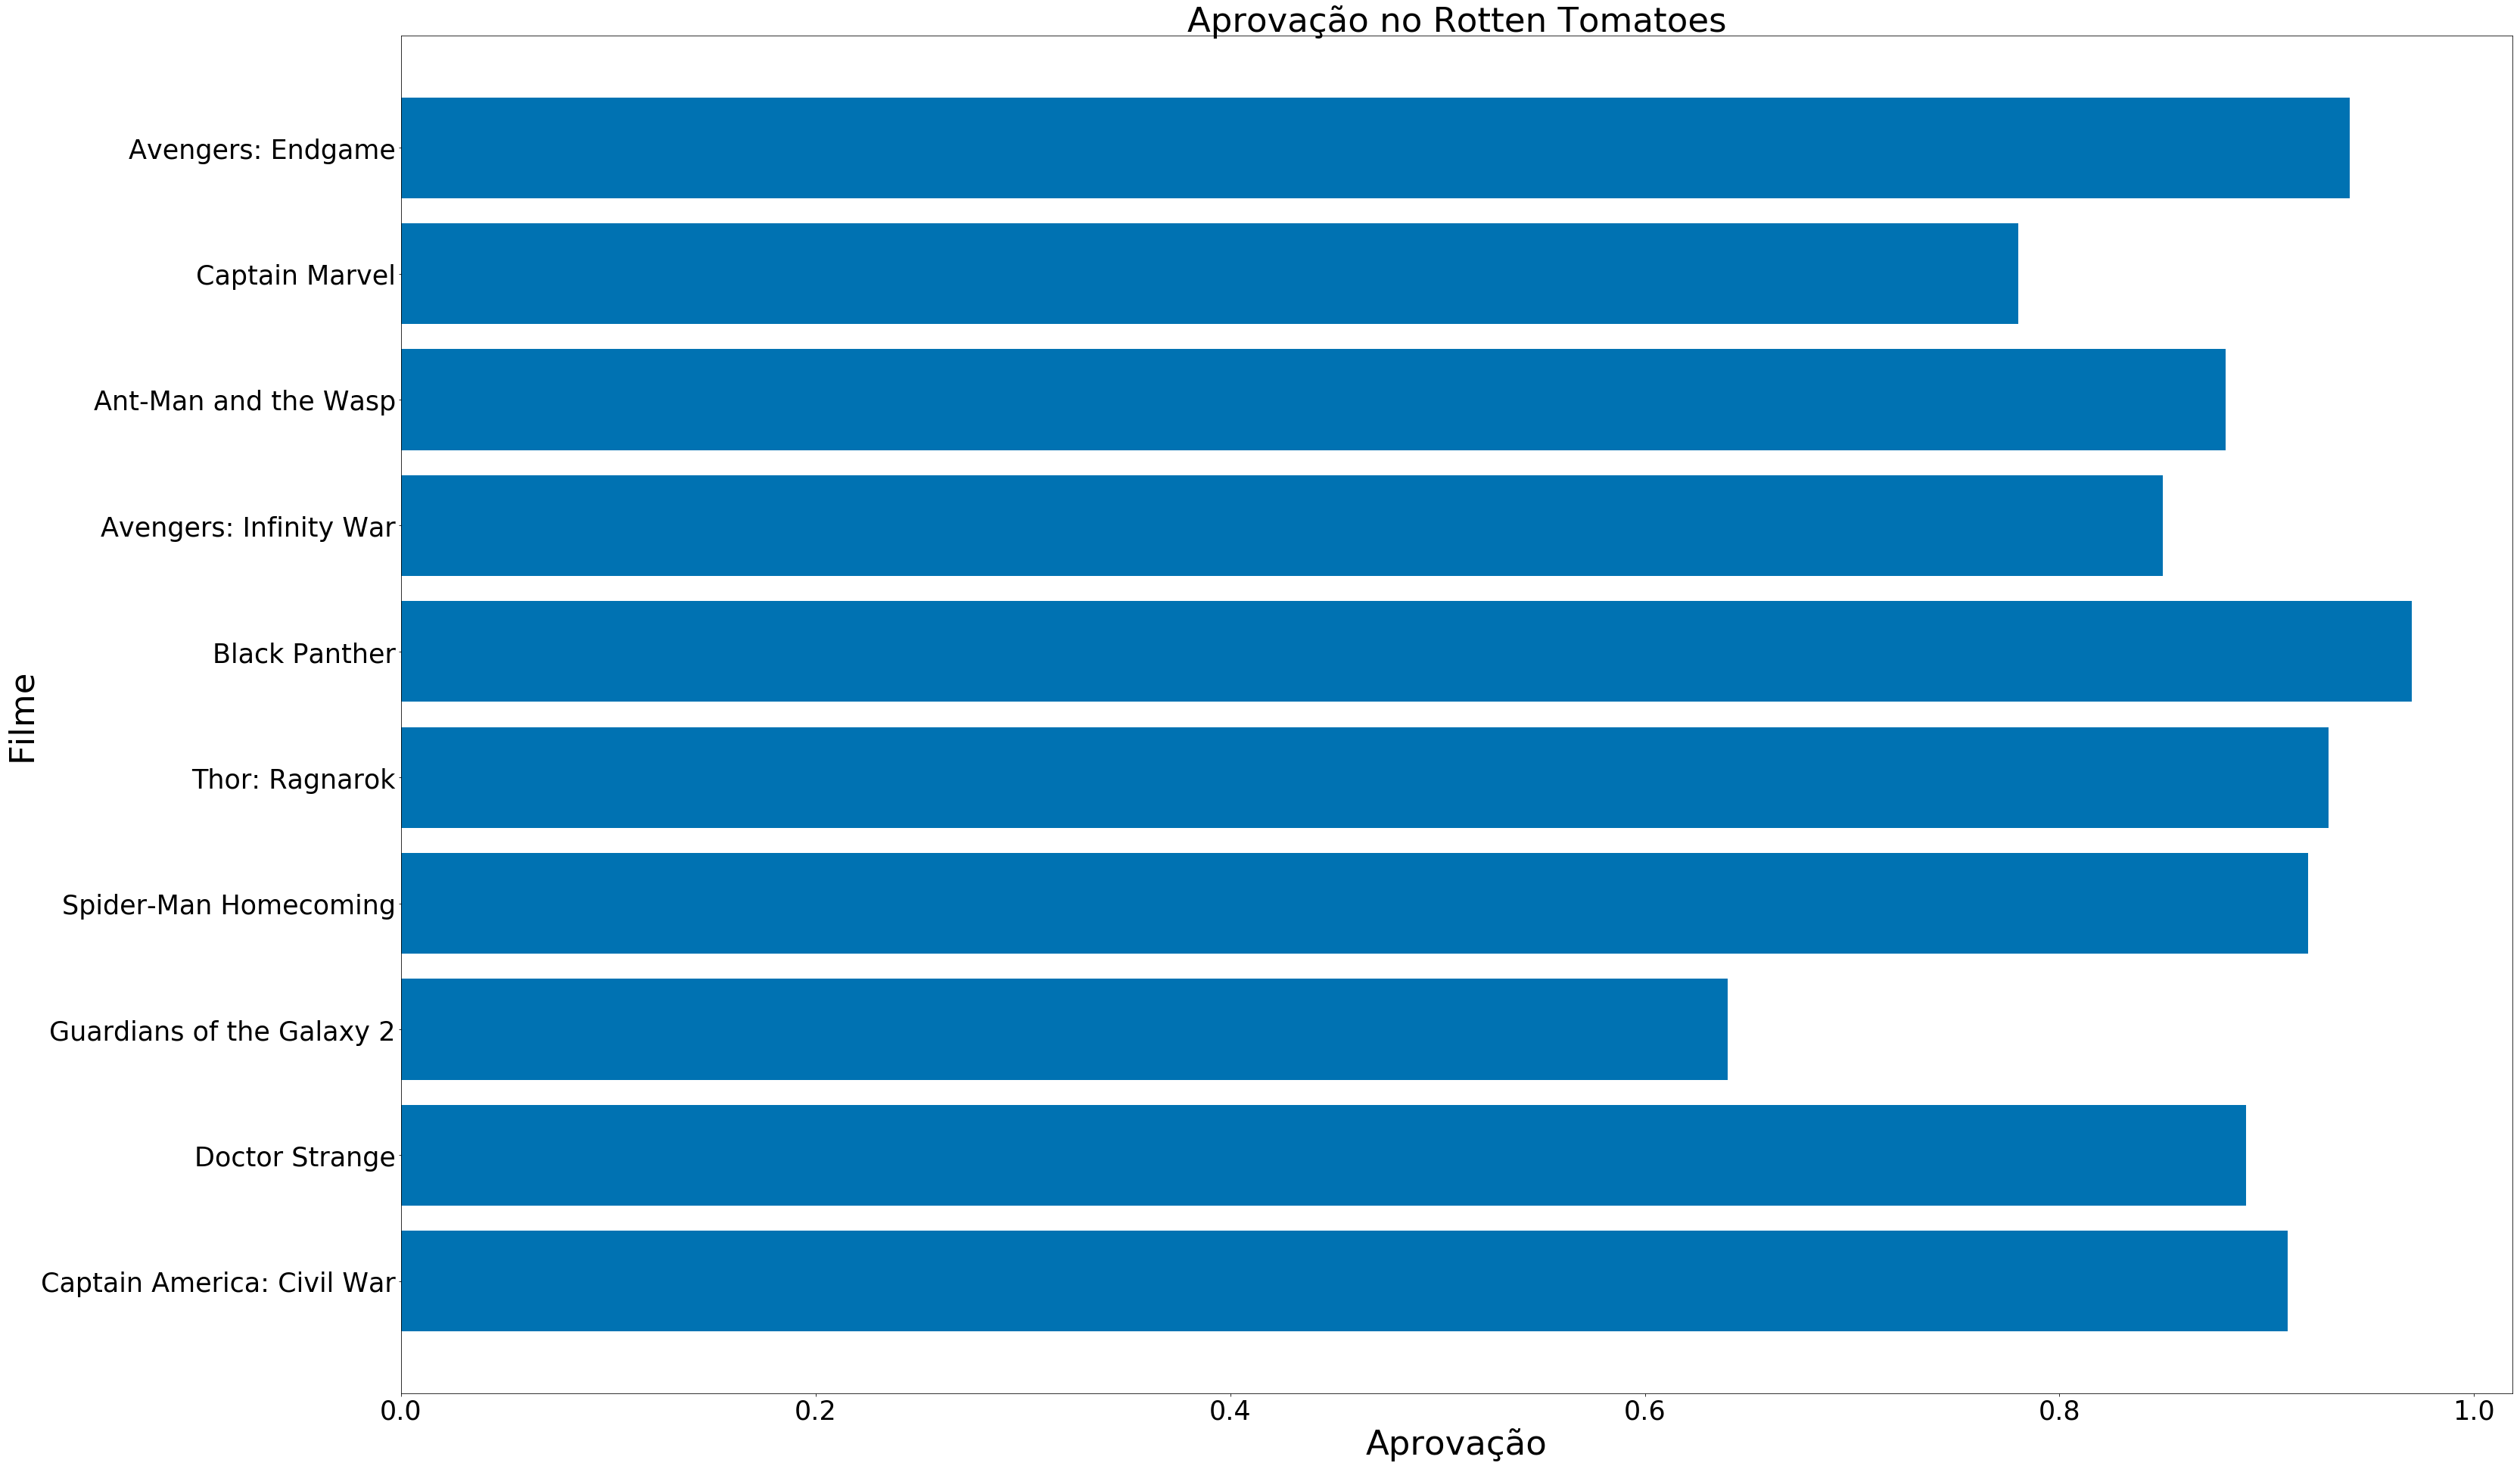

In [43]:
imdb3 = df[df['Phase']==3]['IMDb']
rotten3 = df[df['Phase']==3]['Rotten Tomatoes']

plt.barh(filmes3, rotten3)
plt.title('Aprovação no Rotten Tomatoes')
plt.xlabel("Aprovação")
plt.ylabel("Filme")
plt.show()

### Tempo de tela de cada personagem

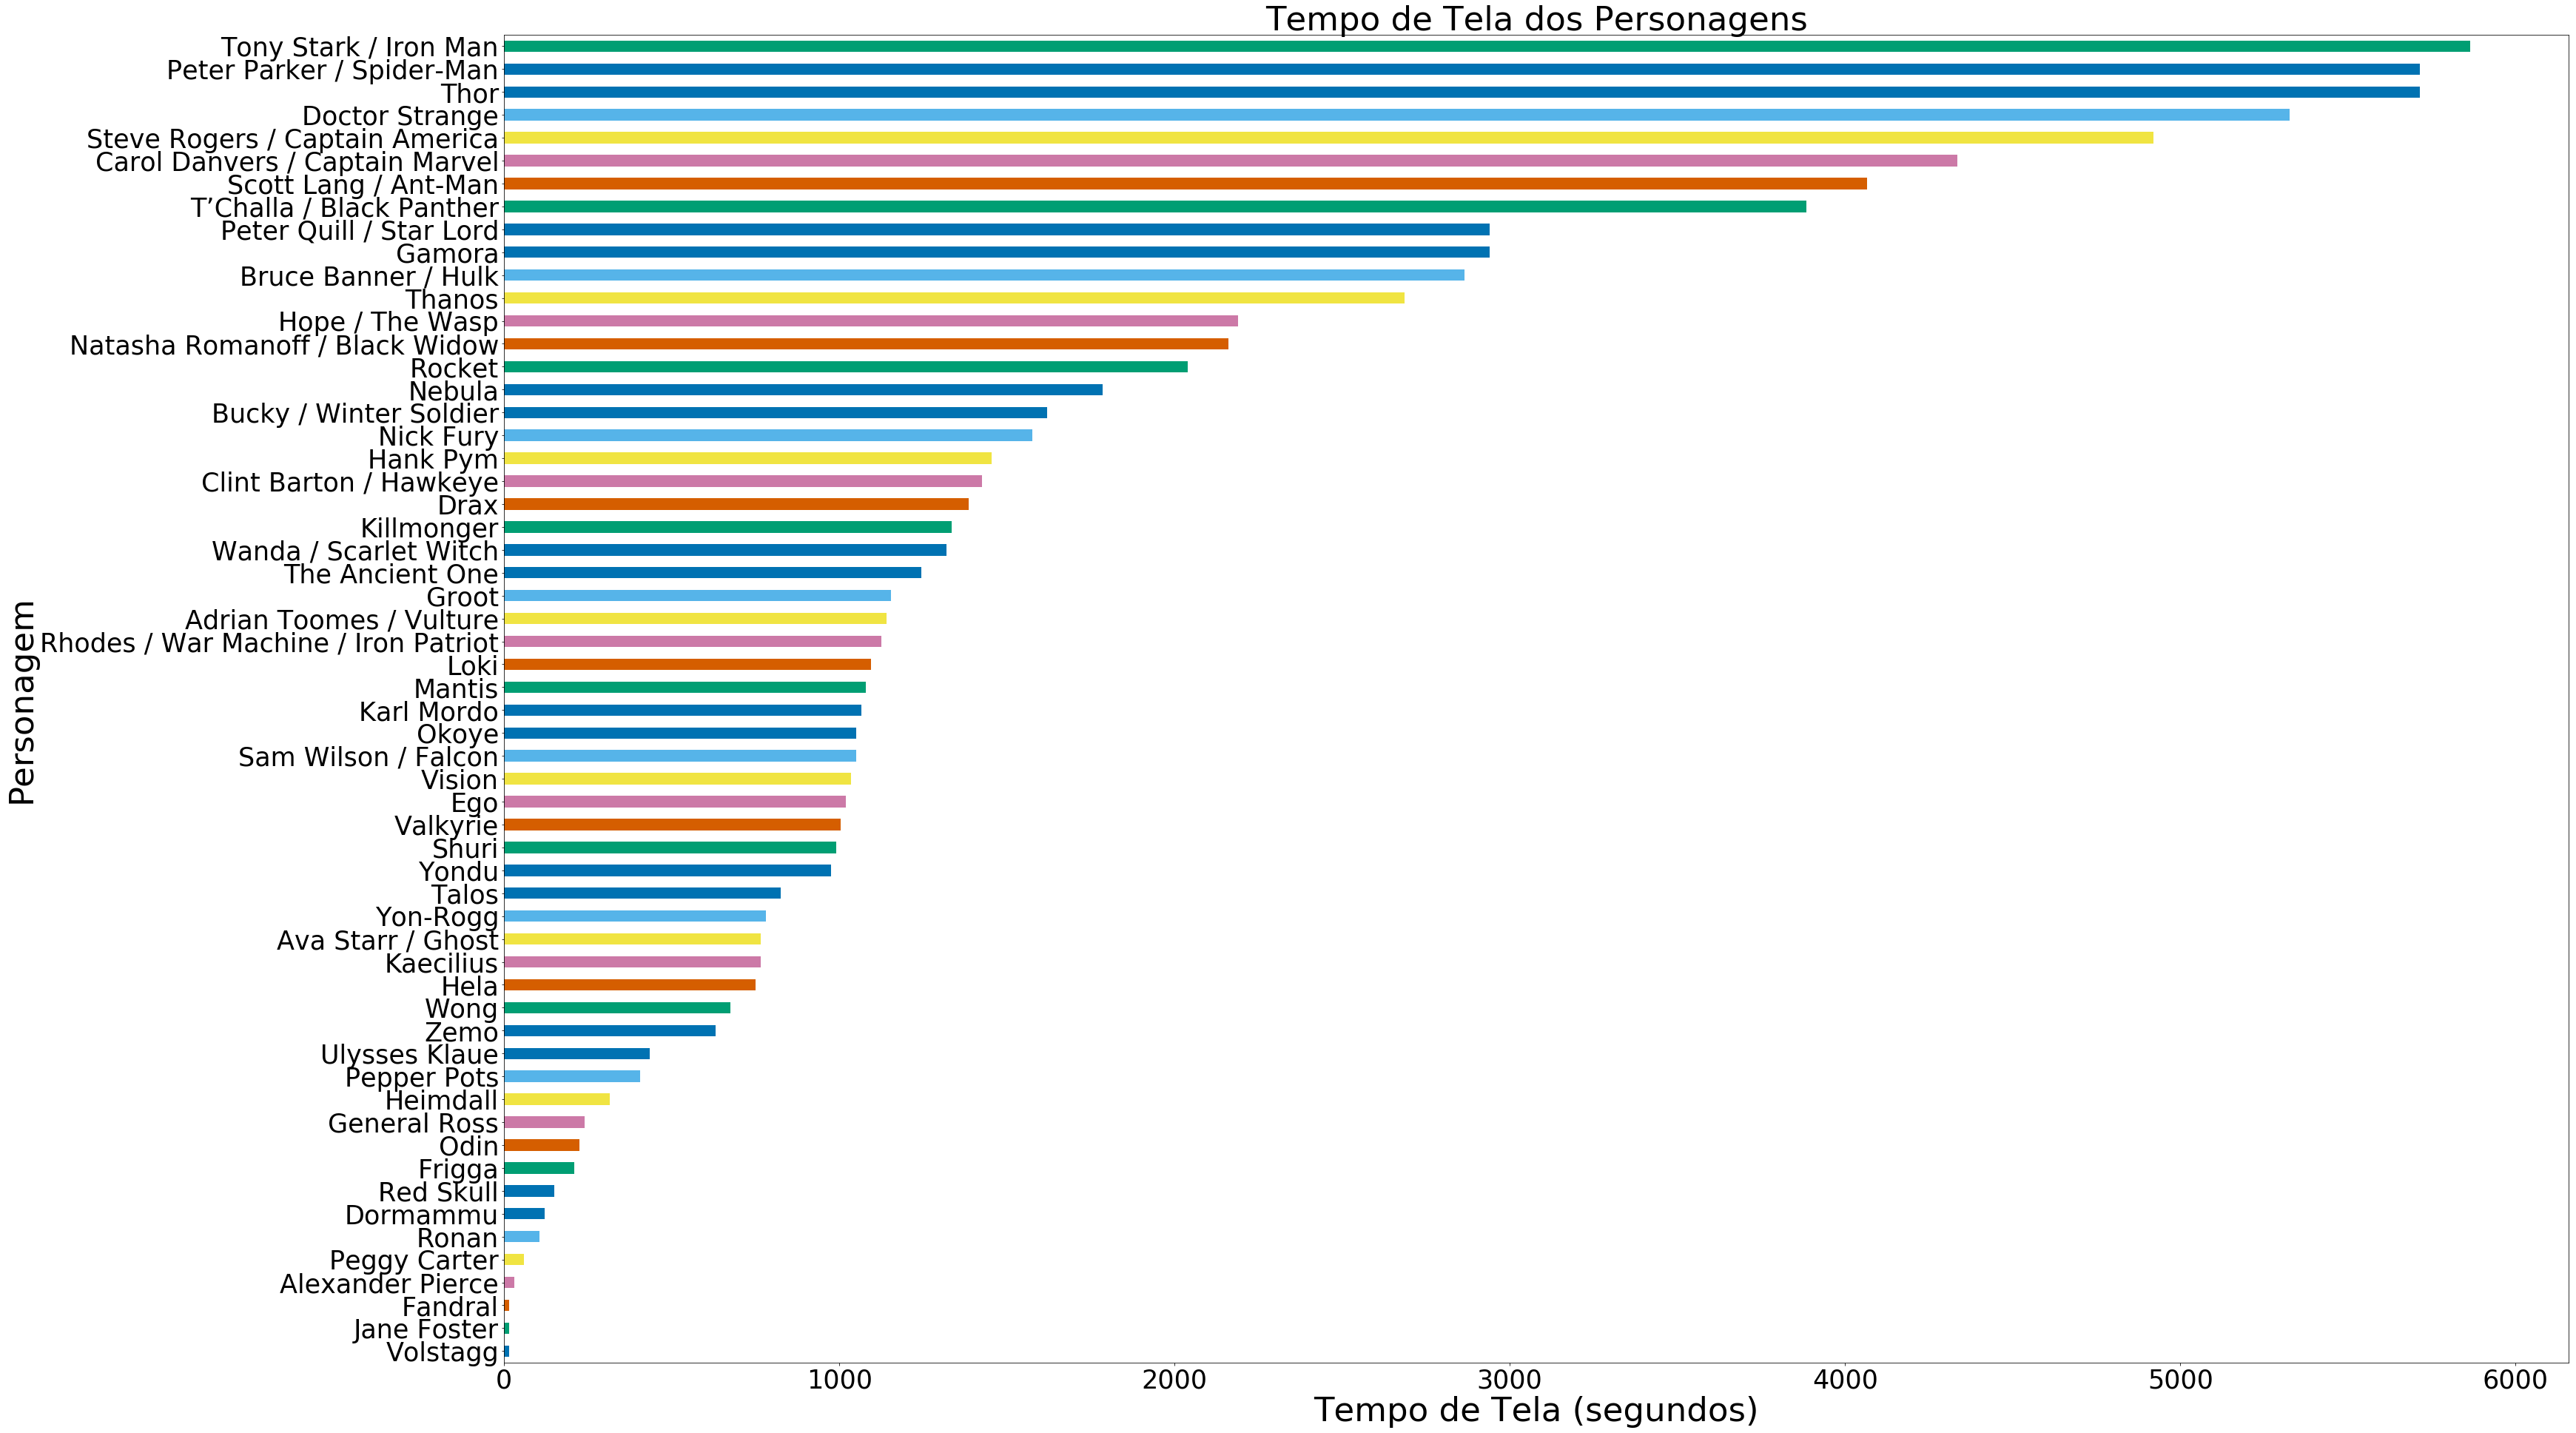

In [44]:
personagens3 = df[df['Phase']==3]
personagens3 = personagens3.loc[:, 'Tony Stark / Iron Man':'Hank Pym']
personagens3 = personagens3.loc[:, ~(personagens3 == 0).all()]

tempo = personagens3.sum().sort_values()

plt.title('Tempo de Tela dos Personagens')
plt.ylabel('Personagem')
plt.xlabel('Tempo de Tela (segundos)')
tempo.plot(kind='barh')

## Uma perspectiva geral sobre o MCU
### Bilheteria Total

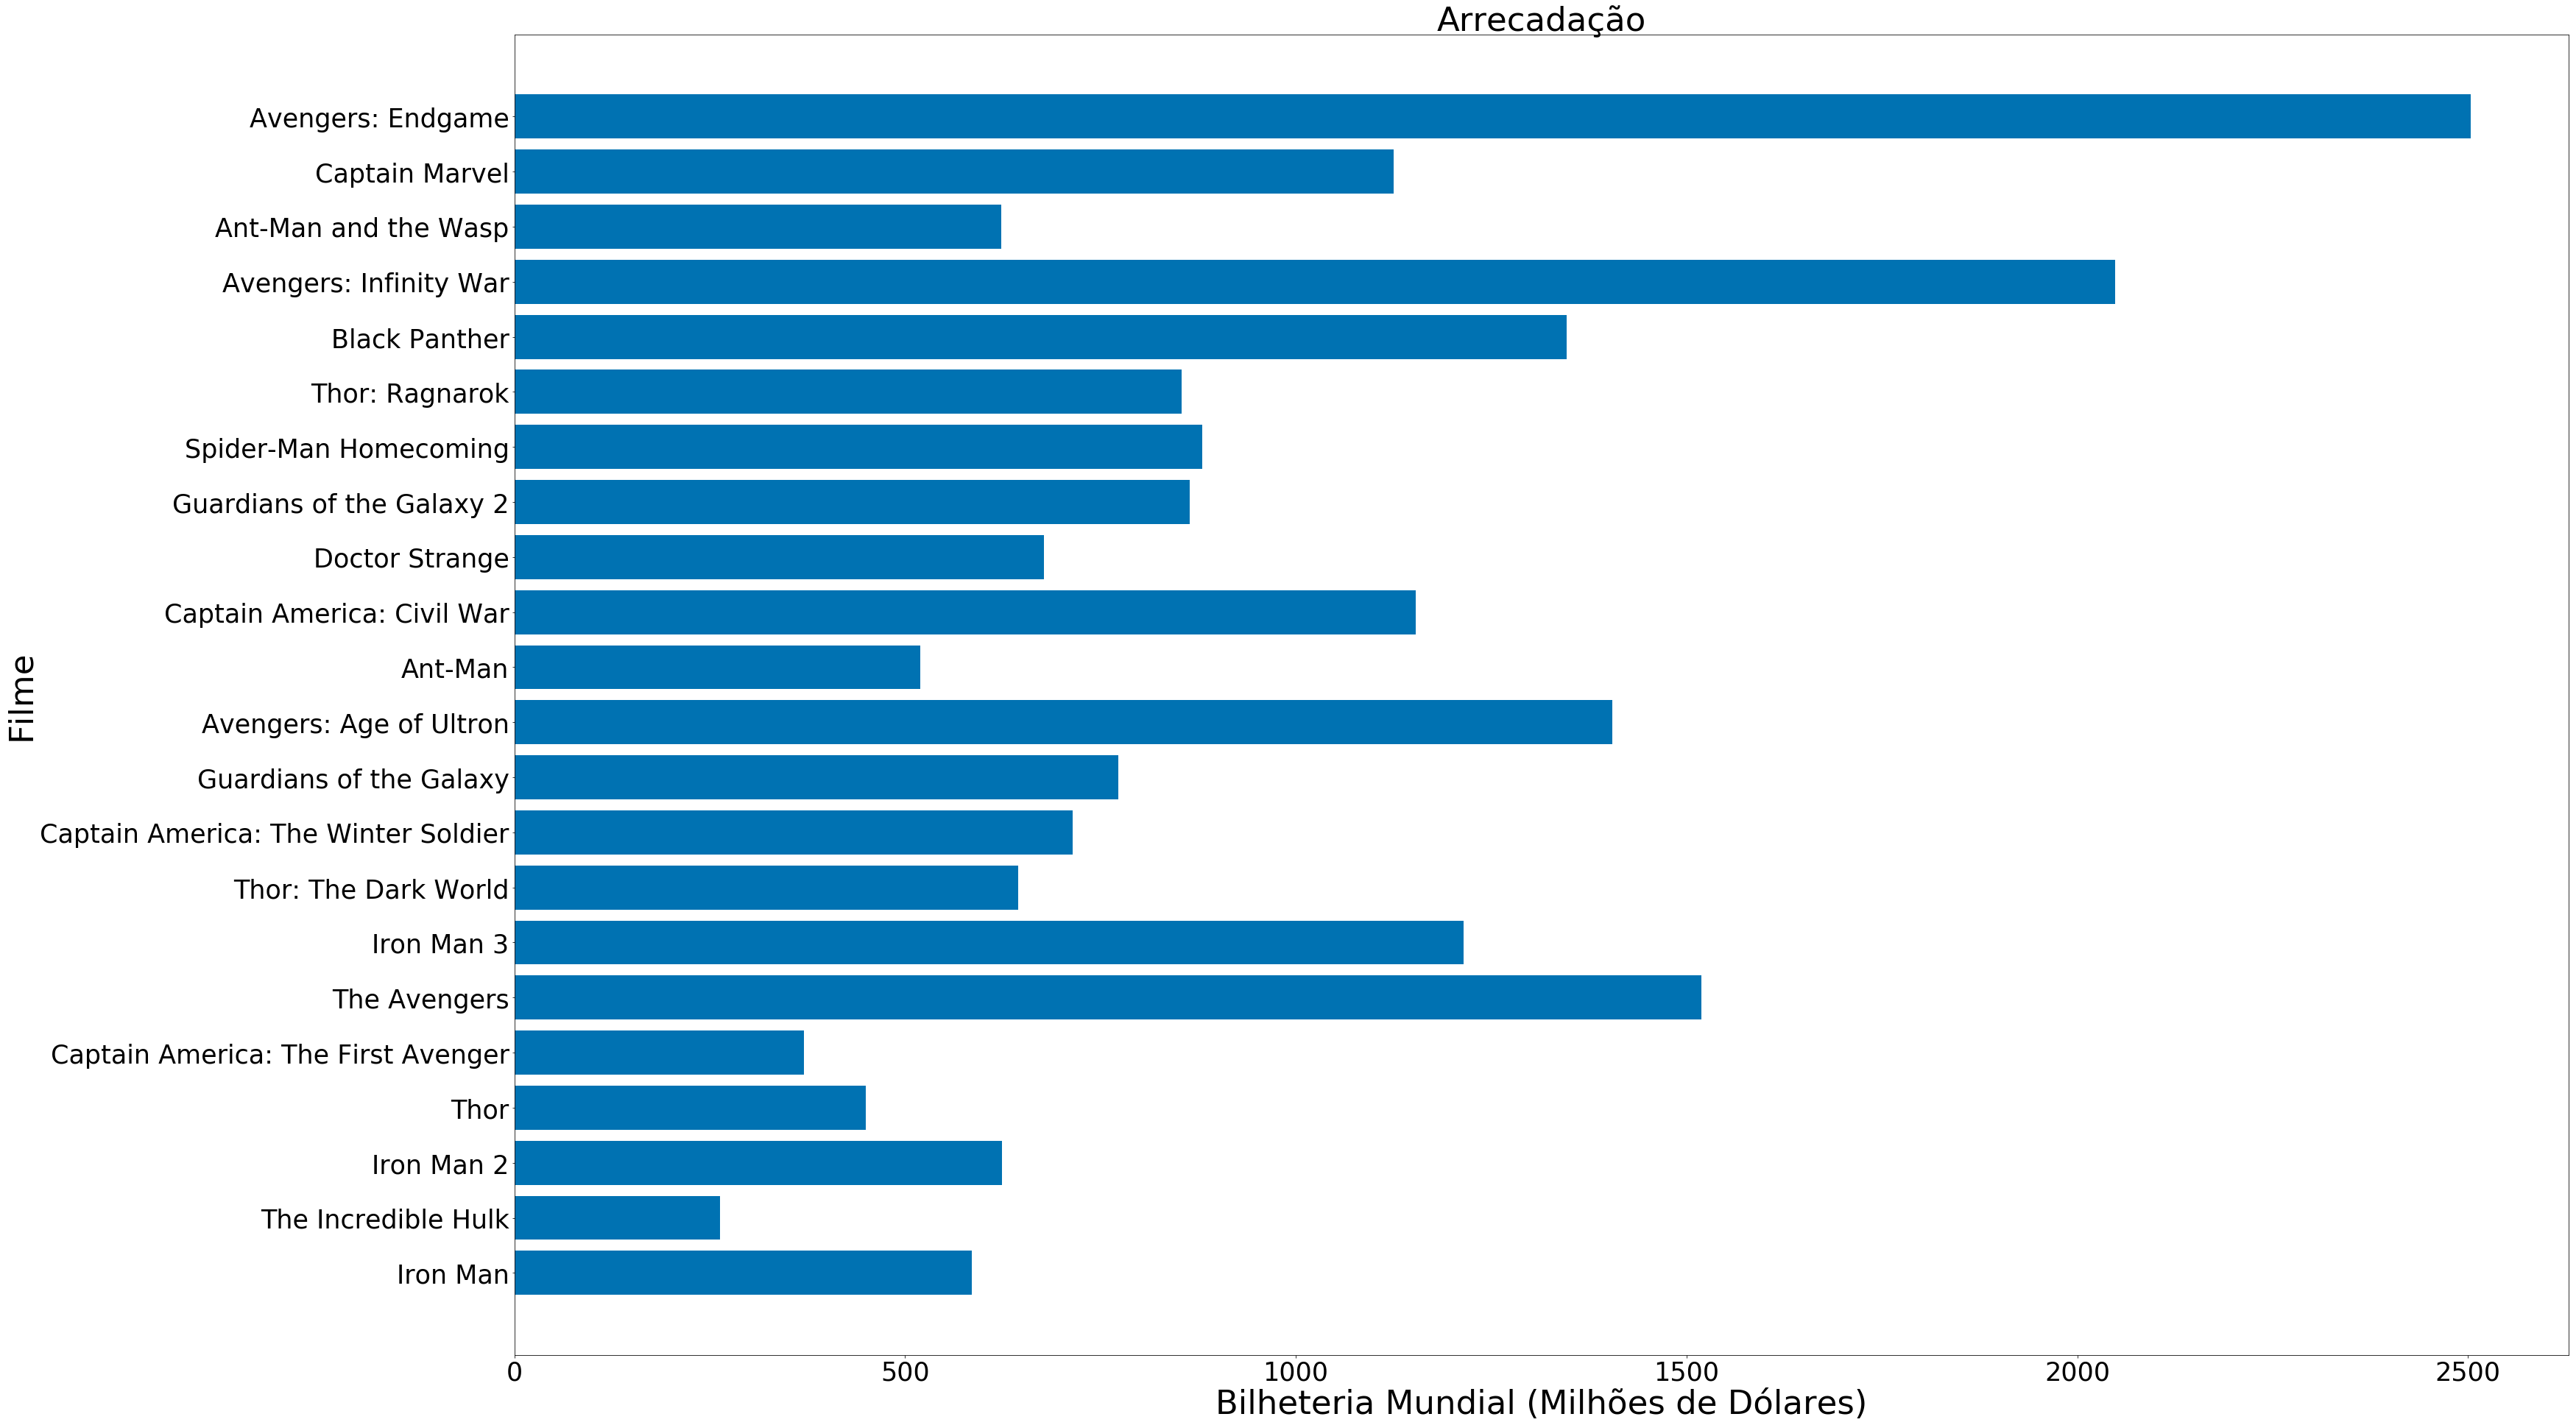

In [45]:
filmes = df['Movies']
bilheteria = df['Gross Worldwide']

plt.title('Arrecadação')
plt.xlabel("Bilheteria Mundial (Milhões de Dólares)")
plt.ylabel("Filme")
plt.barh(filmes, bilheteria)
plt.show()

### Crítica 

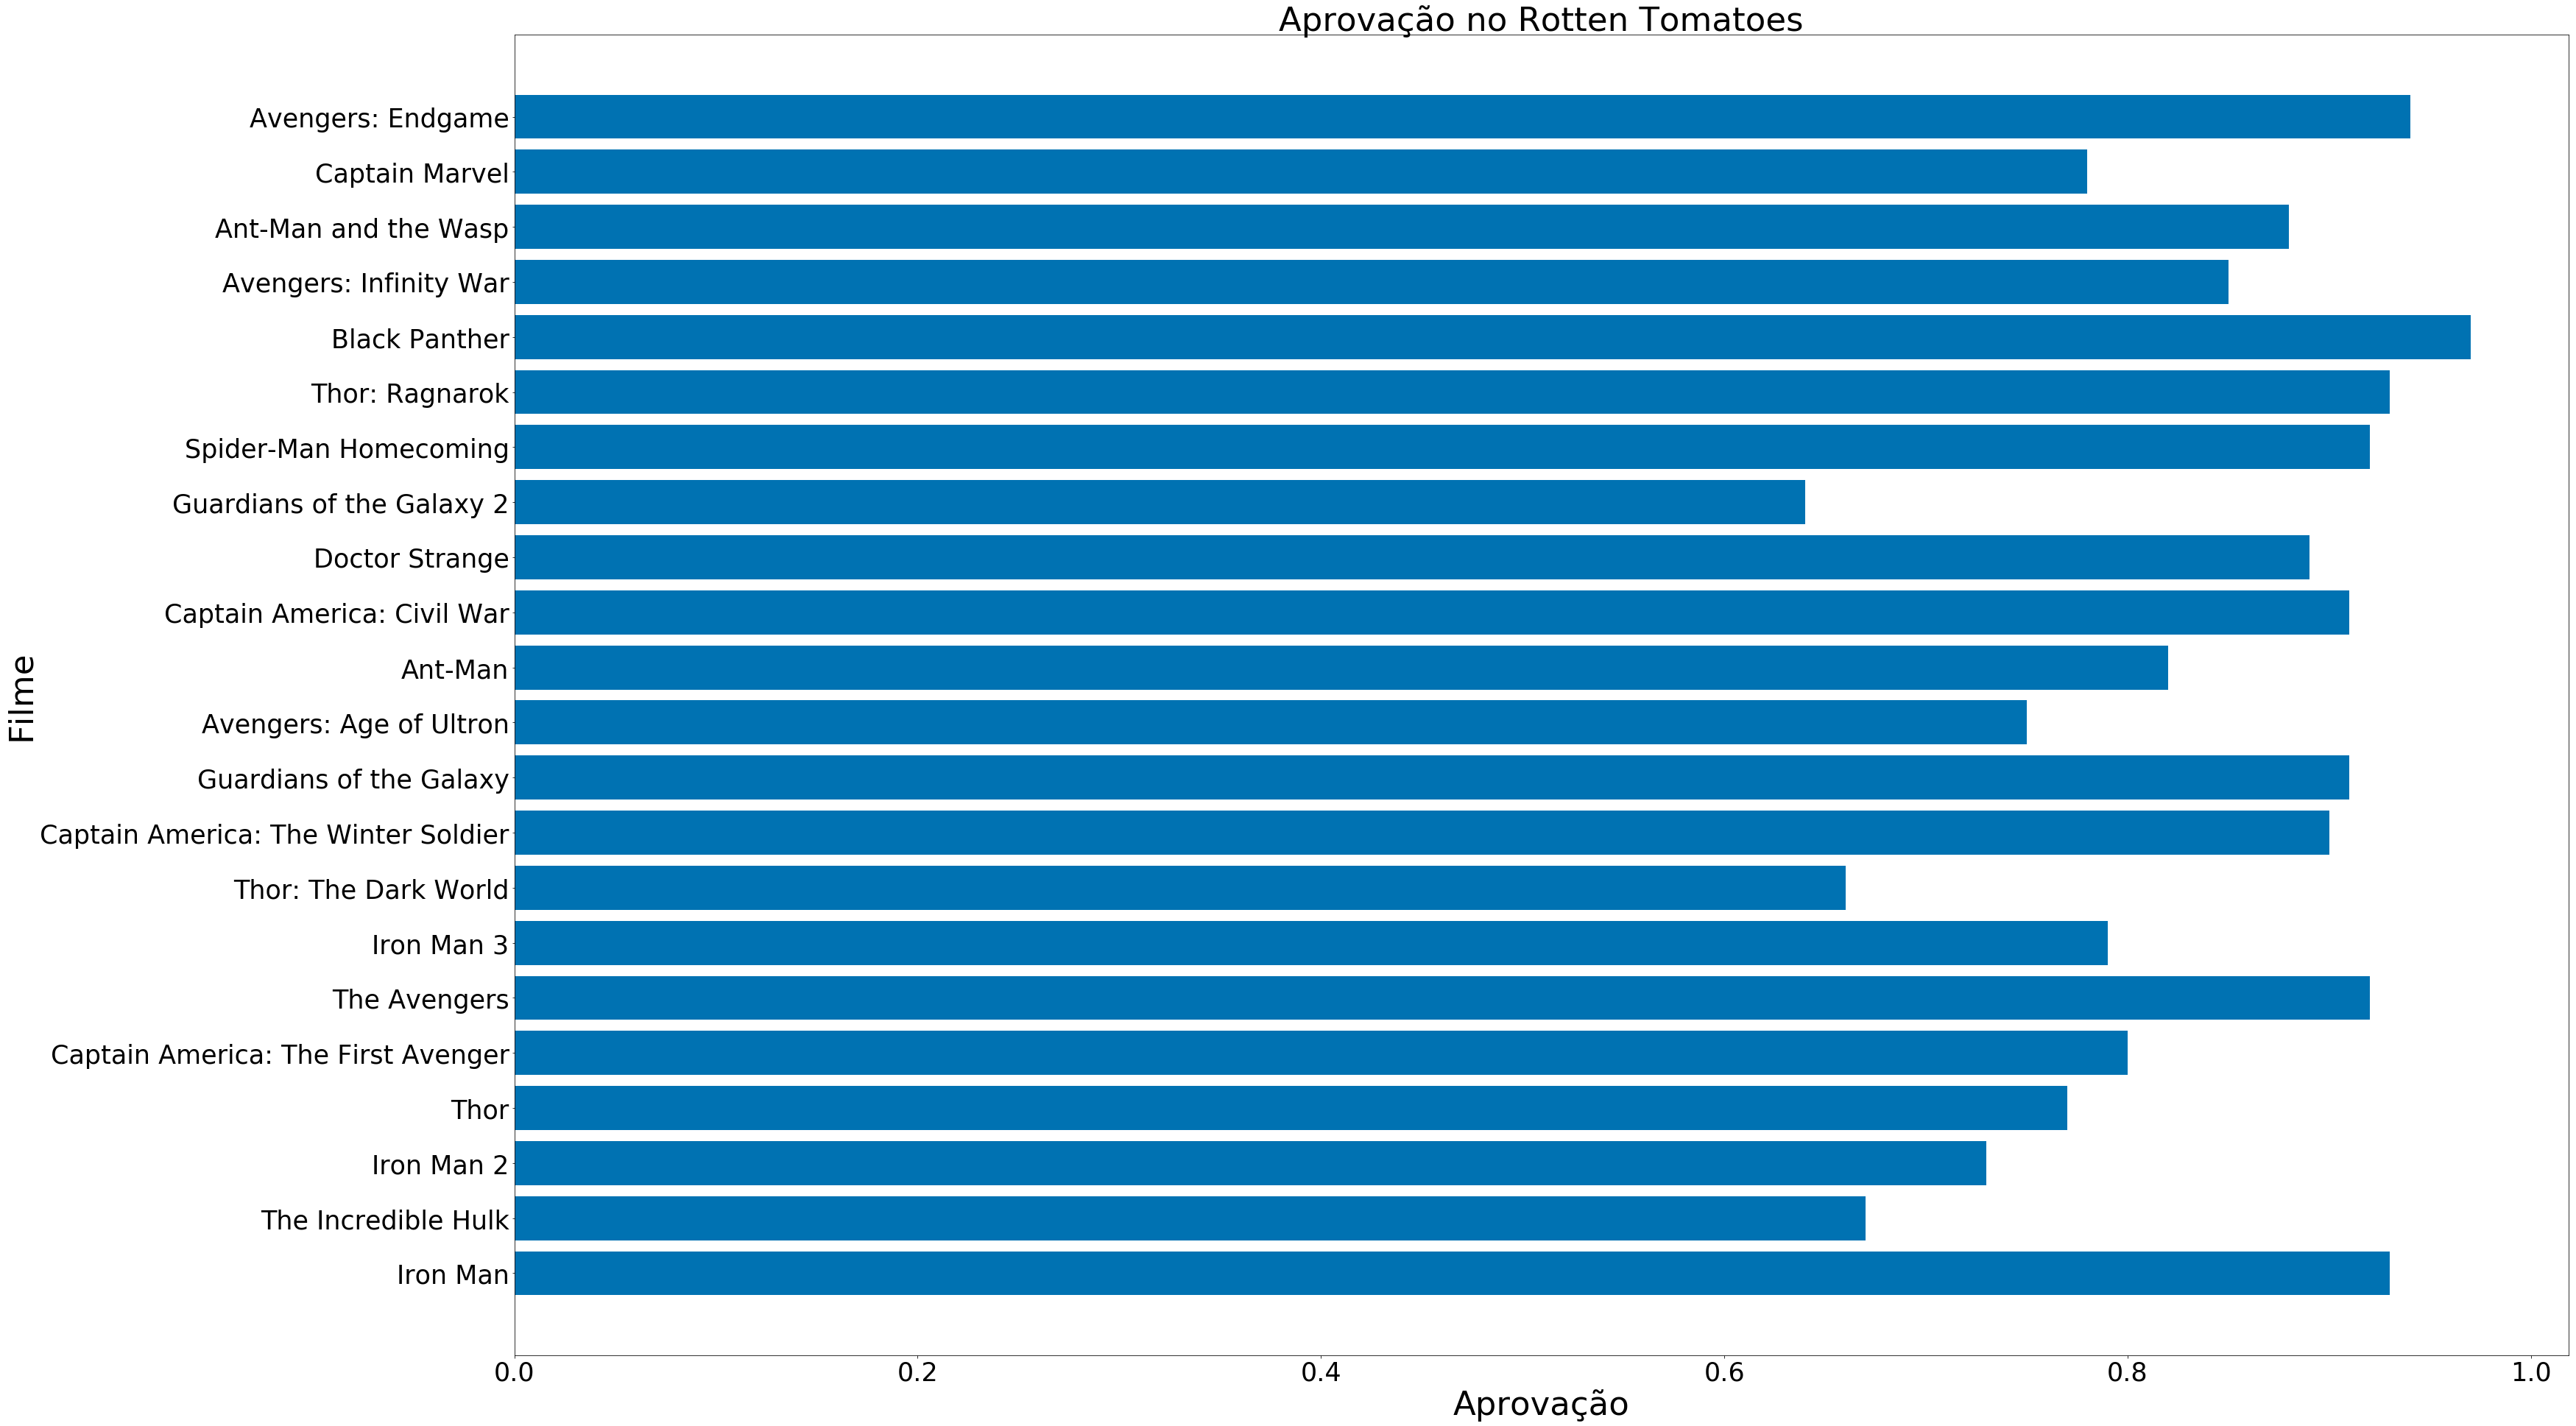

In [46]:
imdb = df['IMDb']
rotten = df['Rotten Tomatoes']

plt.barh(filmes, rotten)
plt.title('Aprovação no Rotten Tomatoes')
plt.xlabel("Aprovação")
plt.ylabel("Filme")
plt.show()

### Total de aparições

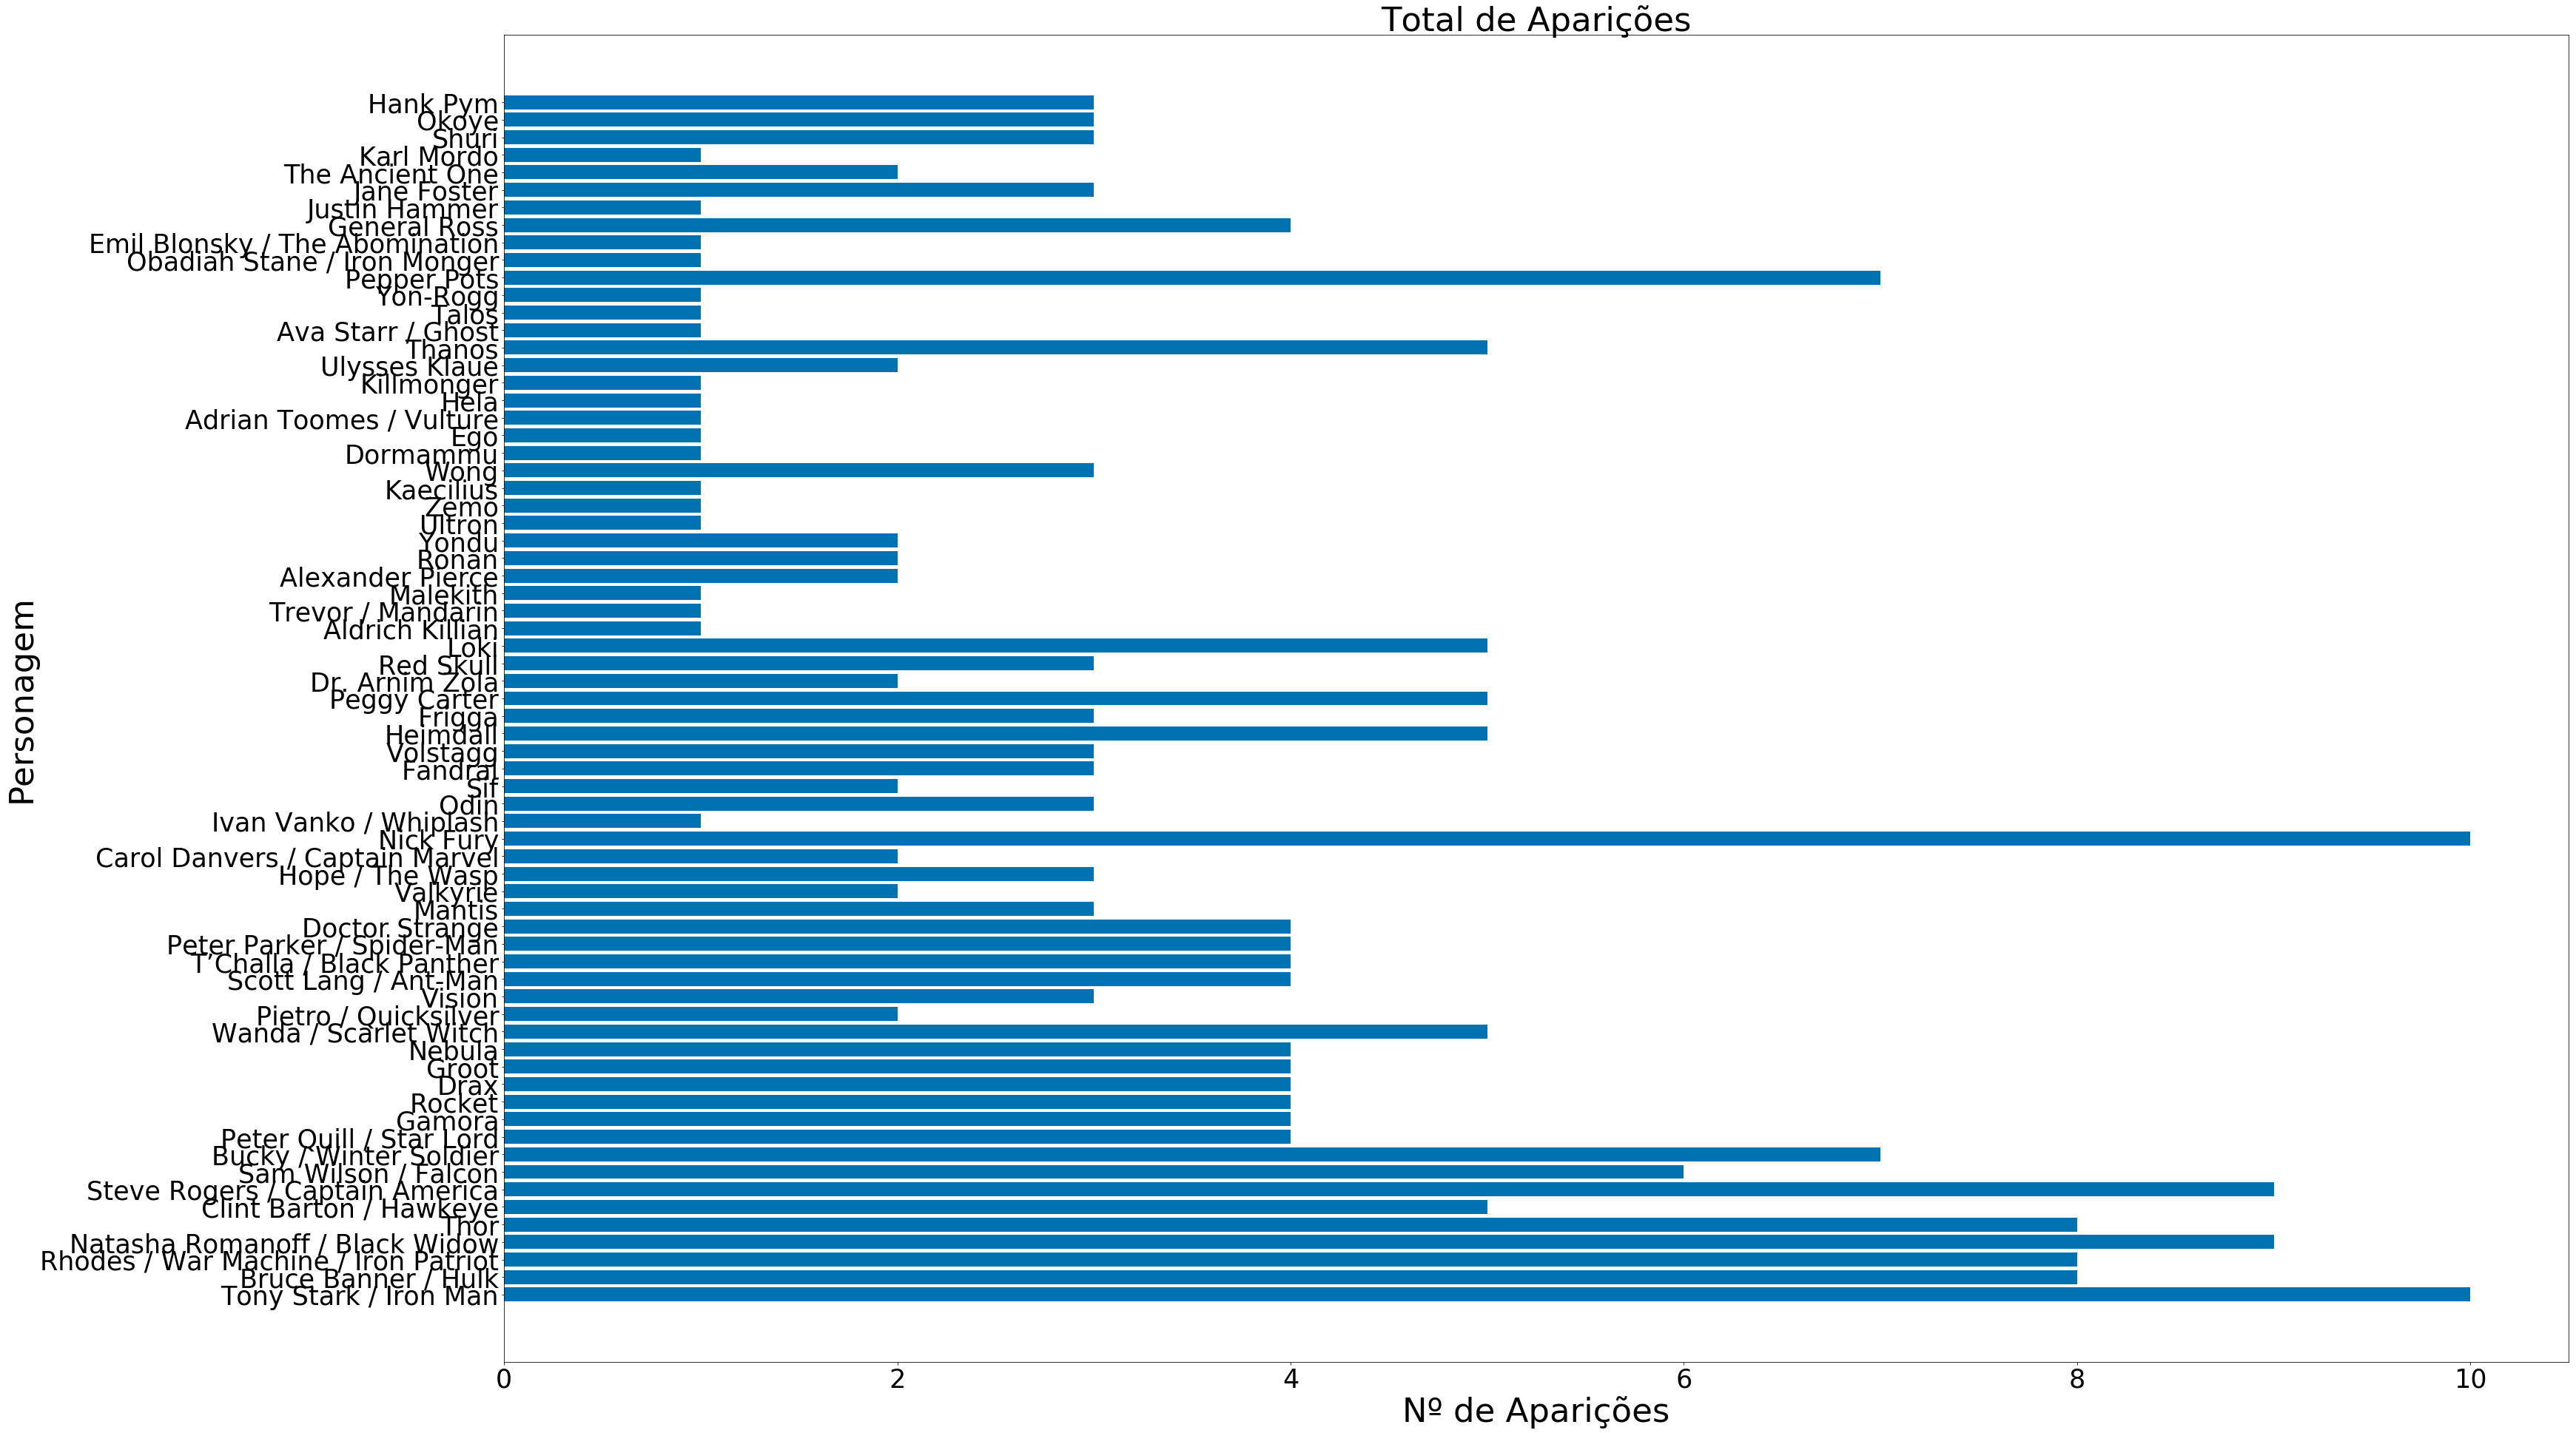

In [47]:
personagens = df.loc[:, 'Tony Stark / Iron Man':'Hank Pym']
aparicoes = []

ronman = (personagens['Tony Stark / Iron Man'] > 0).sum()
for i in personagens: 
    aparicoes.append((personagens[i] > 0).sum())

plt.title('Total de Aparições')
plt.xlabel('Nº de Aparições')
plt.ylabel('Personagem')
plt.barh(personagens.columns.values, aparicoes)
plt.show()

### Tempo total de tela
Incluindo cameos e aparições em cenas pós-créditos


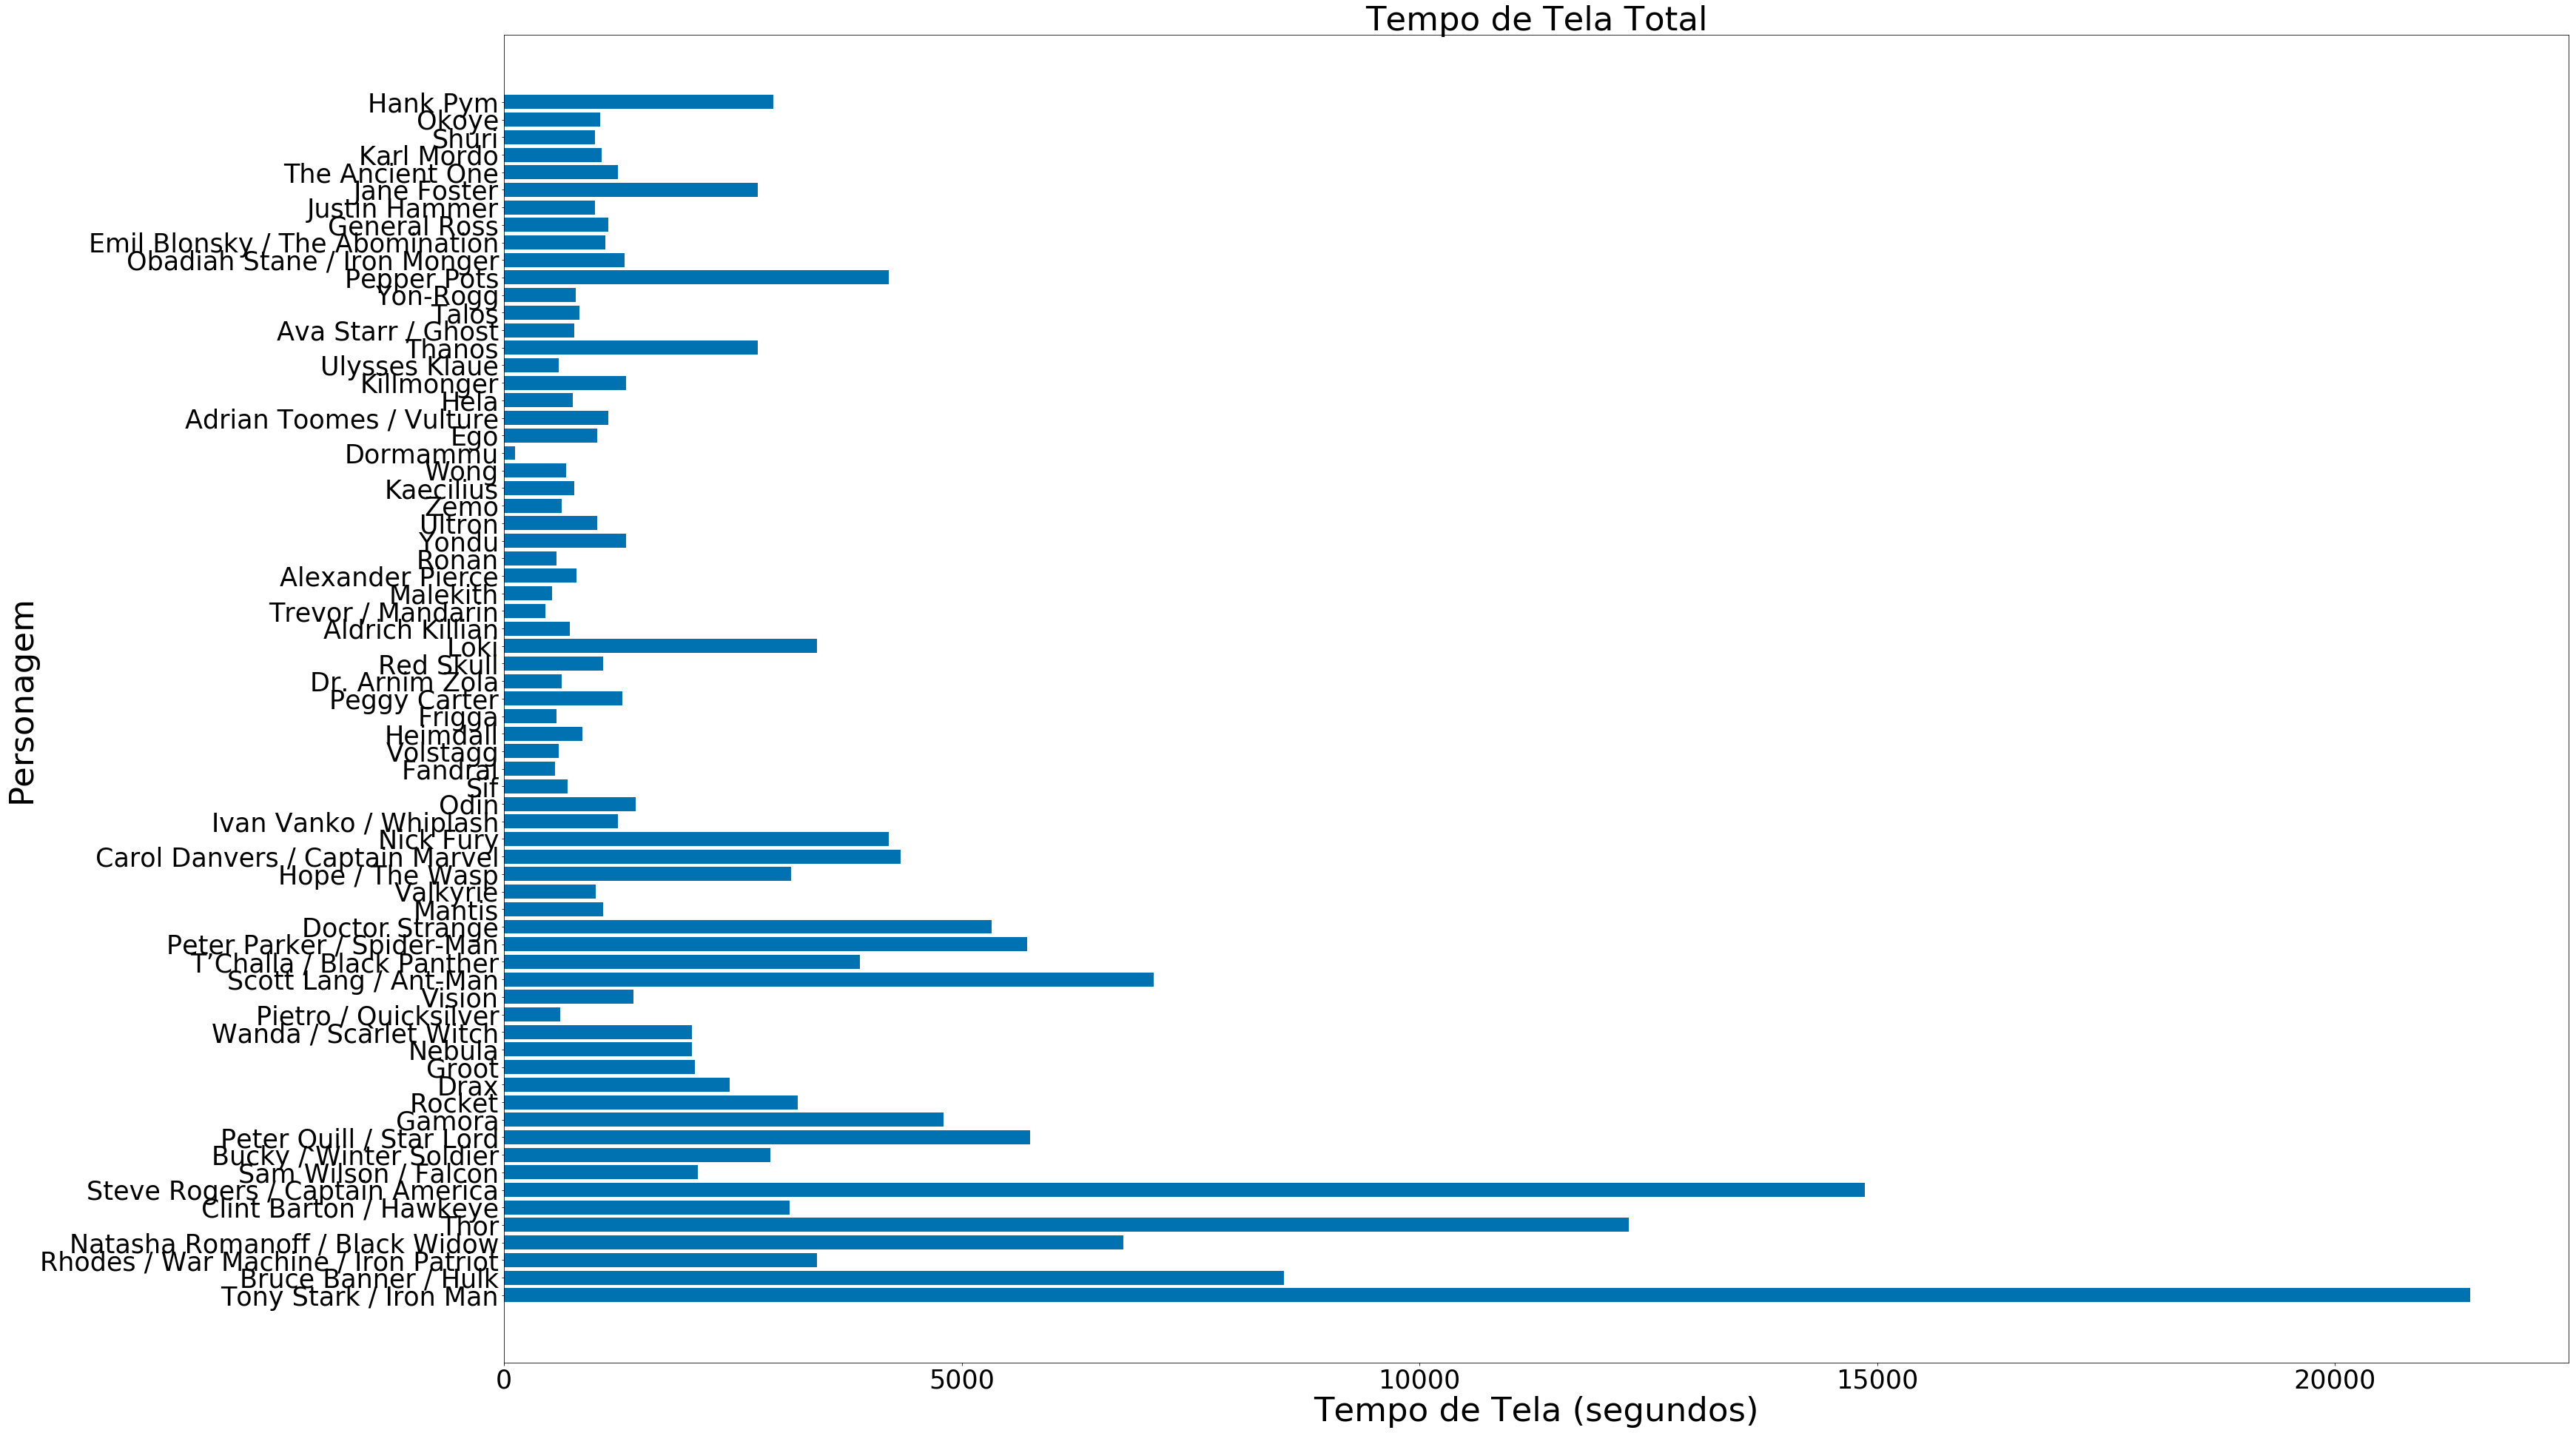

In [48]:
personagens = df.loc[:, 'Tony Stark / Iron Man':'Hank Pym']
tempo = []

ronman = (personagens['Tony Stark / Iron Man']).sum()
for i in personagens: 
    tempo.append(personagens[i].sum())

plt.title('Tempo de Tela Total')
plt.xlabel('Tempo de Tela (segundos)')
plt.ylabel('Personagem')
plt.barh(personagens.columns.values, tempo)
plt.show()

## Regressão Linear Simples

Desde o início do trabalho, pensamos em diversas relações entre os atributos de nossos fatasets. Optamos por tentar traçar uma relação entre a avaliaçaõ de cada filme, pelo IMDb e a arrecadação que o mesmo teve, da seguinte forma:

In [49]:
df_imdb = dfrating['IMDb']
df_gross_Worldwide = dfmovie['gross_Worldwide']
dfr = pd.concat([df_imdb, df_gross_Worldwide], axis=1)
dfr.head()

IMDb  gross_Worldwide
0   7.9            585.2
1   6.7            263.4
2   7.0            623.9
3   7.0            449.3
4   6.9            370.6

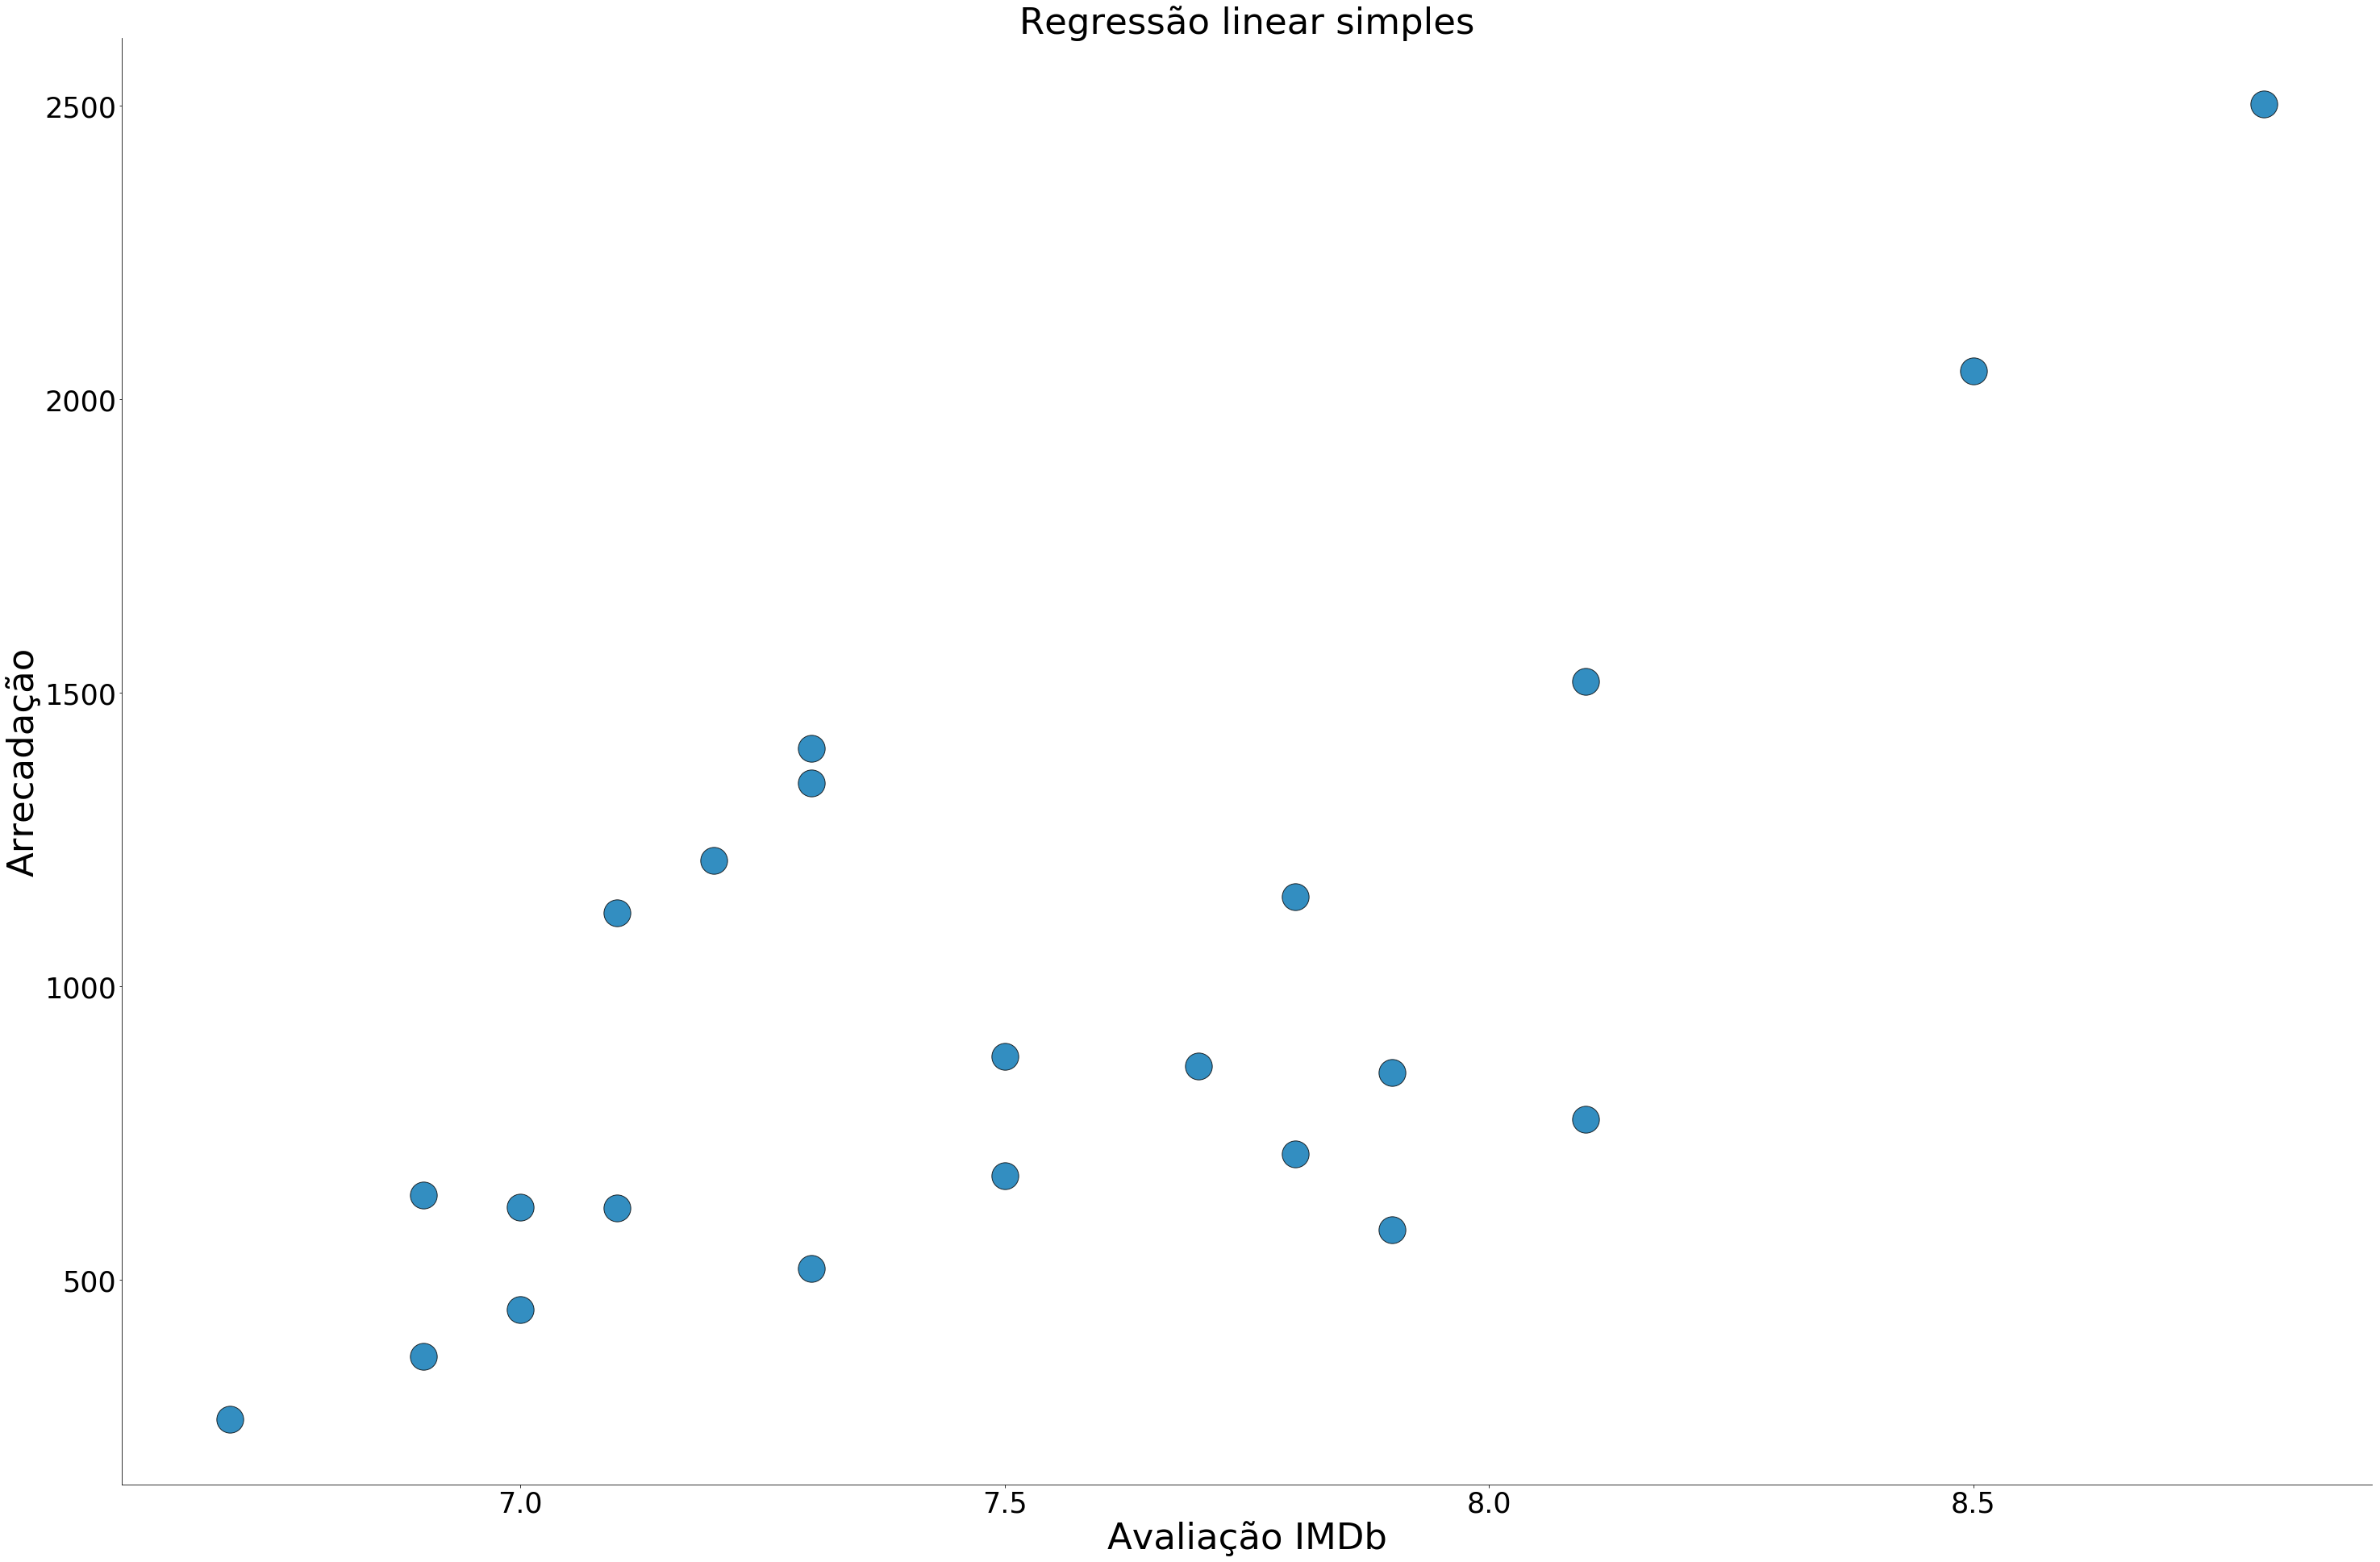

In [50]:
x = dfr['IMDb'].values
y = dfr['gross_Worldwide'].values

plt.scatter(x, y, alpha=0.8, edgecolors='k', s=1110)
plt.xlabel('Avaliação IMDb')
plt.ylabel('Arrecadação')
plt.title('Regressão linear simples')
despine()

In [51]:
model = dfr.groupby('IMDb').mean()
model.head()

gross_Worldwide
IMDb                 
6.7            263.40
6.9            507.60
7.0            536.60
7.1            873.75
7.2           1214.80

Text(0.5, 1.0, 'Regressão linear simples')

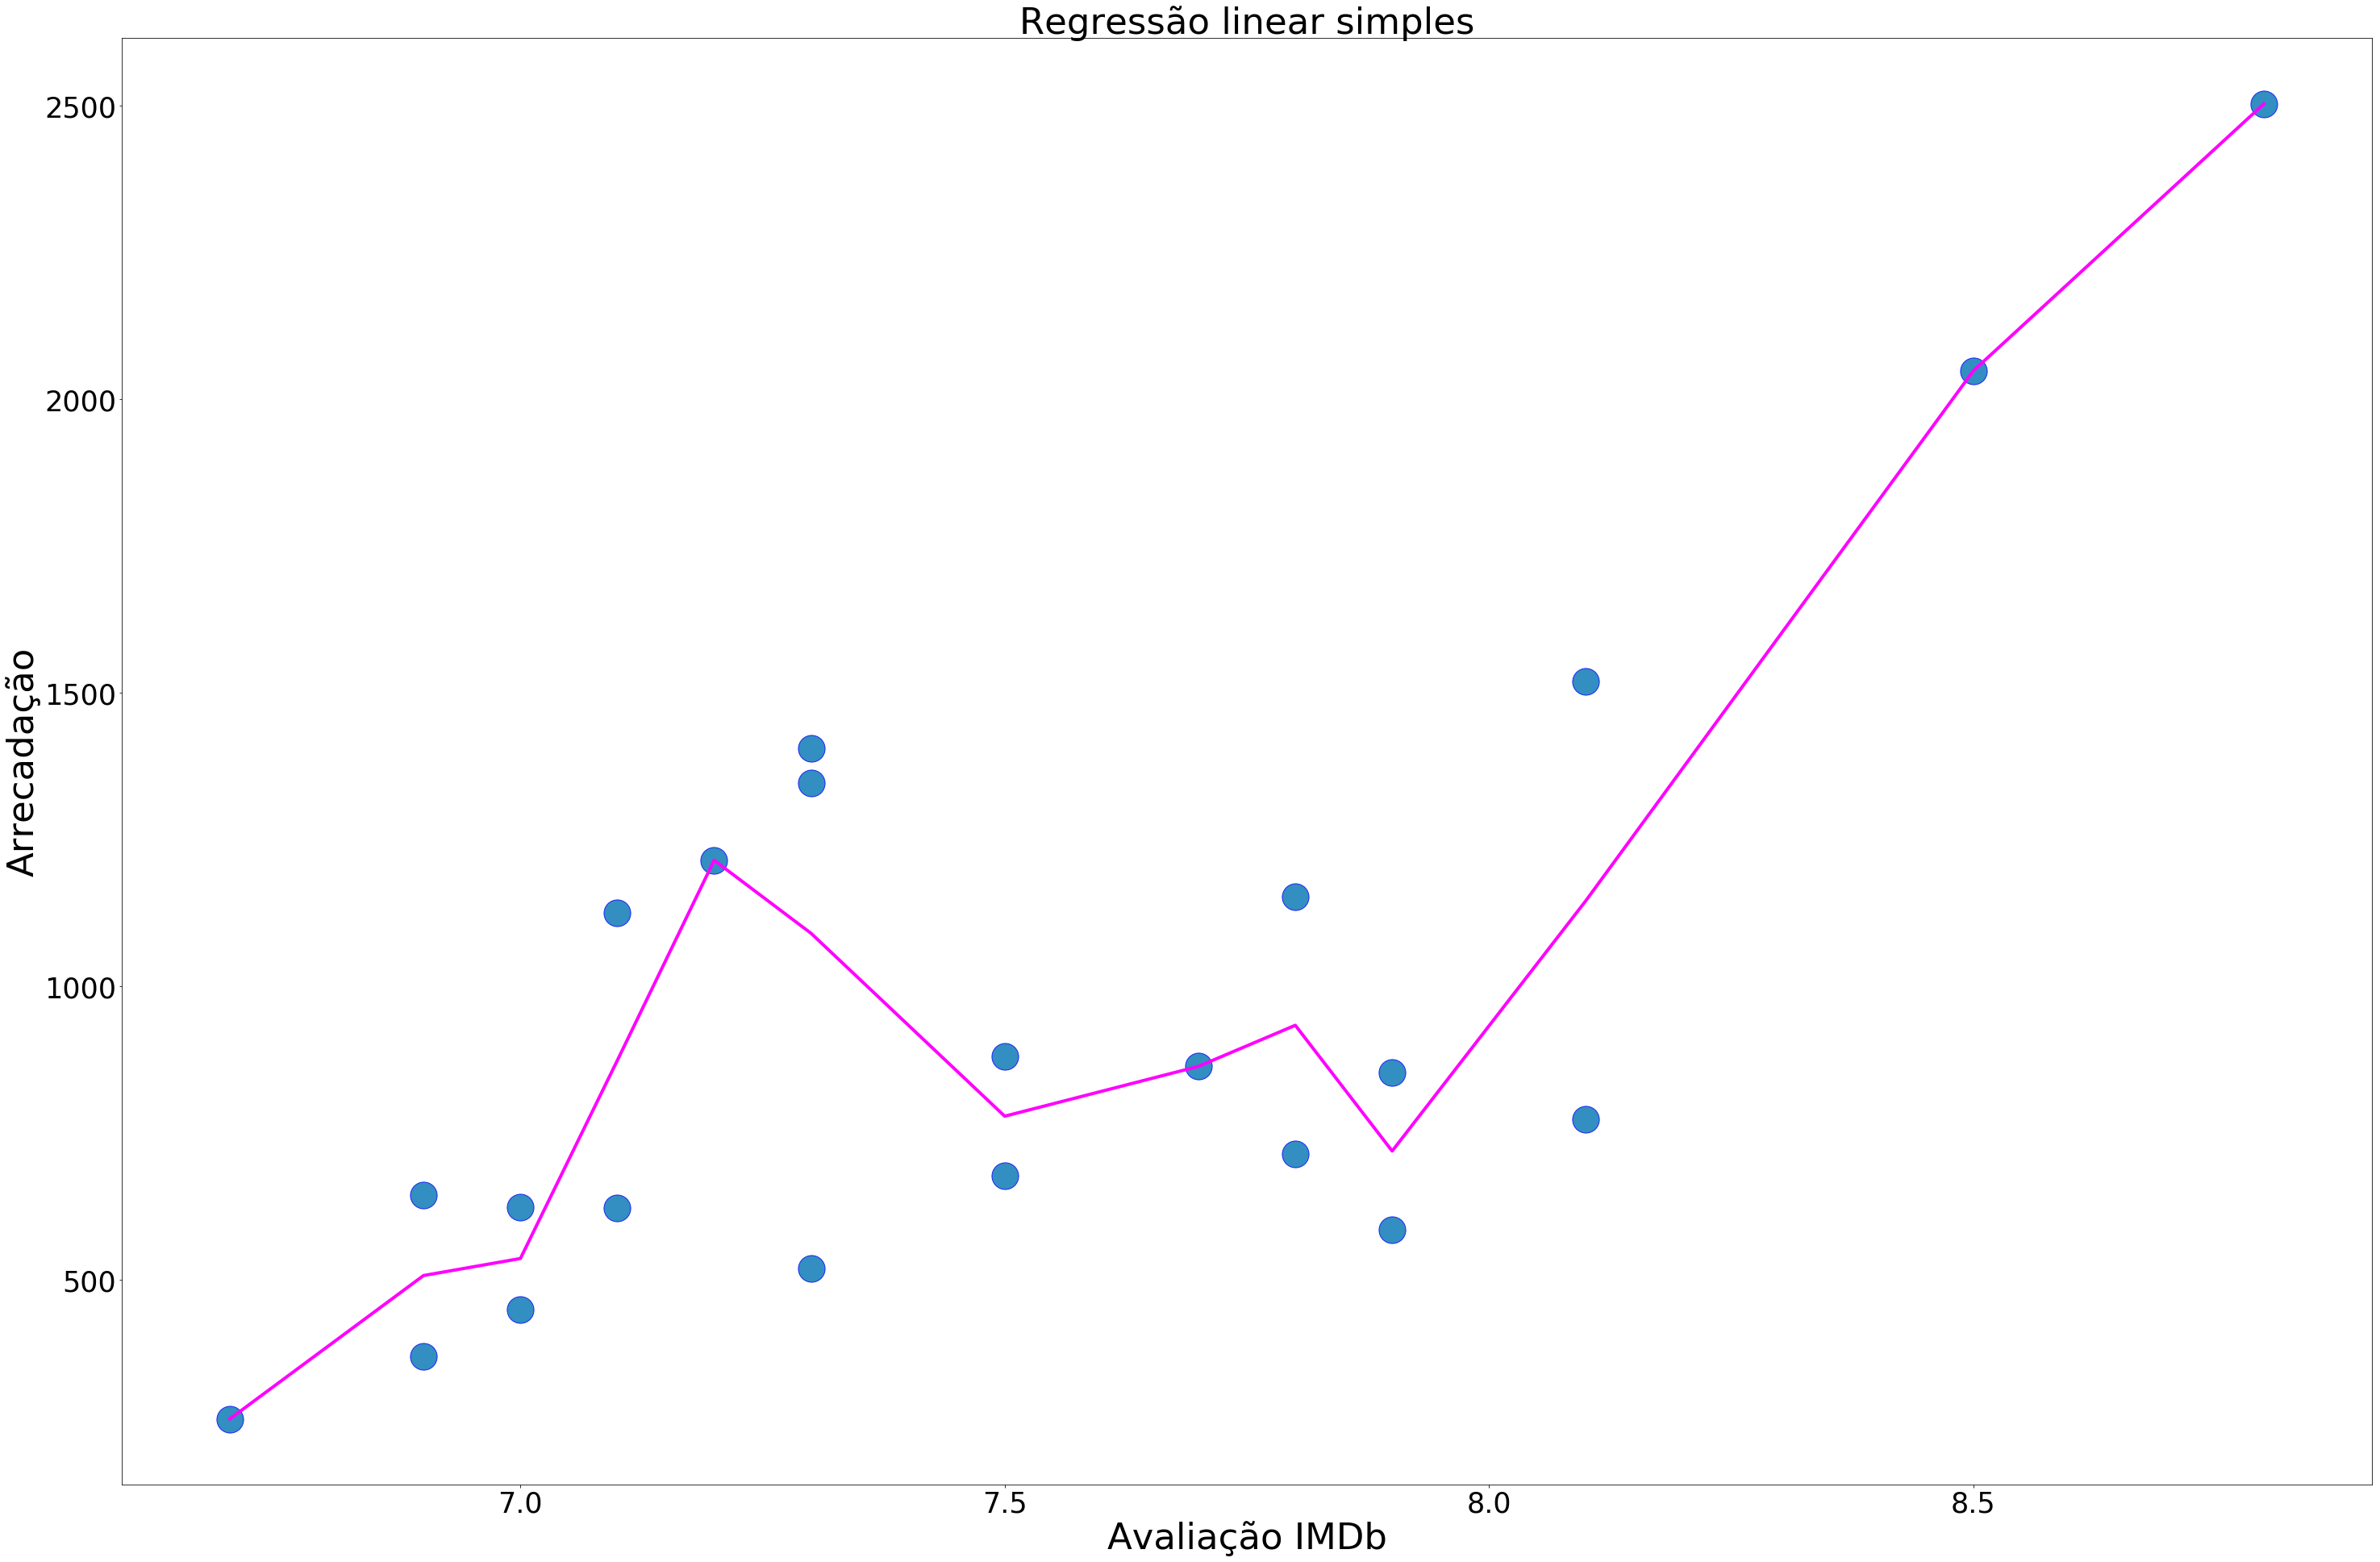

In [52]:
x_nn = model.index
y_nn = model.values
plt.scatter(x, y, alpha=0.8, edgecolors='b', s=1100)
plt.plot(x_nn, y_nn, color='magenta')
plt.xlabel('Avaliação IMDb')
plt.ylabel('Arrecadação')
plt.title('Regressão linear simples')

Podemos ver que há sim uma certa relação entre os atributos mas, ainda sim, há filmes com "baixa" avaliação que apresentaram uma arrecadação consideravelmente alta.

## Resultados e Conclusão

O trabalho foi construído a partir dos datasets retirados do site referência (Kaggle) que foram filtrados por nós a fim de remover inconsistências nos dados e informações que não seriam tão importantes ao nosso ver para o desenvolvimento do tema proposto pelo grupo.

Tendo os arquivos com todas informações necessárias em mãos, passamos a analisar os dados e aplicar o que foi visto na disciplina de Introdução a Ciência dos dados, no em 2019/1. Com todas as ferramentas trabalhadas e utilizando de conhecimento prévio em outras áreas, desmembramos informações sobre diferentes aspectos do Universo Marvel a fim de não só caracterizá-lo mas também colocar nosso conhecimento em prática.

Com a implementação e geração dos mais diversos gráficos, podemos perceber que algumas das inferências feitas por nós mesmos acabaram se concretizando (como o caso da distribuição de personagens por sexo) e outras foram derrubadas (a avaliação de um filme não necessariamente está relacionada com a arrecadação do mesmo).

Ao término, concluímos que o trabalho foi de suma importância para a introdução de alguns conceitos não vistos em sala de aula, além de exercitar tudo o que foi visto. Toda a realização do mesmo contribui de forma positiva para a aquisição de conhecimento por nossa parte.

In [56]:
Image(url= "https://i.redd.it/a0eliw1mc0w21.gif")